In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters

import matplotlib.pyplot as plt
register_matplotlib_converters()
import seaborn as sns

import plotly
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px

In [2]:
!ls data

building_metadata.csv test_data.h5          weather_test.csv
sample_submission.csv train.csv             weather_train.csv
test.csv              train_data.h5


In [3]:
train_data = pd.read_hdf("data/train_data.h5")

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19866224 entries, 0 to 19866223
Data columns (total 13 columns):
building_id           int16
meter                 int8
timestamp             datetime64[ns]
meter_reading         float32
site_id               int8
primary_use           object
square_feet           int32
air_temperature       float16
dew_temperature       float16
precip_depth_1_hr     float16
sea_level_pressure    float16
wind_direction        float16
wind_speed            float16
dtypes: datetime64[ns](1), float16(6), float32(1), int16(1), int32(1), int8(2), object(1)
memory usage: 909.4+ MB


number of time series

In [5]:
train_data.loc[:, ["building_id","meter"]].drop_duplicates()

building_id  meter
0                  46      0
1                 105      0
2                 106      0
3                 106      3
4                 107      0
...               ...    ...
13645238          783      2
14624937         1325      0
17330688         1413      1
18173575         1327      2
18735783          403      0

[2380 rows x 2 columns]

In [6]:
train_data.meter_reading.describe()

count    1.986622e+07
mean     2.023714e+03
std      1.545588e+05
min      0.000000e+00
25%      2.016670e+01
50%      8.200000e+01
75%      2.750910e+02
max      2.190470e+07
Name: meter_reading, dtype: float64

number of 0 readings

In [7]:
len(train_data.query("meter_reading == 0"))

1531016

### number of samples by time serie

In [17]:
n_samples_by_ts = train_data.groupby(["building_id","meter"]).size().reset_index(name='counts')

In [18]:
n_samples_by_ts.counts.describe()

count    2380.000000
mean     8494.159664
std       782.285680
min       479.000000
25%      8758.000000
50%      8781.000000
75%      8784.000000
max      8784.000000
Name: counts, dtype: float64

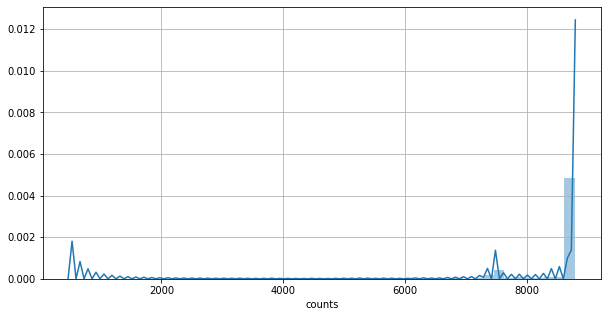

In [22]:
plt.figure(figsize=(10,5))
sns.distplot(n_samples_by_ts.counts)
plt.grid()
plt.show()

### number of building by site 

In [60]:
(train_data.loc[:, ["site_id","building_id"]]
 .groupby("site_id")
 .apply(lambda df: df.building_id.unique().size)
 .reset_index(name="n_buildings"))

site_id  n_buildings
0         0          105
1         1           51
2         2          135
3         3          274
4         4           91
5         5           89
6         6           44
7         7           15
8         8           70
9         9          124
10       10           30
11       11            5
12       12           36
13       13          154
14       14          102
15       15          124

***
### ts visualization

In [45]:
def plot_ts_by_site(site_id):
    train_data_cut = (train_data.query("site_id == @site_id")
                      .loc[:, ["timestamp","building_id","meter","meter_reading"]])
    for building_id in train_data_cut.building_id.unique():
        for meter in train_data_cut.meter.unique():
            print(f"building_id: {building_id} - meter: {meter}".center(90, "-"))
            ts = train_data_cut.query("building_id == @building_id & meter == @meter")
            plt.figure(figsize=(18,4))
            plt.plot_date(x=ts.timestamp.values, y=ts.meter_reading.values, fmt="r-")
            plt.grid()
            plt.show()

--------------------------------building_id: 0 - meter: 0---------------------------------


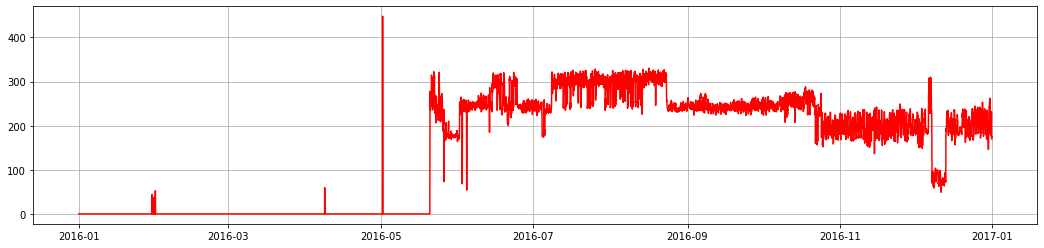

--------------------------------building_id: 0 - meter: 1---------------------------------


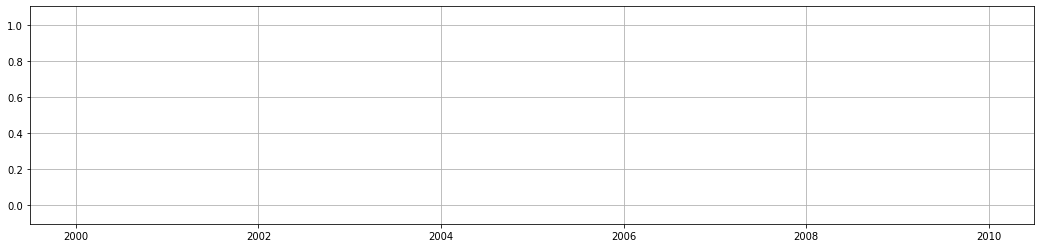

--------------------------------building_id: 1 - meter: 0---------------------------------


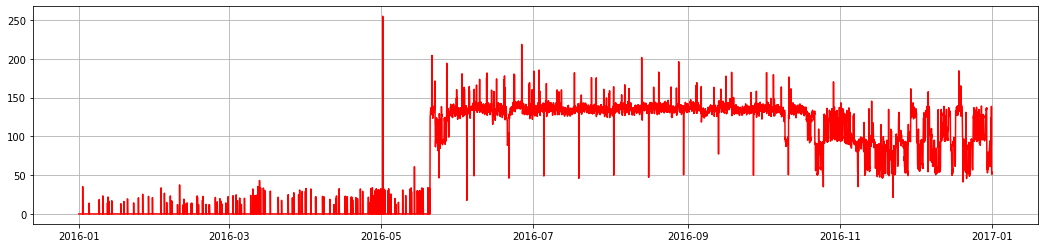

--------------------------------building_id: 1 - meter: 1---------------------------------


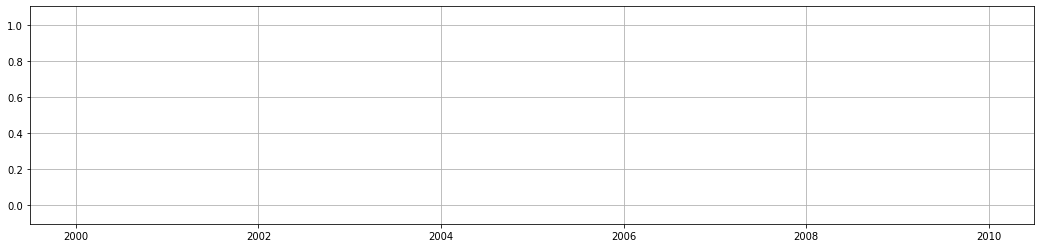

--------------------------------building_id: 2 - meter: 0---------------------------------


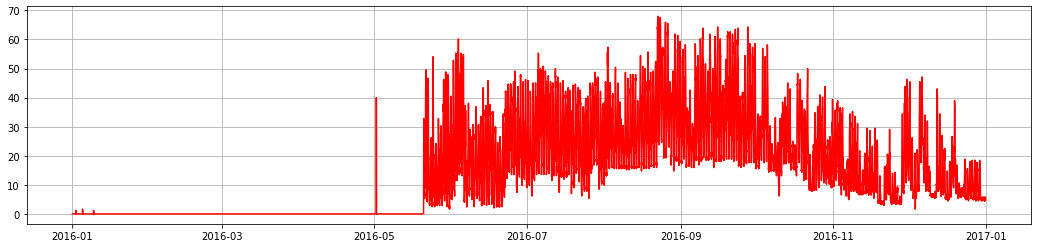

--------------------------------building_id: 2 - meter: 1---------------------------------


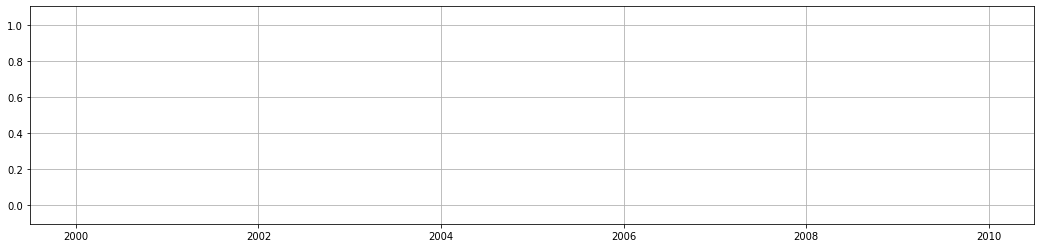

--------------------------------building_id: 3 - meter: 0---------------------------------


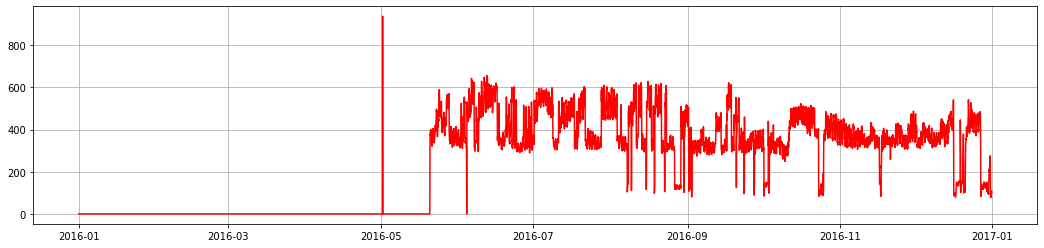

--------------------------------building_id: 3 - meter: 1---------------------------------


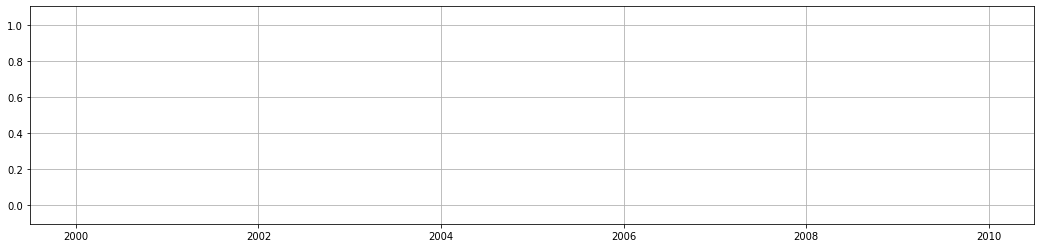

--------------------------------building_id: 4 - meter: 0---------------------------------


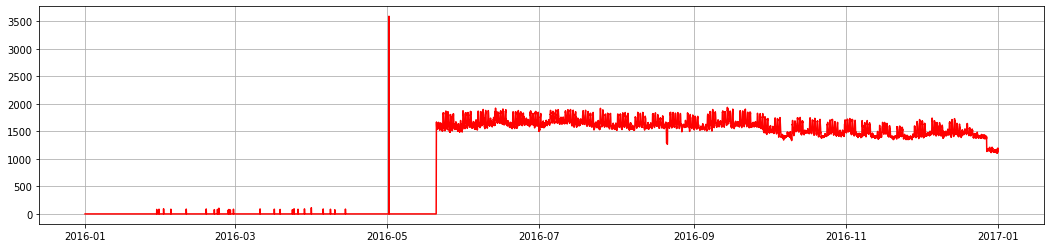

--------------------------------building_id: 4 - meter: 1---------------------------------


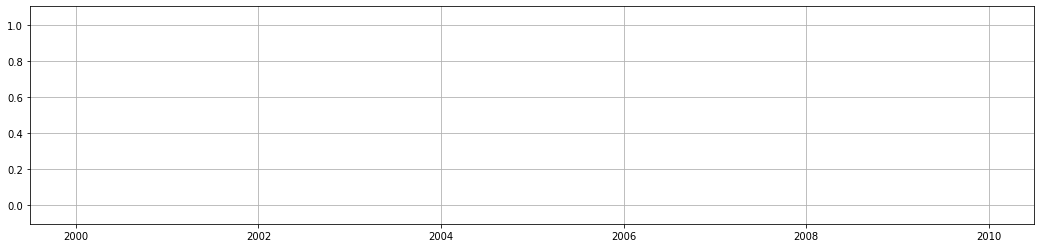

--------------------------------building_id: 5 - meter: 0---------------------------------


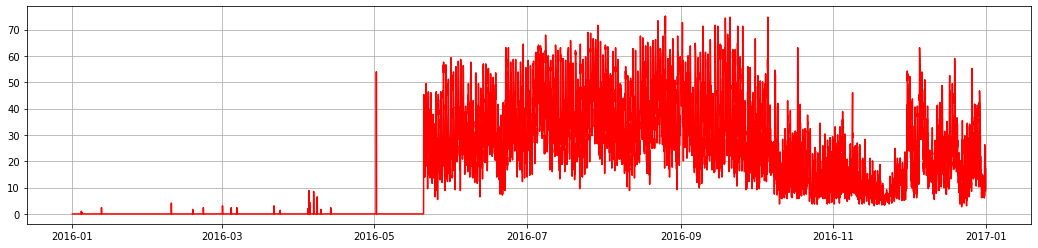

--------------------------------building_id: 5 - meter: 1---------------------------------


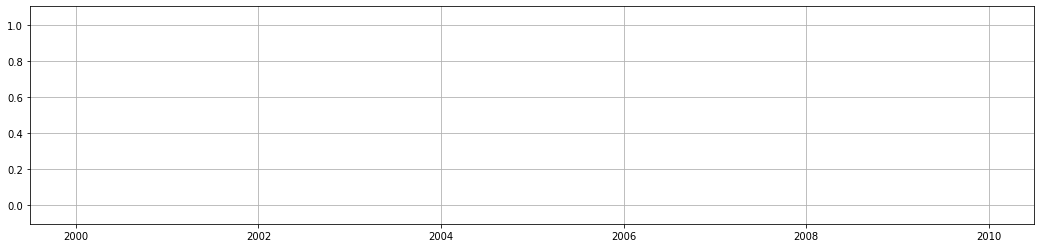

--------------------------------building_id: 6 - meter: 0---------------------------------


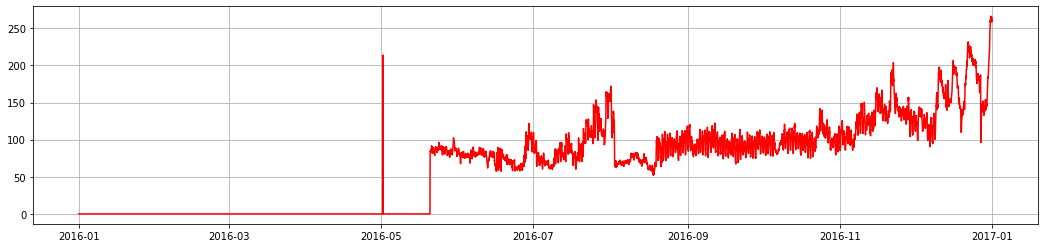

--------------------------------building_id: 6 - meter: 1---------------------------------


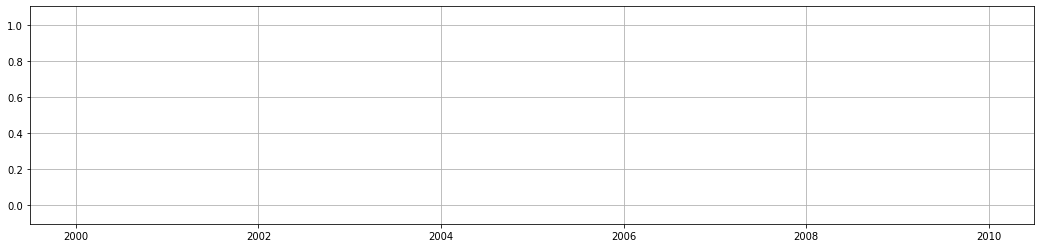

--------------------------------building_id: 7 - meter: 0---------------------------------


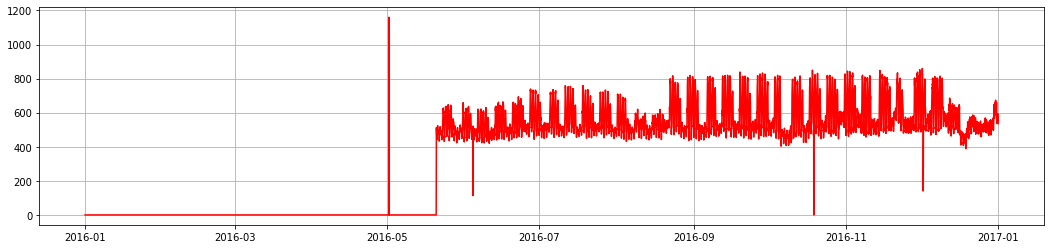

--------------------------------building_id: 7 - meter: 1---------------------------------


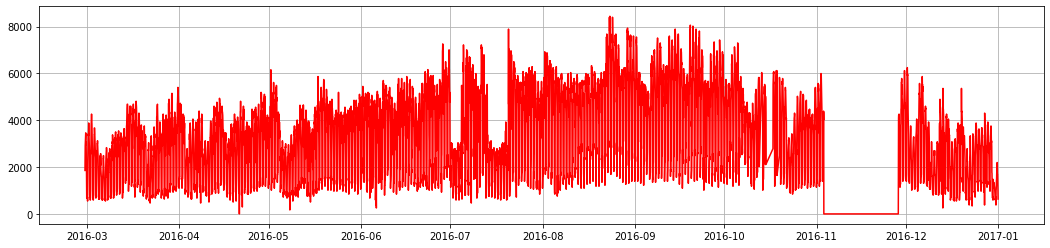

--------------------------------building_id: 8 - meter: 0---------------------------------


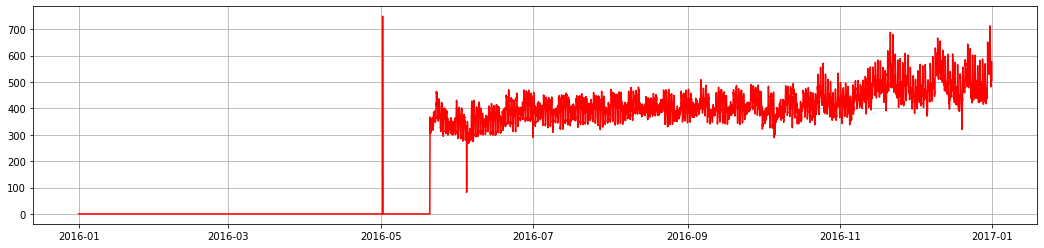

--------------------------------building_id: 8 - meter: 1---------------------------------


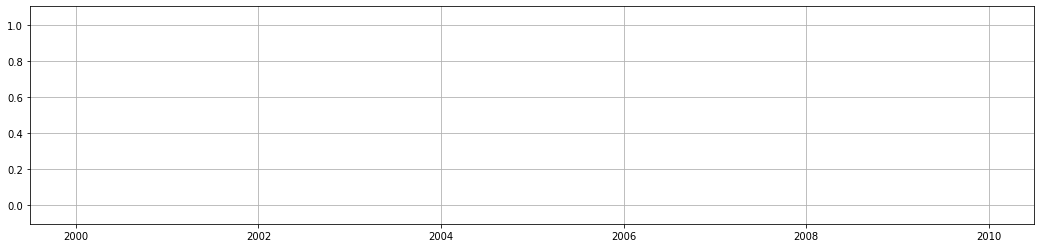

--------------------------------building_id: 9 - meter: 0---------------------------------


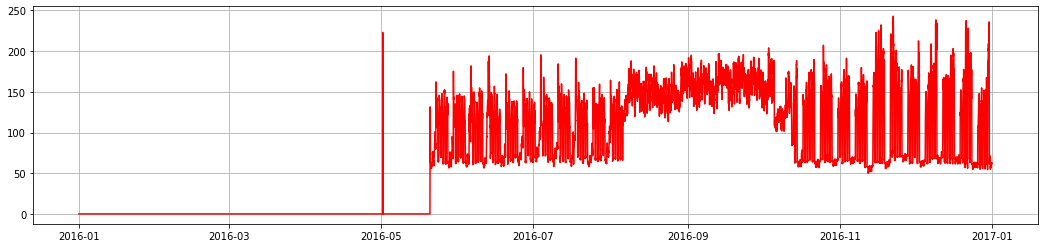

--------------------------------building_id: 9 - meter: 1---------------------------------


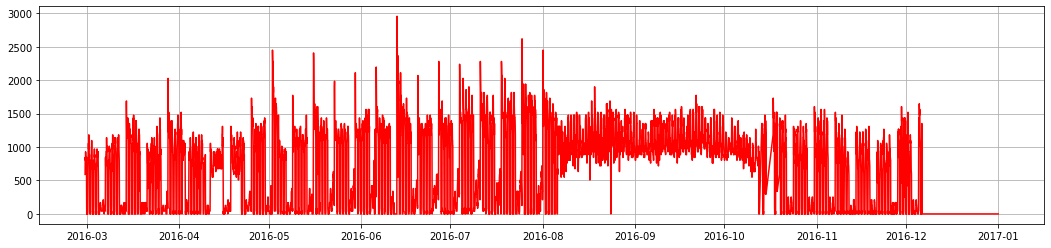

--------------------------------building_id: 10 - meter: 0--------------------------------


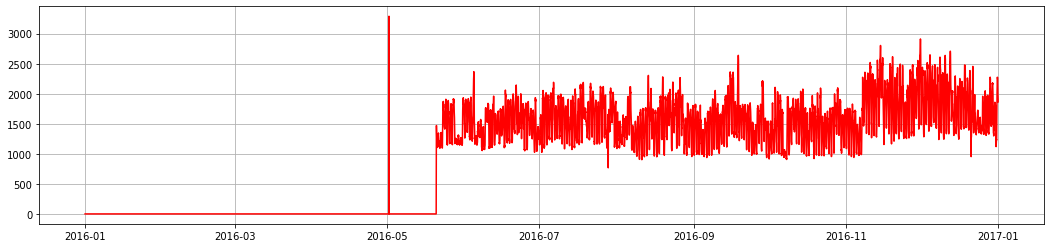

--------------------------------building_id: 10 - meter: 1--------------------------------


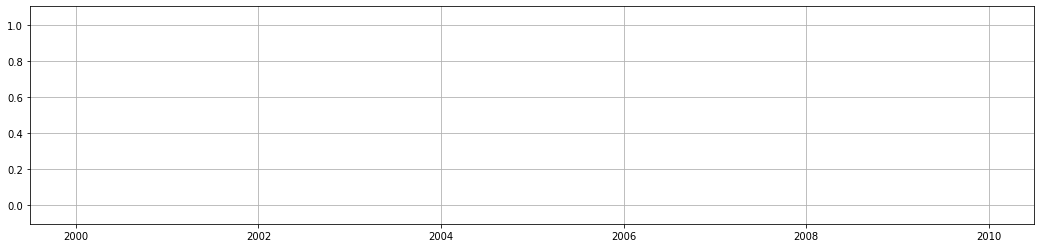

--------------------------------building_id: 11 - meter: 0--------------------------------


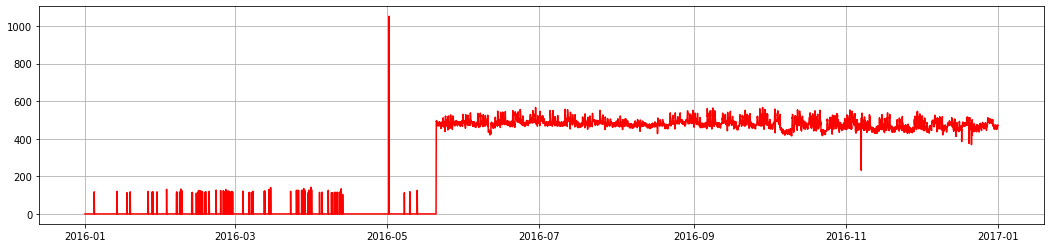

--------------------------------building_id: 11 - meter: 1--------------------------------


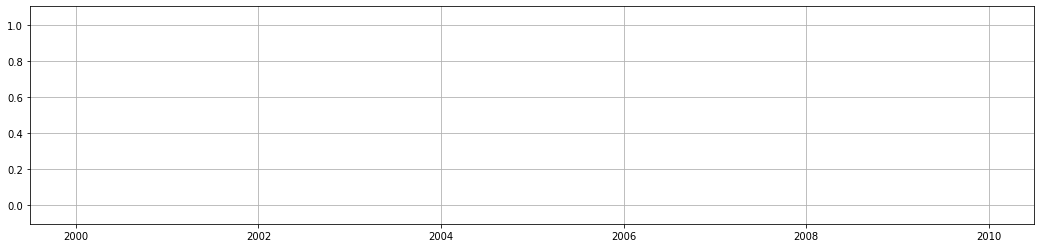

--------------------------------building_id: 12 - meter: 0--------------------------------


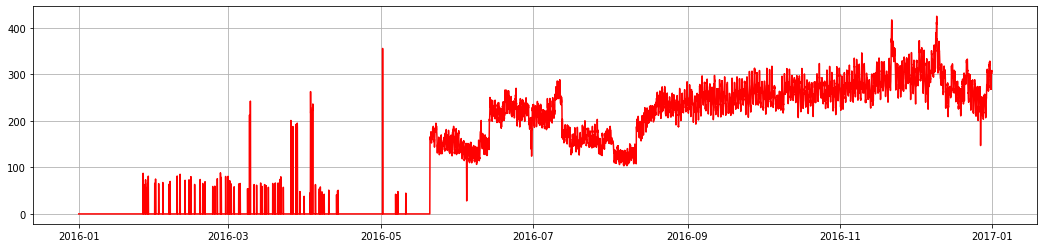

--------------------------------building_id: 12 - meter: 1--------------------------------


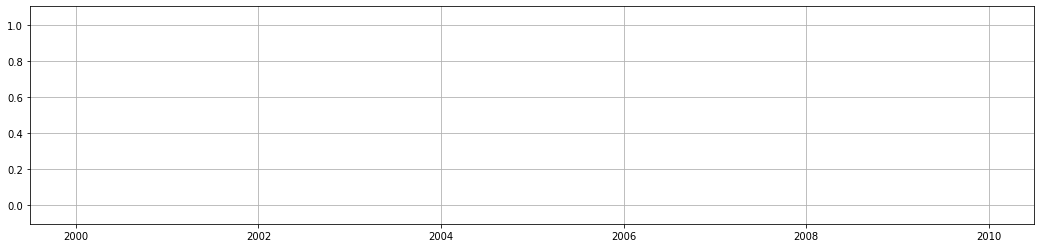

--------------------------------building_id: 13 - meter: 0--------------------------------


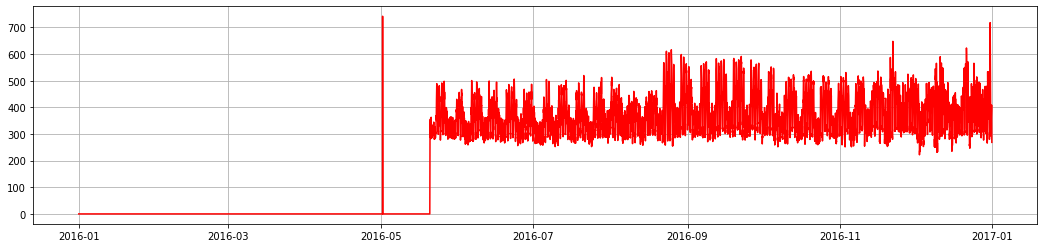

--------------------------------building_id: 13 - meter: 1--------------------------------


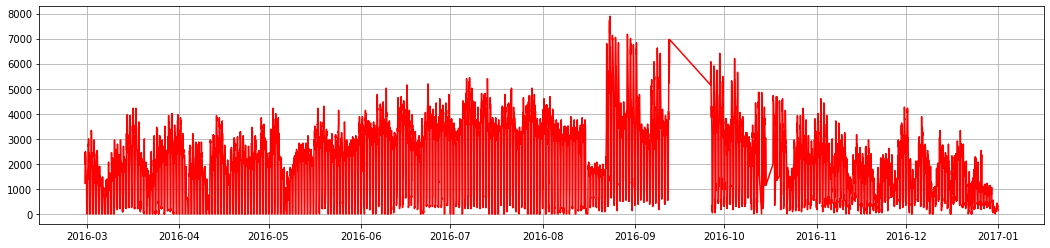

--------------------------------building_id: 14 - meter: 0--------------------------------


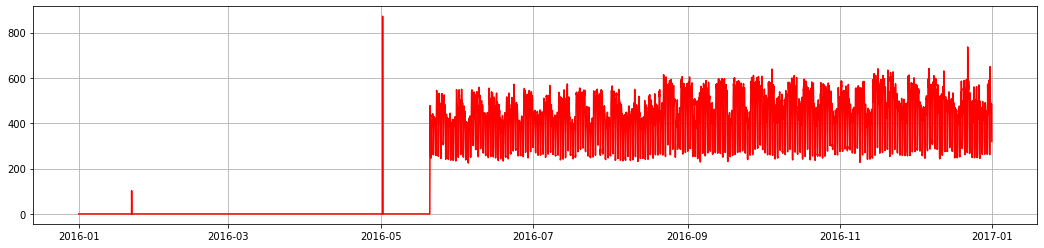

--------------------------------building_id: 14 - meter: 1--------------------------------


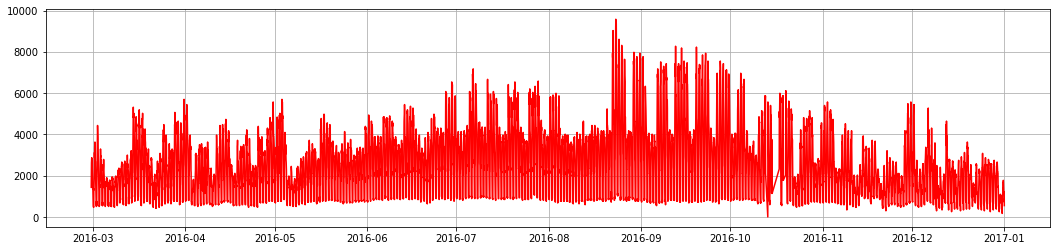

--------------------------------building_id: 15 - meter: 0--------------------------------


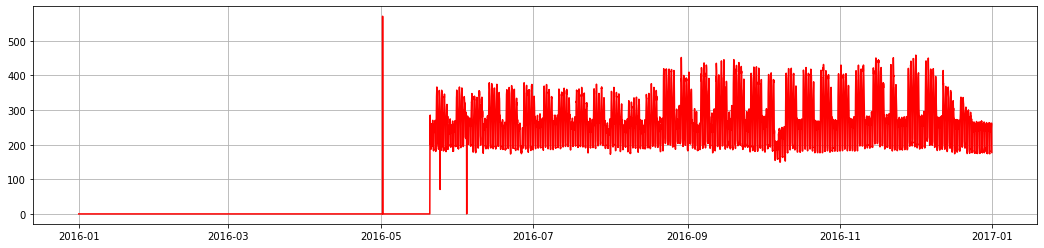

--------------------------------building_id: 15 - meter: 1--------------------------------


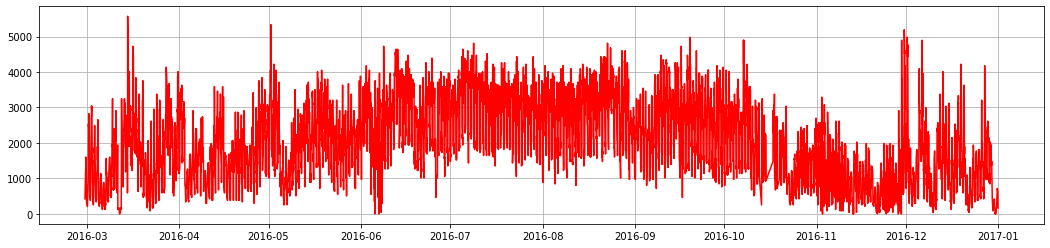

--------------------------------building_id: 16 - meter: 0--------------------------------


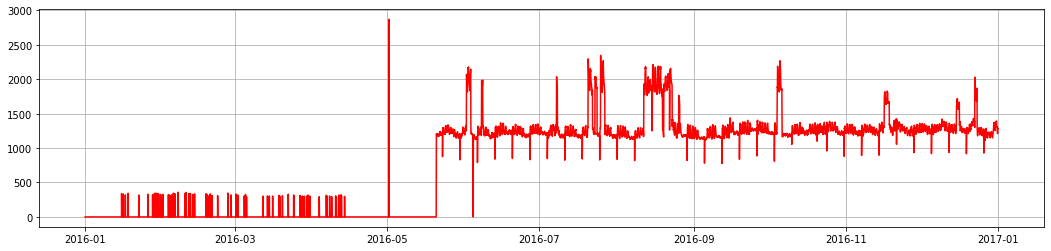

--------------------------------building_id: 16 - meter: 1--------------------------------


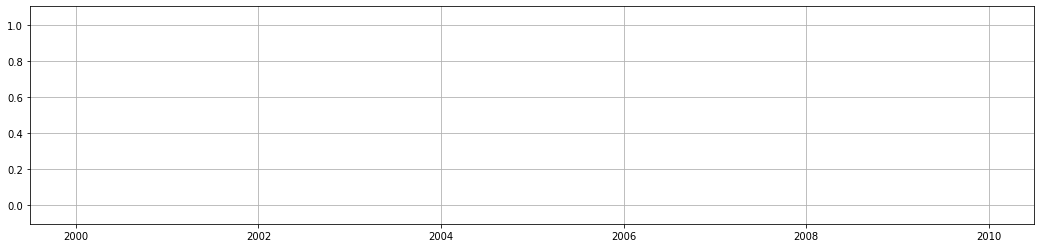

--------------------------------building_id: 17 - meter: 0--------------------------------


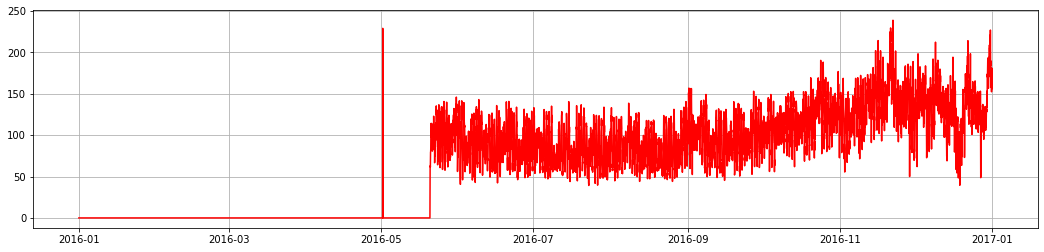

--------------------------------building_id: 17 - meter: 1--------------------------------


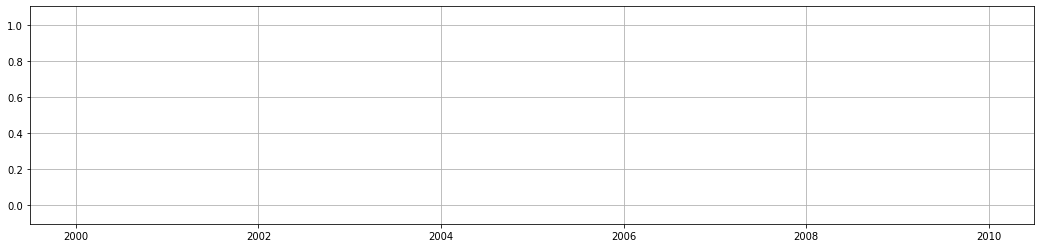

--------------------------------building_id: 18 - meter: 0--------------------------------


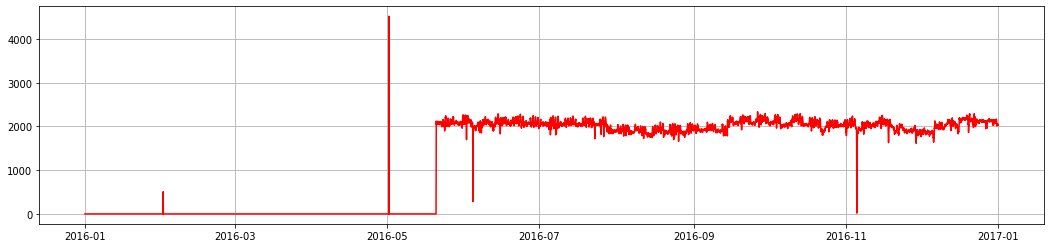

--------------------------------building_id: 18 - meter: 1--------------------------------


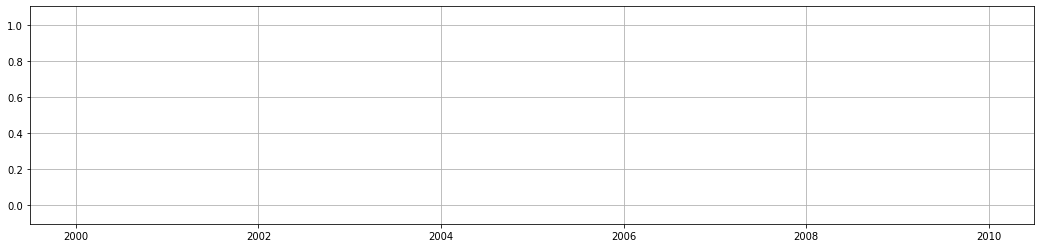

--------------------------------building_id: 19 - meter: 0--------------------------------


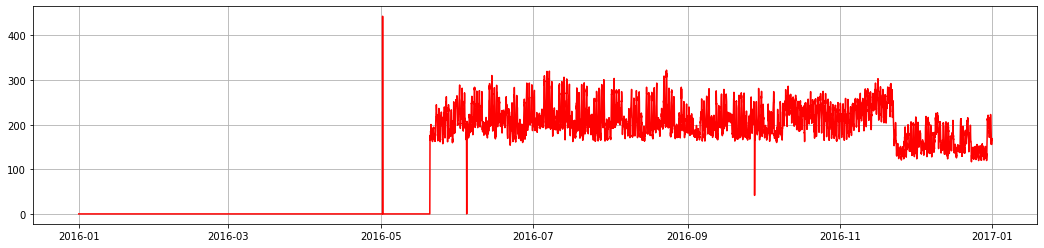

--------------------------------building_id: 19 - meter: 1--------------------------------


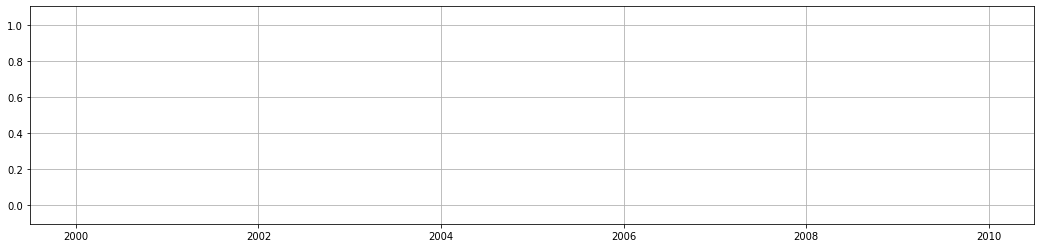

--------------------------------building_id: 20 - meter: 0--------------------------------


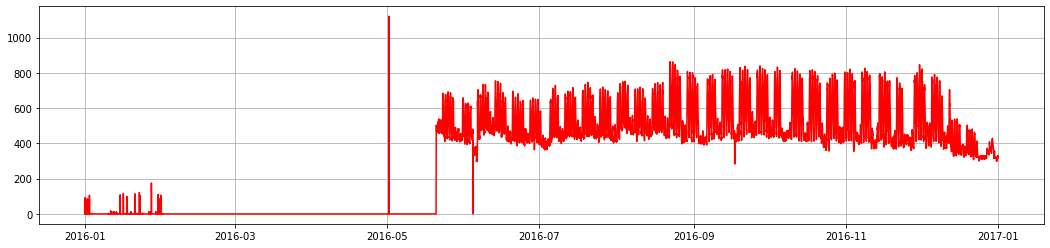

--------------------------------building_id: 20 - meter: 1--------------------------------


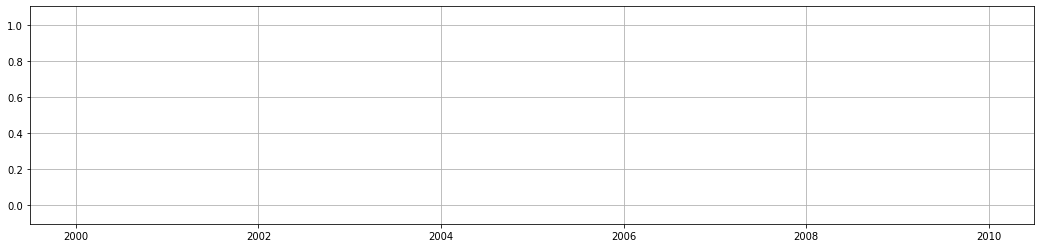

--------------------------------building_id: 21 - meter: 0--------------------------------


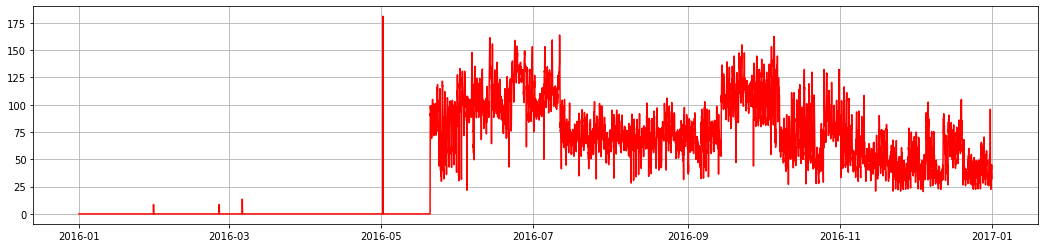

--------------------------------building_id: 21 - meter: 1--------------------------------


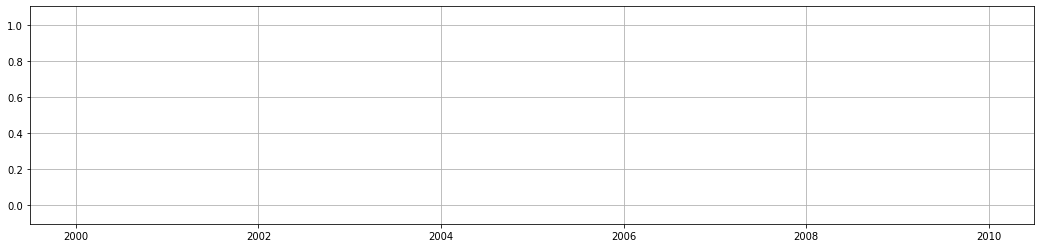

--------------------------------building_id: 22 - meter: 0--------------------------------


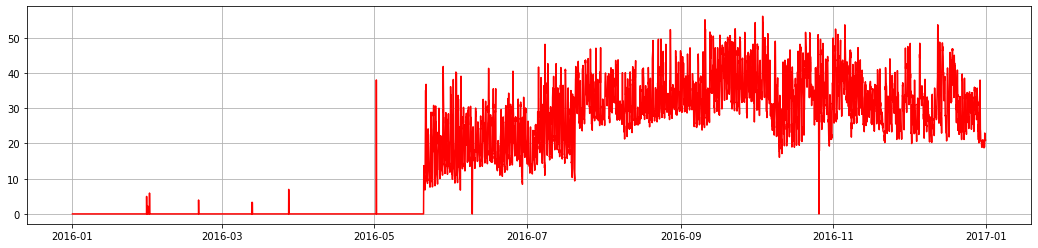

--------------------------------building_id: 22 - meter: 1--------------------------------


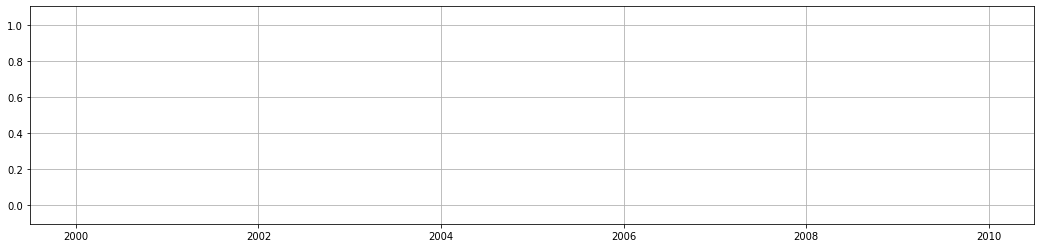

--------------------------------building_id: 23 - meter: 0--------------------------------


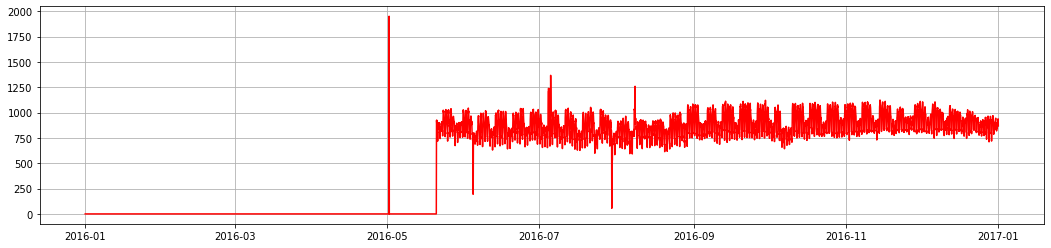

--------------------------------building_id: 23 - meter: 1--------------------------------


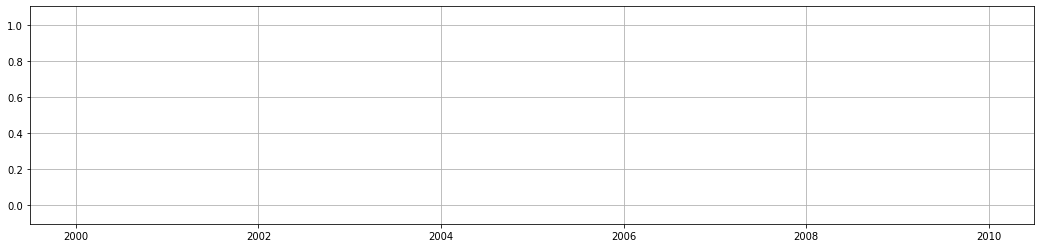

--------------------------------building_id: 24 - meter: 0--------------------------------


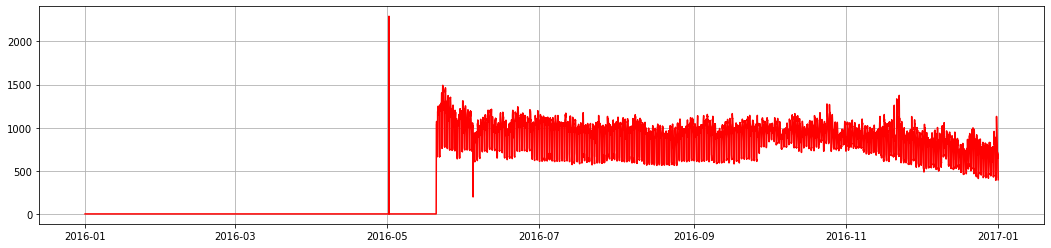

--------------------------------building_id: 24 - meter: 1--------------------------------


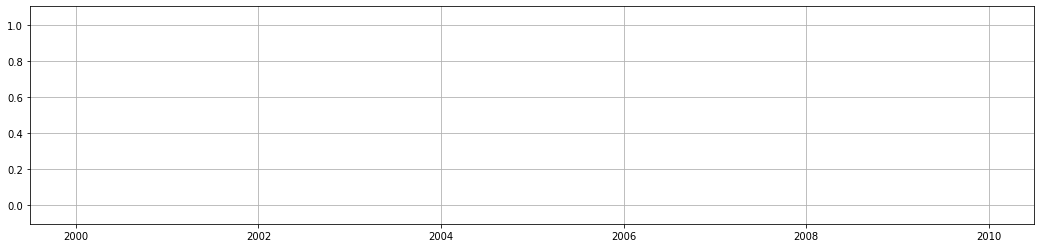

--------------------------------building_id: 25 - meter: 0--------------------------------


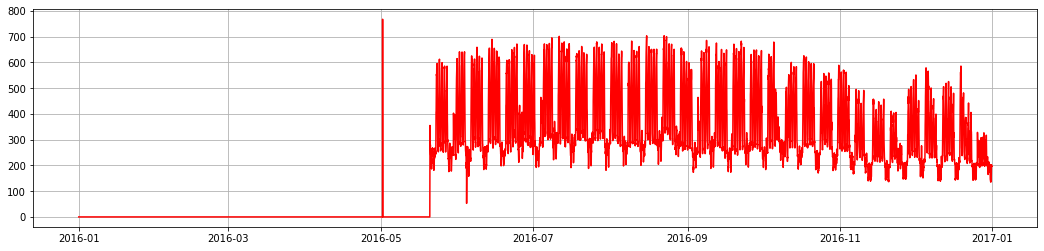

--------------------------------building_id: 25 - meter: 1--------------------------------


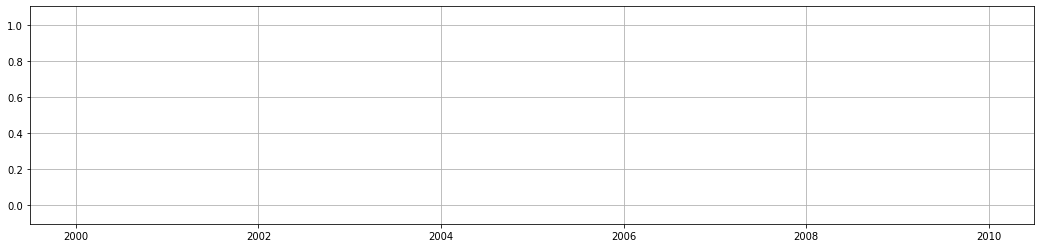

--------------------------------building_id: 26 - meter: 0--------------------------------


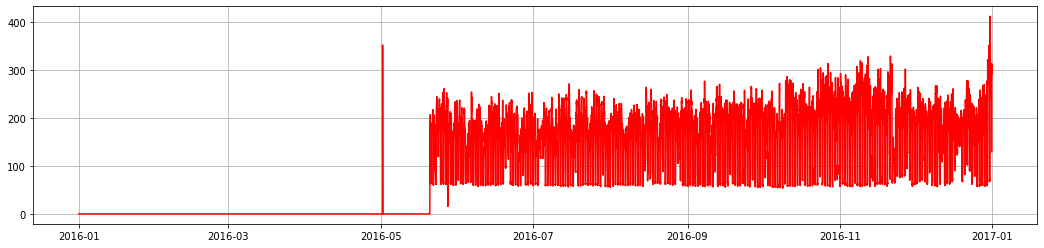

--------------------------------building_id: 26 - meter: 1--------------------------------


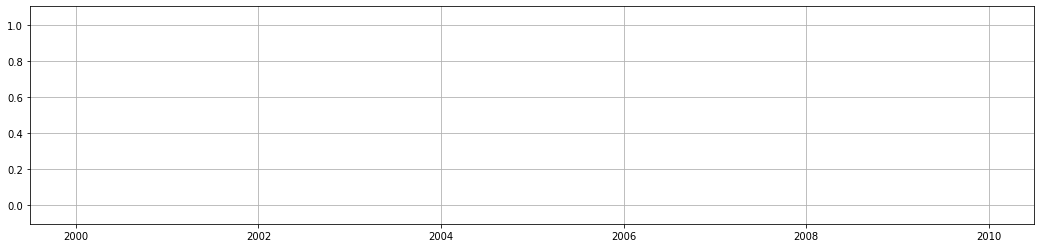

--------------------------------building_id: 27 - meter: 0--------------------------------


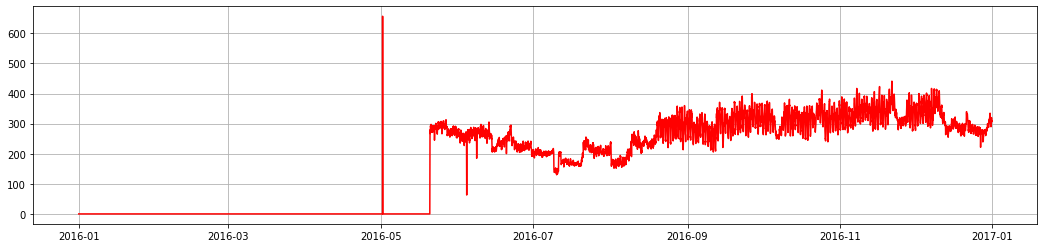

--------------------------------building_id: 27 - meter: 1--------------------------------


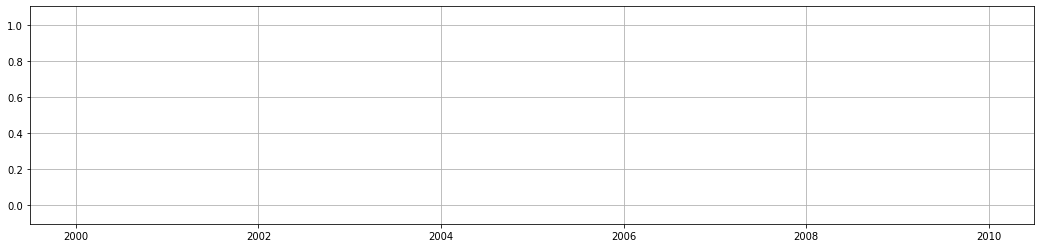

--------------------------------building_id: 28 - meter: 0--------------------------------


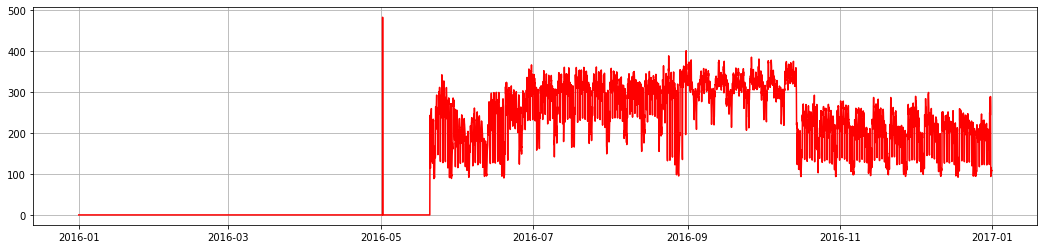

--------------------------------building_id: 28 - meter: 1--------------------------------


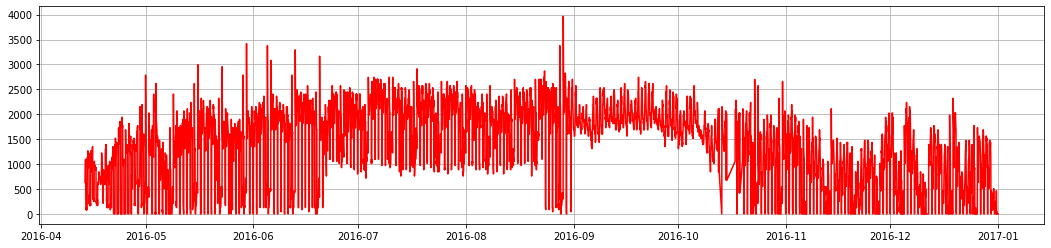

--------------------------------building_id: 30 - meter: 0--------------------------------


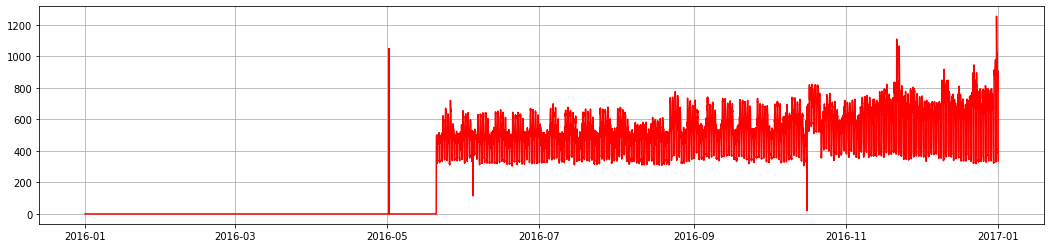

--------------------------------building_id: 30 - meter: 1--------------------------------


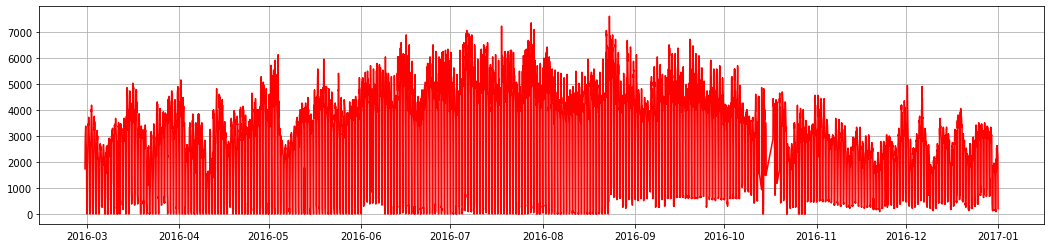

--------------------------------building_id: 31 - meter: 0--------------------------------


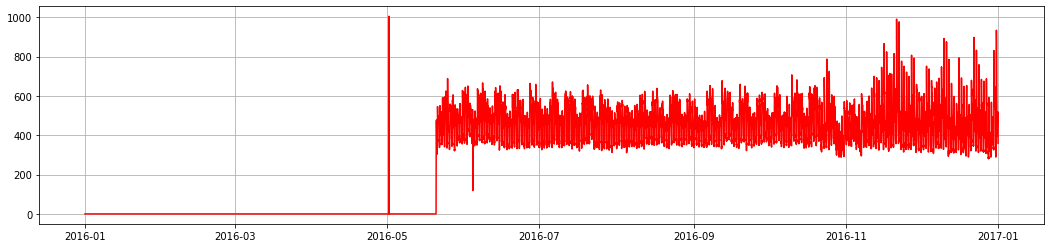

--------------------------------building_id: 31 - meter: 1--------------------------------


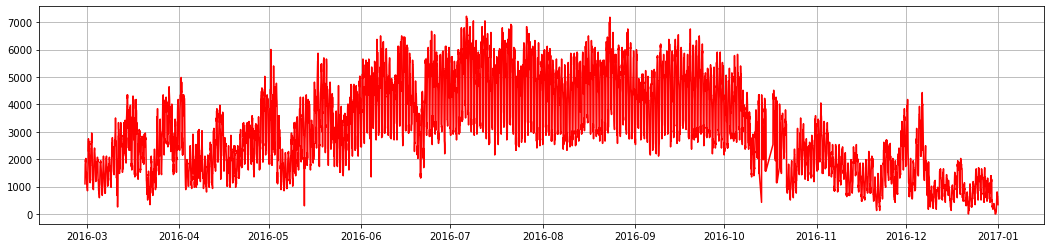

--------------------------------building_id: 32 - meter: 0--------------------------------


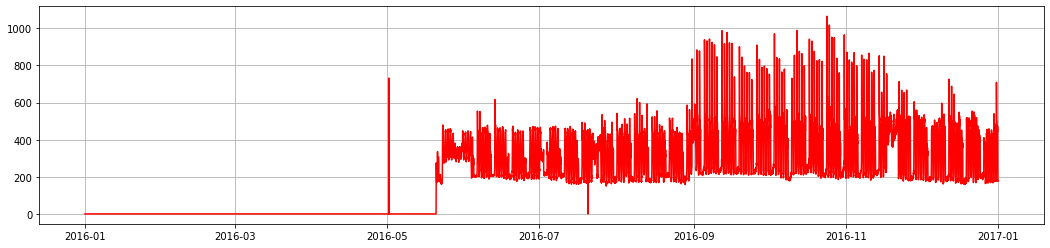

--------------------------------building_id: 32 - meter: 1--------------------------------


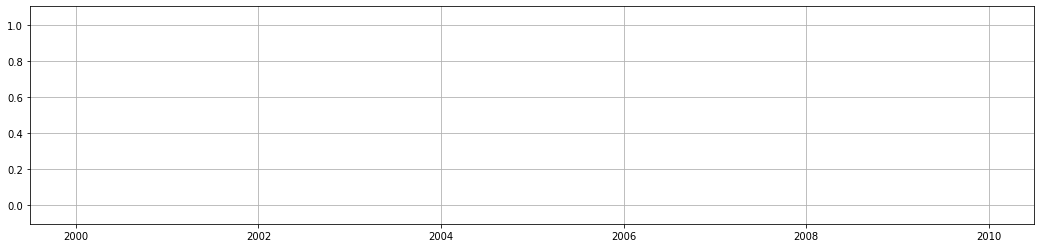

--------------------------------building_id: 33 - meter: 0--------------------------------


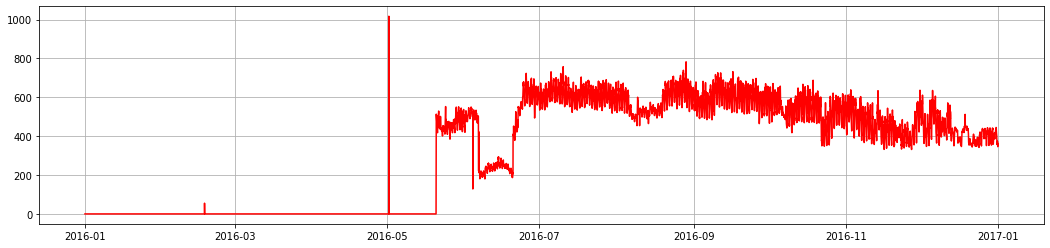

--------------------------------building_id: 33 - meter: 1--------------------------------


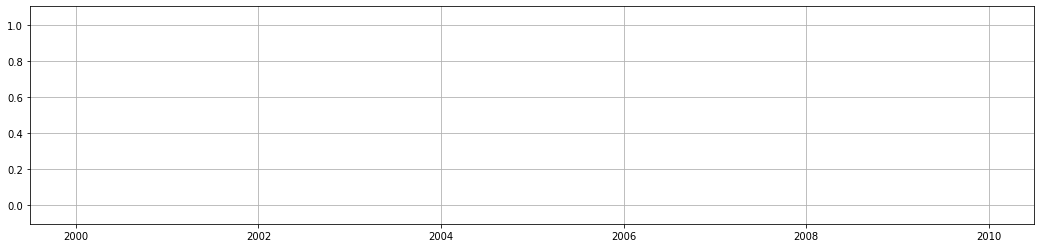

--------------------------------building_id: 34 - meter: 0--------------------------------


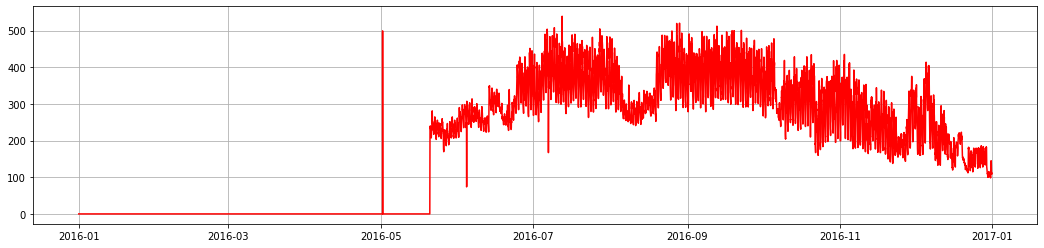

--------------------------------building_id: 34 - meter: 1--------------------------------


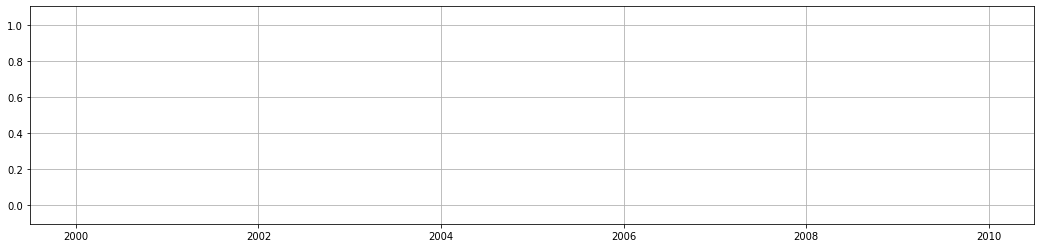

--------------------------------building_id: 35 - meter: 0--------------------------------


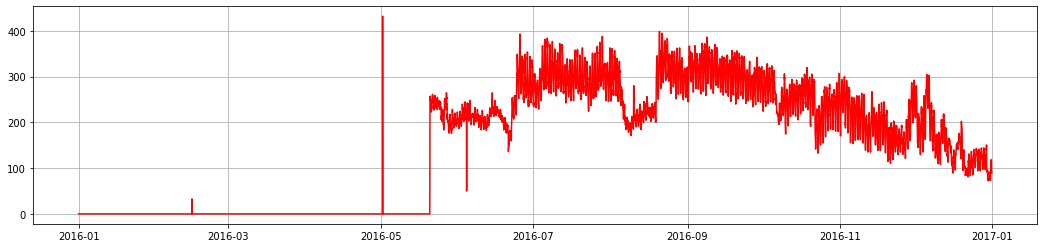

--------------------------------building_id: 35 - meter: 1--------------------------------


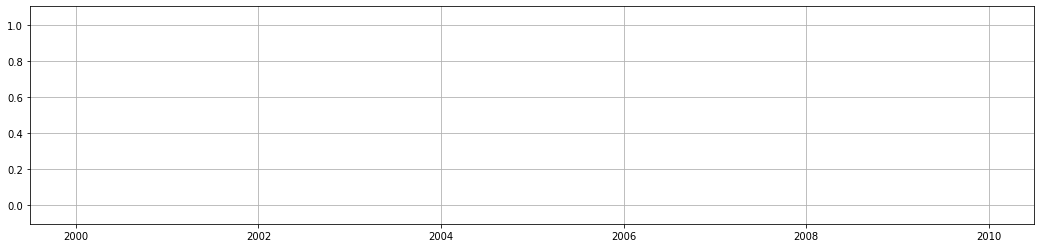

--------------------------------building_id: 36 - meter: 0--------------------------------


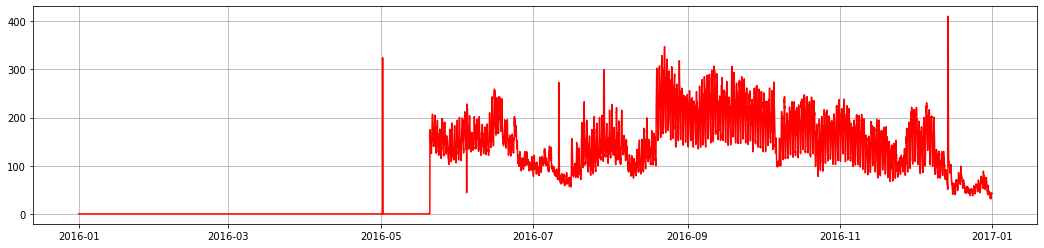

--------------------------------building_id: 36 - meter: 1--------------------------------


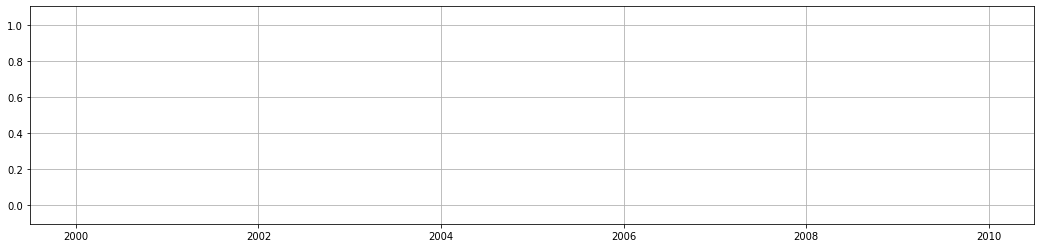

--------------------------------building_id: 37 - meter: 0--------------------------------


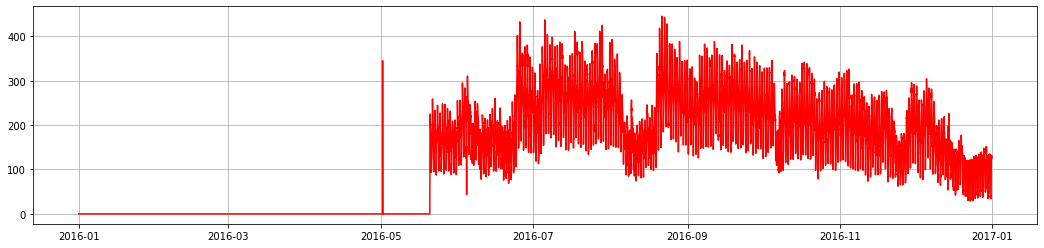

--------------------------------building_id: 37 - meter: 1--------------------------------


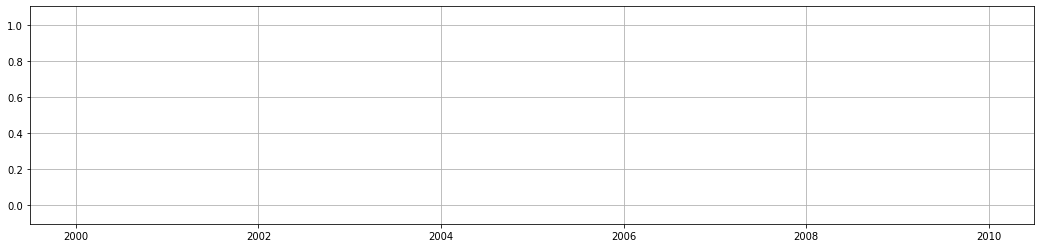

--------------------------------building_id: 38 - meter: 0--------------------------------


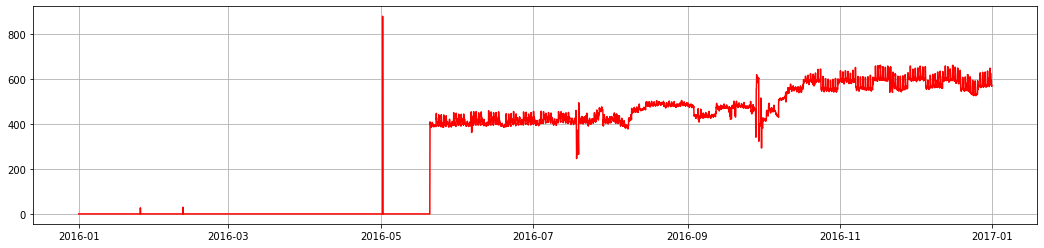

--------------------------------building_id: 38 - meter: 1--------------------------------


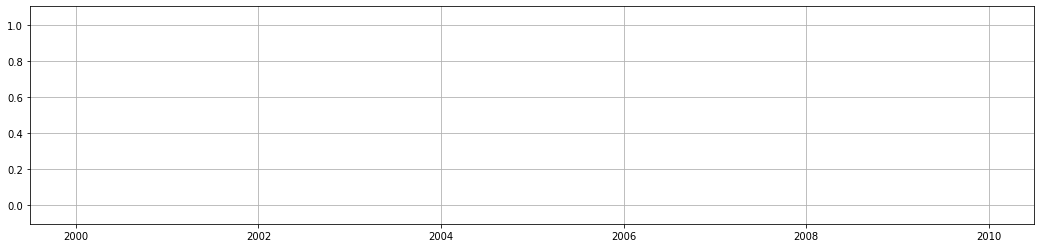

--------------------------------building_id: 39 - meter: 0--------------------------------


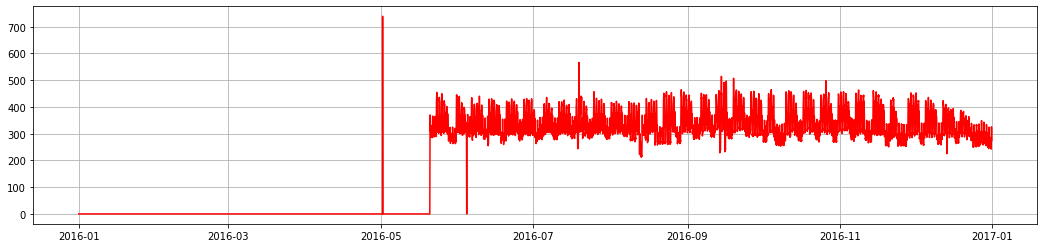

--------------------------------building_id: 39 - meter: 1--------------------------------


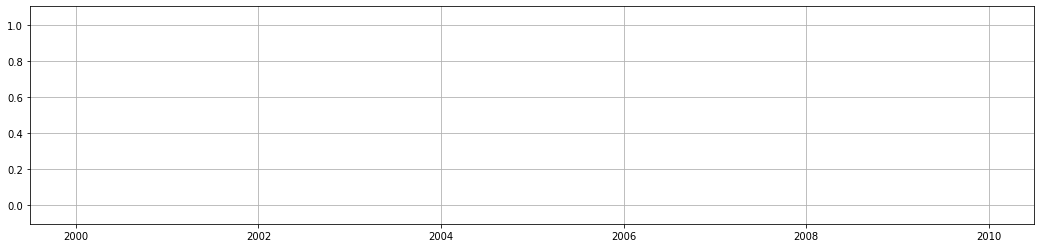

--------------------------------building_id: 40 - meter: 0--------------------------------


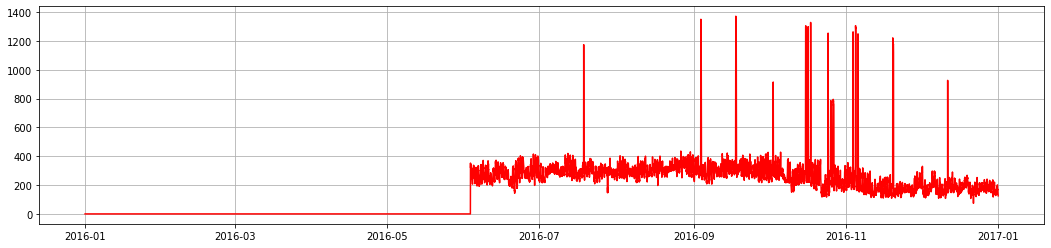

--------------------------------building_id: 40 - meter: 1--------------------------------


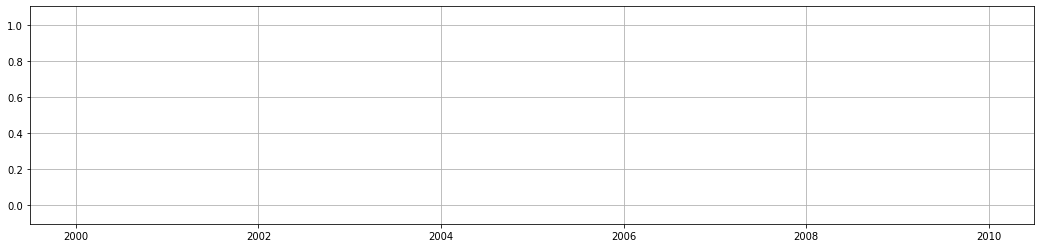

--------------------------------building_id: 41 - meter: 0--------------------------------


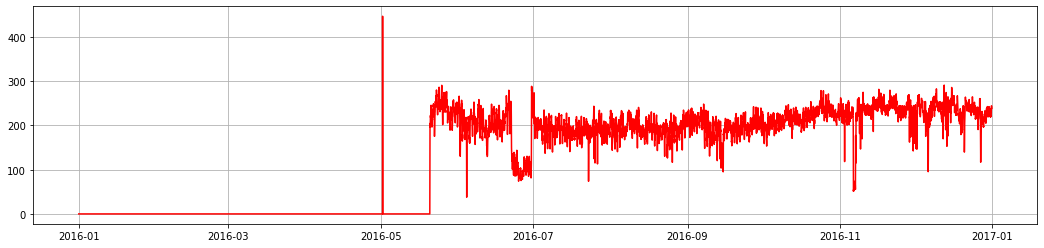

--------------------------------building_id: 41 - meter: 1--------------------------------


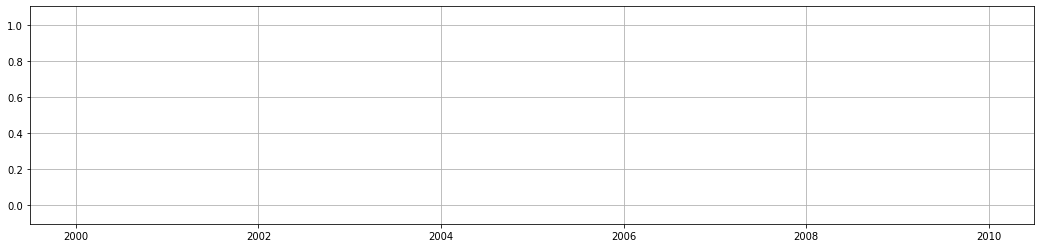

--------------------------------building_id: 42 - meter: 0--------------------------------


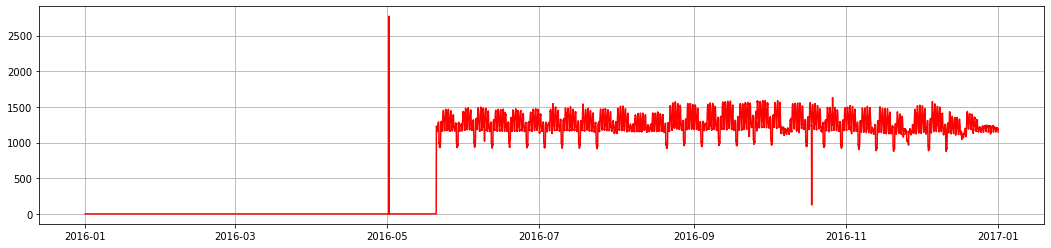

--------------------------------building_id: 42 - meter: 1--------------------------------


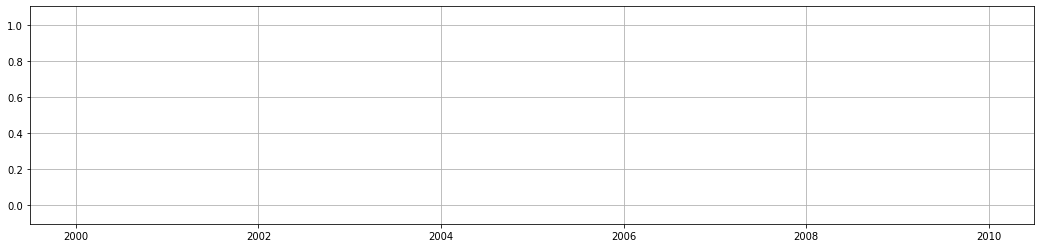

--------------------------------building_id: 43 - meter: 0--------------------------------


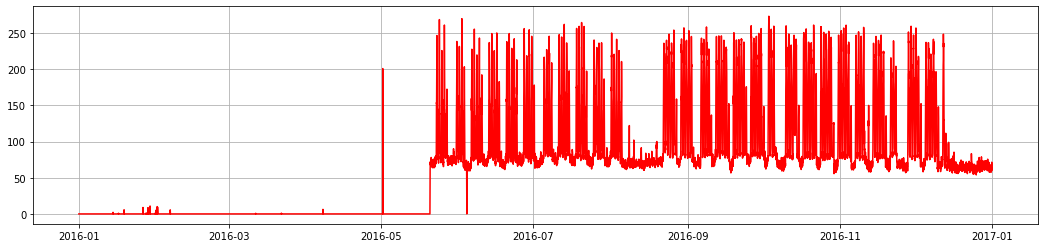

--------------------------------building_id: 43 - meter: 1--------------------------------


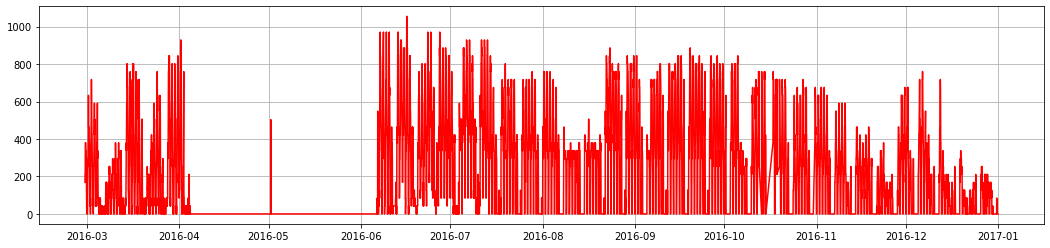

--------------------------------building_id: 44 - meter: 0--------------------------------


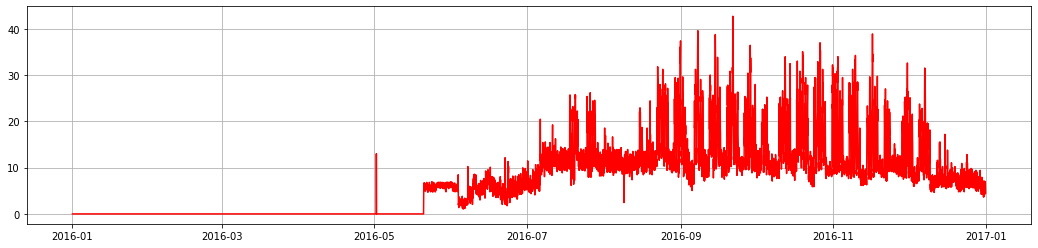

--------------------------------building_id: 44 - meter: 1--------------------------------


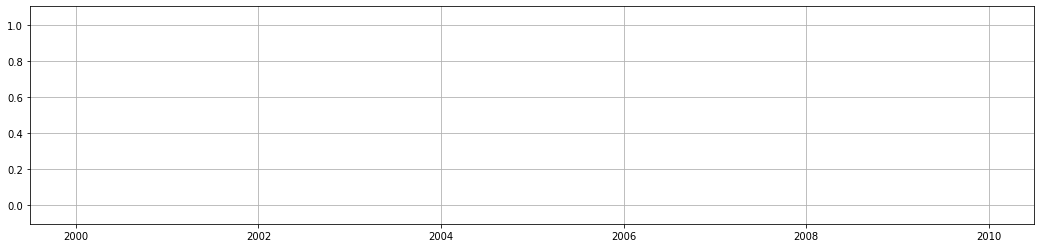

--------------------------------building_id: 45 - meter: 0--------------------------------


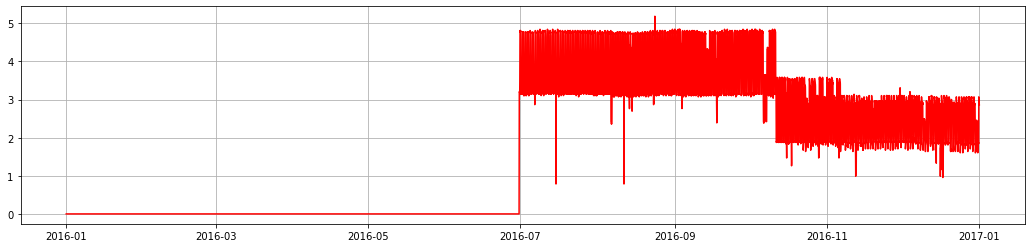

--------------------------------building_id: 45 - meter: 1--------------------------------


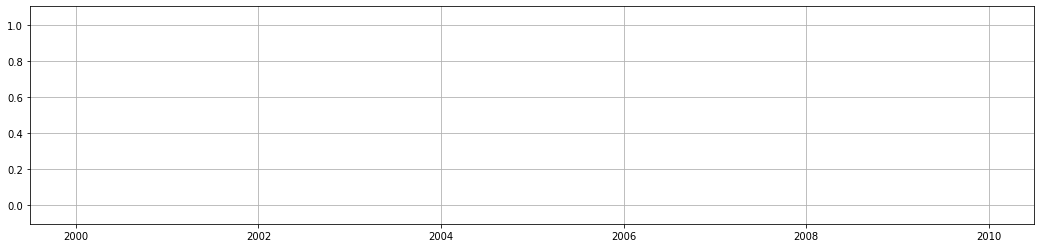

--------------------------------building_id: 46 - meter: 0--------------------------------


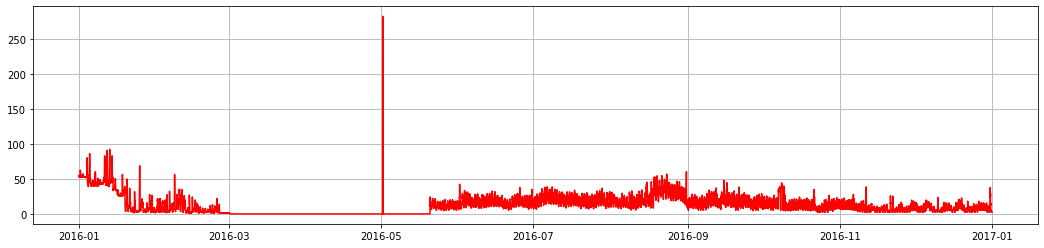

--------------------------------building_id: 46 - meter: 1--------------------------------


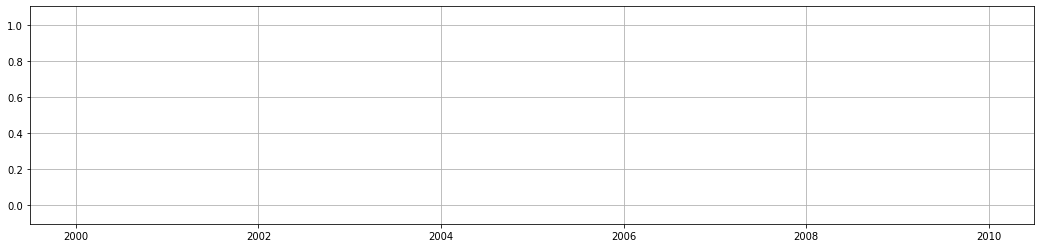

--------------------------------building_id: 47 - meter: 0--------------------------------


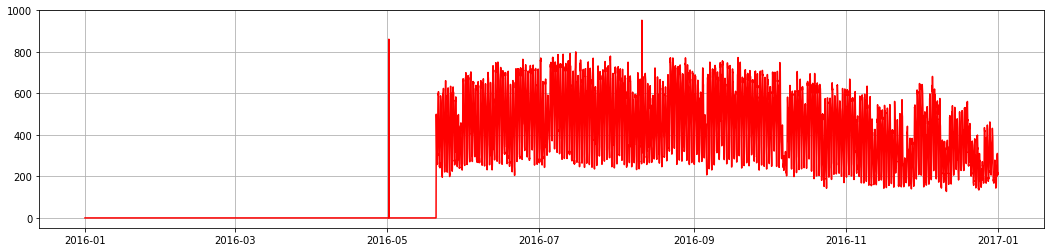

--------------------------------building_id: 47 - meter: 1--------------------------------


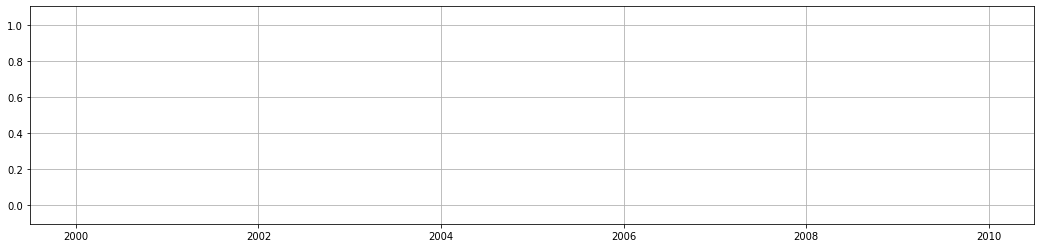

--------------------------------building_id: 49 - meter: 0--------------------------------


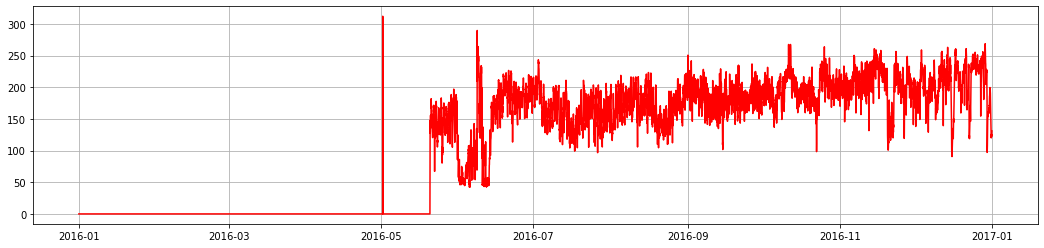

--------------------------------building_id: 49 - meter: 1--------------------------------


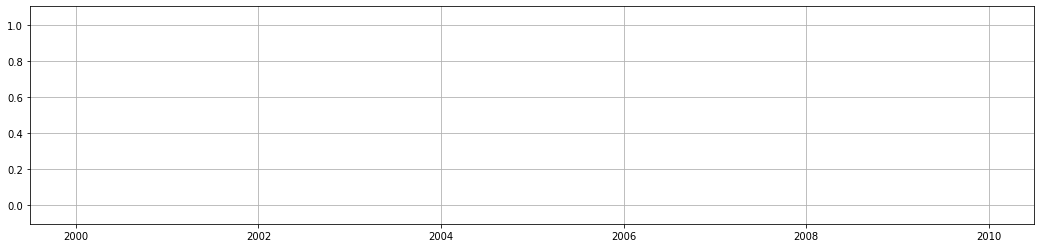

--------------------------------building_id: 50 - meter: 0--------------------------------


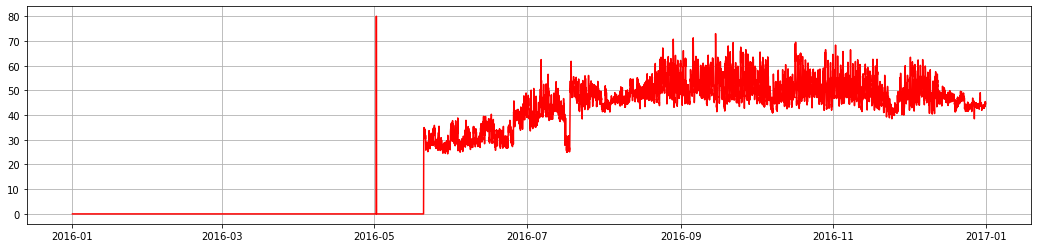

--------------------------------building_id: 50 - meter: 1--------------------------------


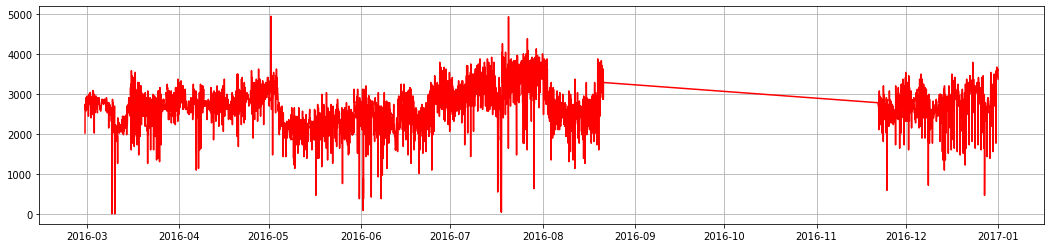

--------------------------------building_id: 51 - meter: 0--------------------------------


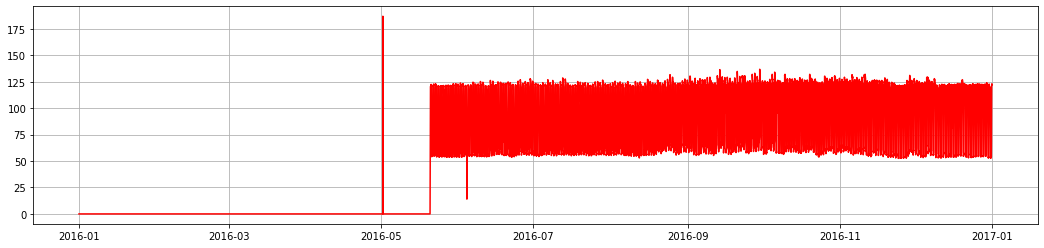

--------------------------------building_id: 51 - meter: 1--------------------------------


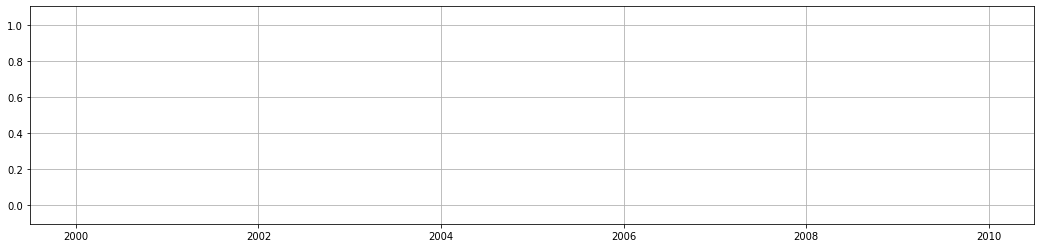

--------------------------------building_id: 52 - meter: 0--------------------------------


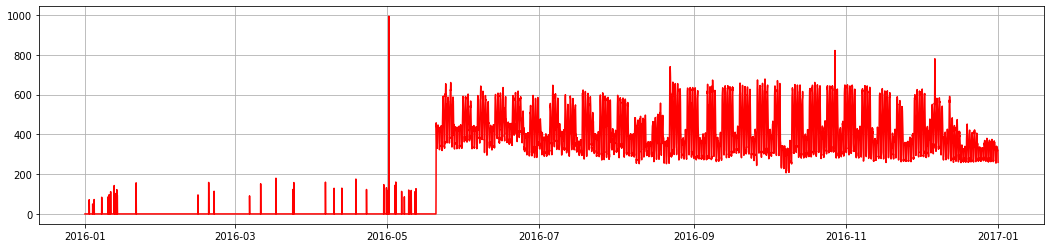

--------------------------------building_id: 52 - meter: 1--------------------------------


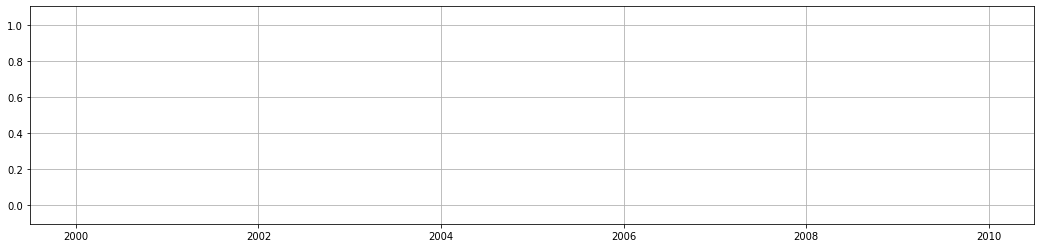

--------------------------------building_id: 53 - meter: 0--------------------------------


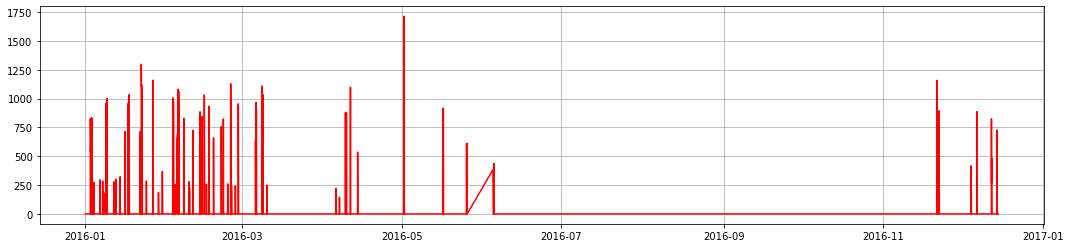

--------------------------------building_id: 53 - meter: 1--------------------------------


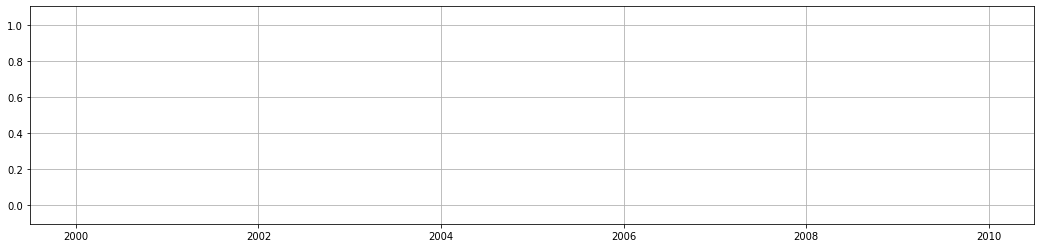

--------------------------------building_id: 54 - meter: 0--------------------------------


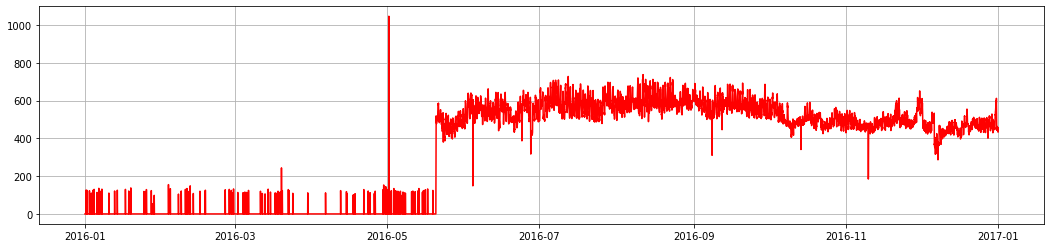

--------------------------------building_id: 54 - meter: 1--------------------------------


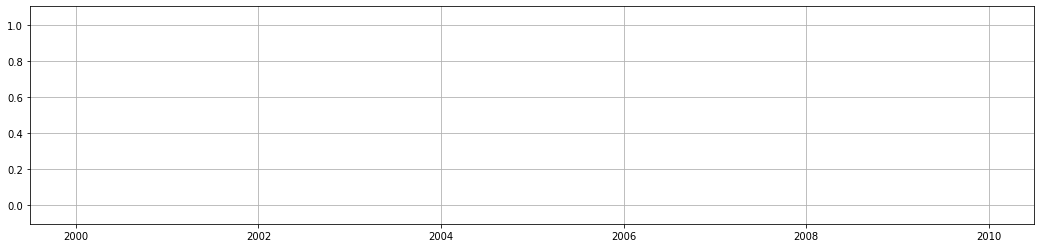

--------------------------------building_id: 55 - meter: 0--------------------------------


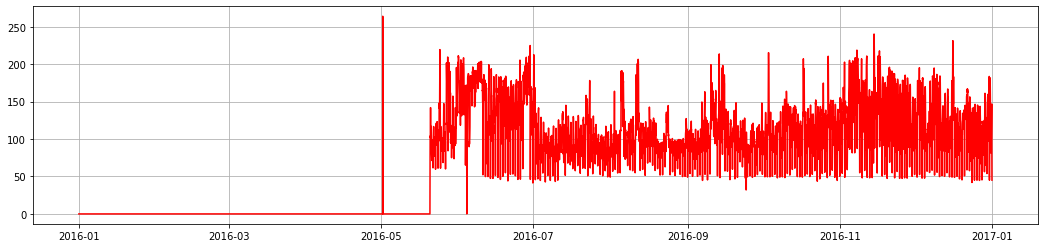

--------------------------------building_id: 55 - meter: 1--------------------------------


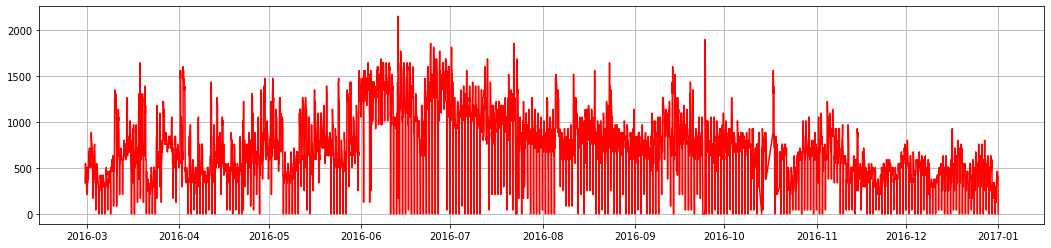

--------------------------------building_id: 56 - meter: 0--------------------------------


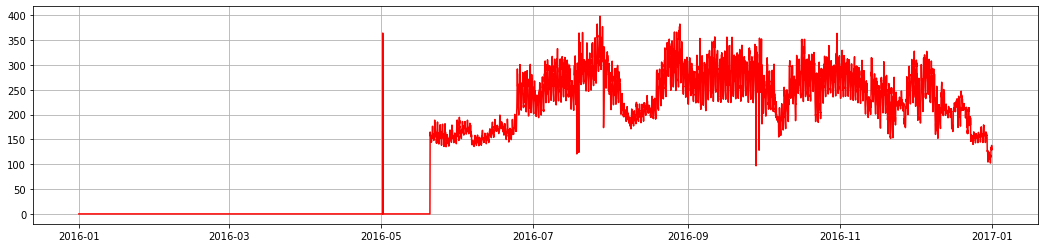

--------------------------------building_id: 56 - meter: 1--------------------------------


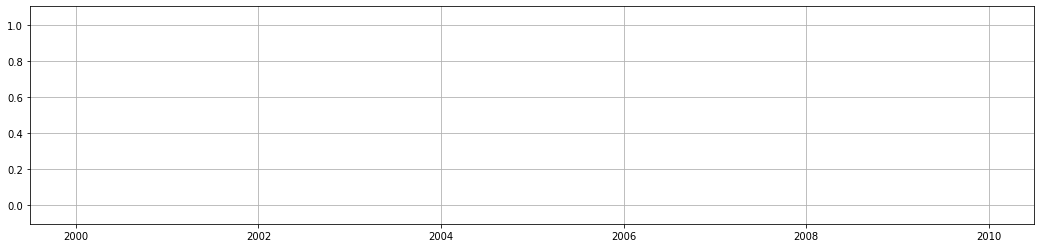

--------------------------------building_id: 57 - meter: 0--------------------------------


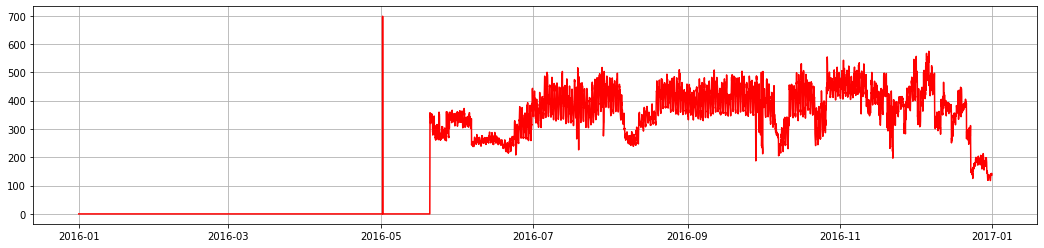

--------------------------------building_id: 57 - meter: 1--------------------------------


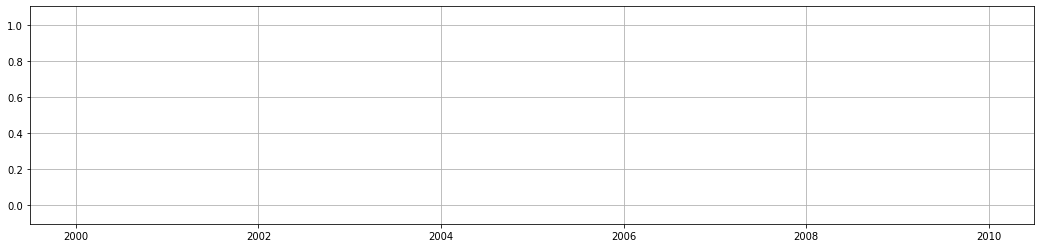

--------------------------------building_id: 58 - meter: 0--------------------------------


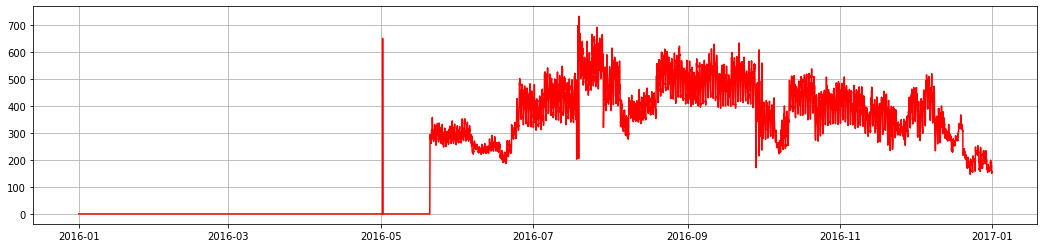

--------------------------------building_id: 58 - meter: 1--------------------------------


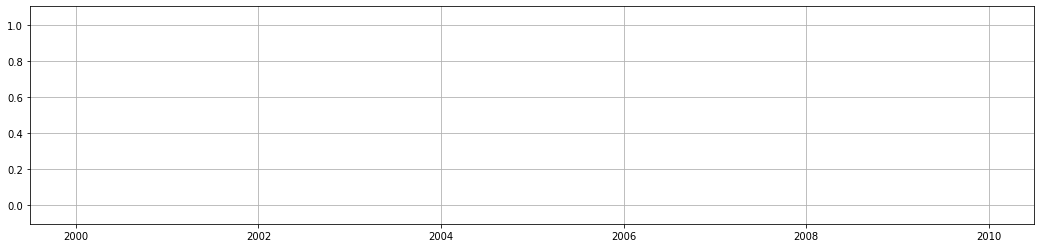

--------------------------------building_id: 59 - meter: 0--------------------------------


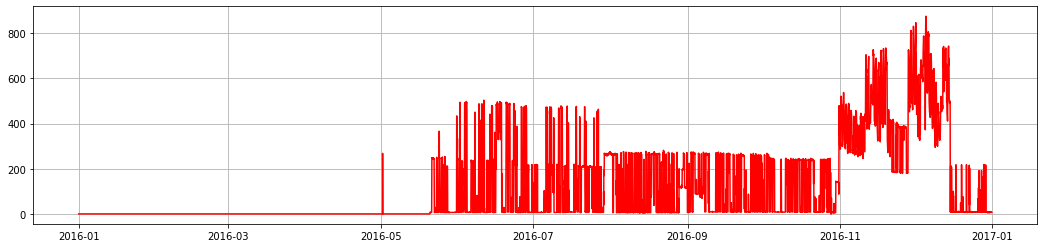

--------------------------------building_id: 59 - meter: 1--------------------------------


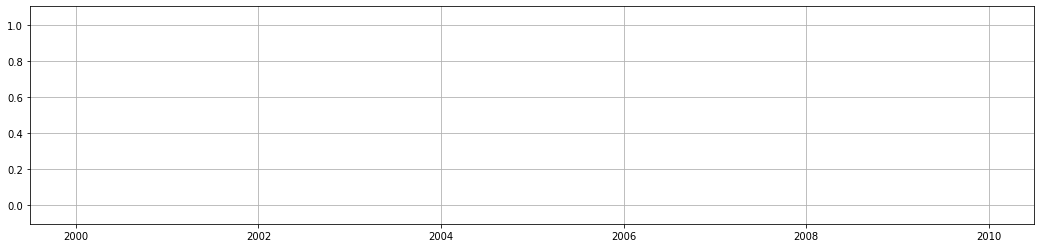

--------------------------------building_id: 60 - meter: 0--------------------------------


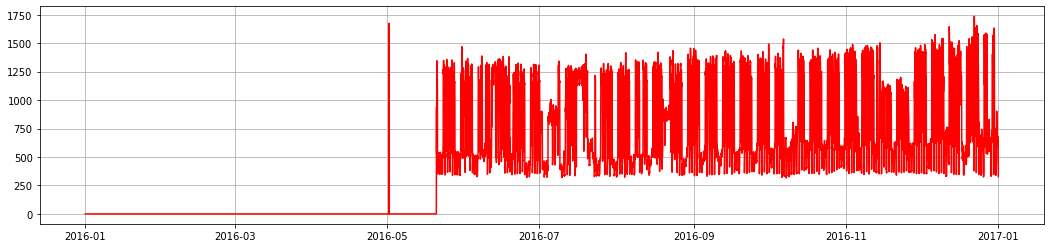

--------------------------------building_id: 60 - meter: 1--------------------------------


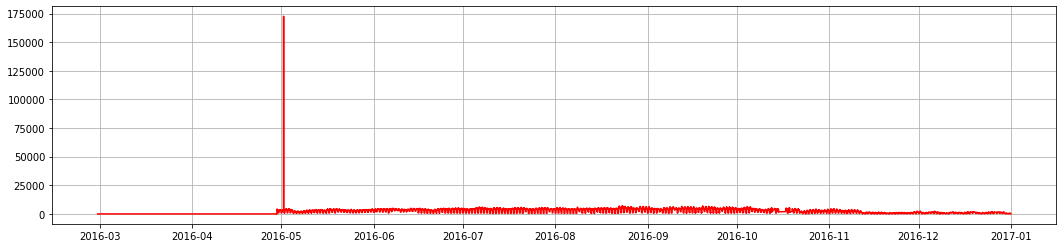

--------------------------------building_id: 61 - meter: 0--------------------------------


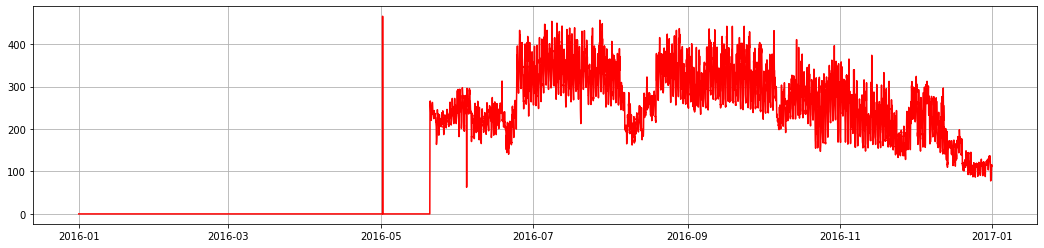

--------------------------------building_id: 61 - meter: 1--------------------------------


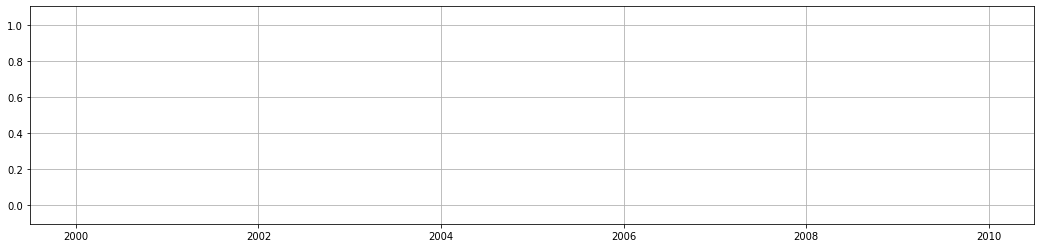

--------------------------------building_id: 62 - meter: 0--------------------------------


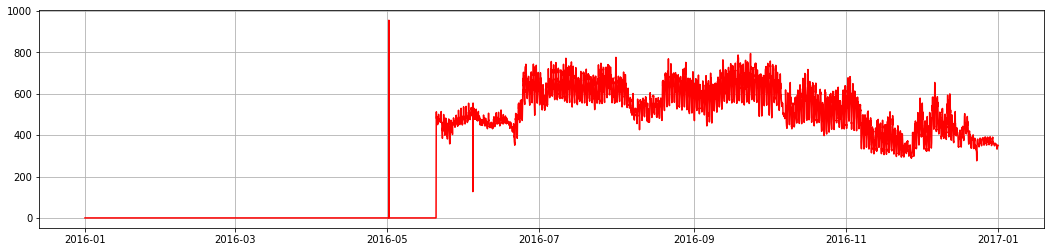

--------------------------------building_id: 62 - meter: 1--------------------------------


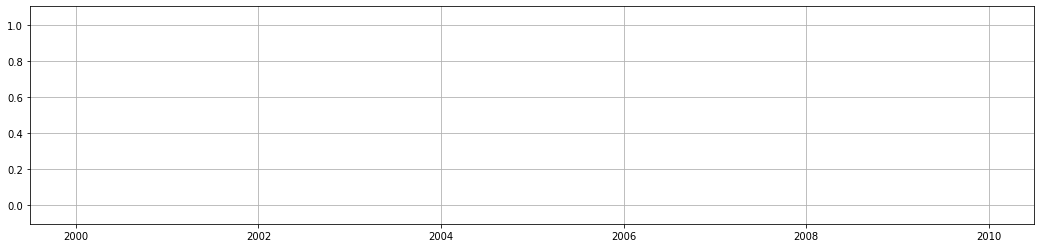

--------------------------------building_id: 63 - meter: 0--------------------------------


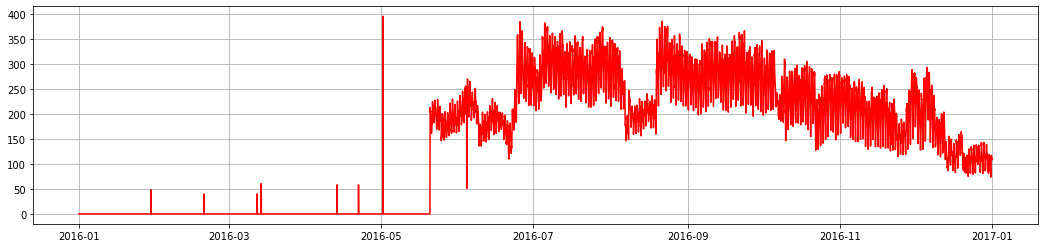

--------------------------------building_id: 63 - meter: 1--------------------------------


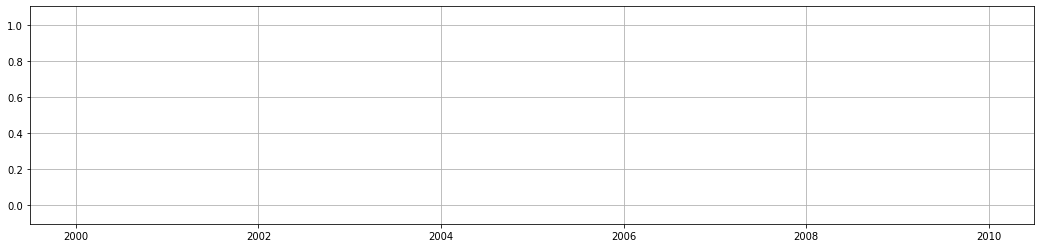

--------------------------------building_id: 64 - meter: 0--------------------------------


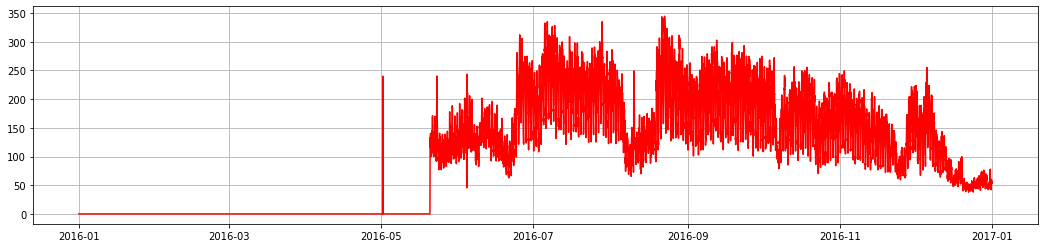

--------------------------------building_id: 64 - meter: 1--------------------------------


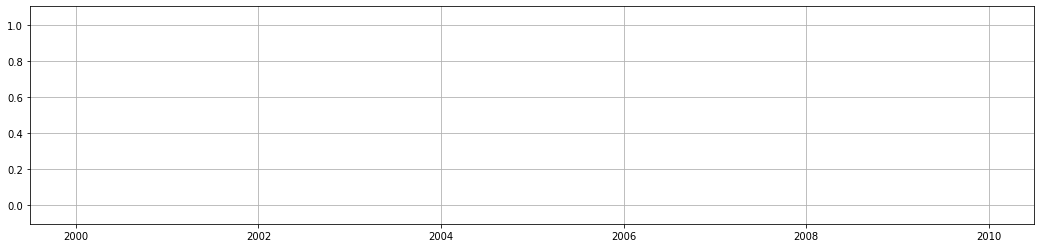

--------------------------------building_id: 65 - meter: 0--------------------------------


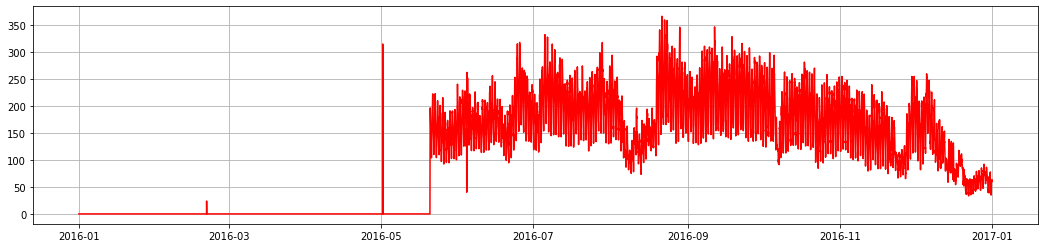

--------------------------------building_id: 65 - meter: 1--------------------------------


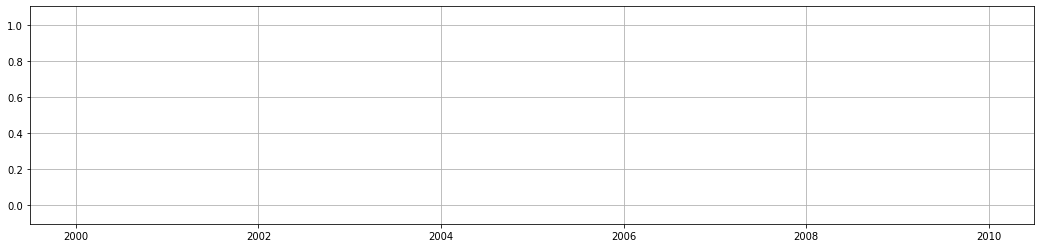

--------------------------------building_id: 66 - meter: 0--------------------------------


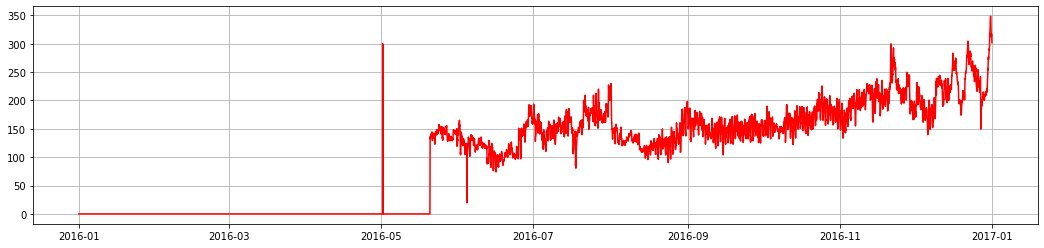

--------------------------------building_id: 66 - meter: 1--------------------------------


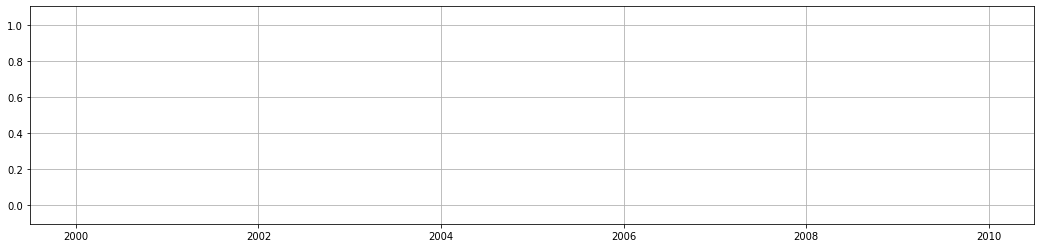

--------------------------------building_id: 67 - meter: 0--------------------------------


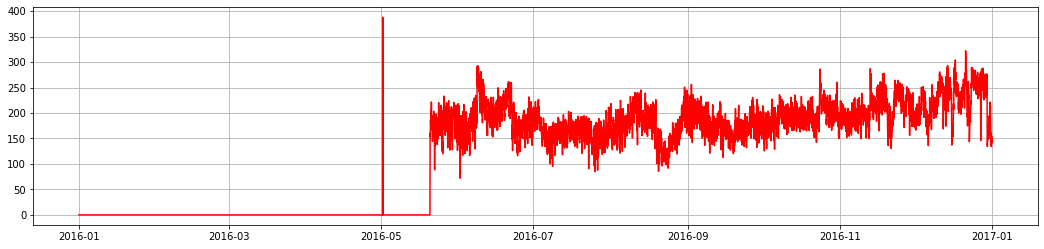

--------------------------------building_id: 67 - meter: 1--------------------------------


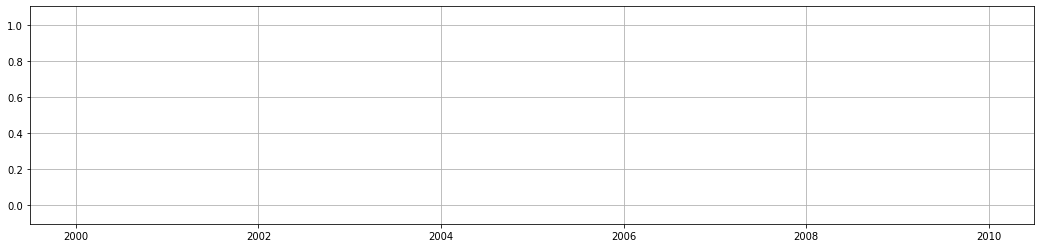

--------------------------------building_id: 68 - meter: 0--------------------------------


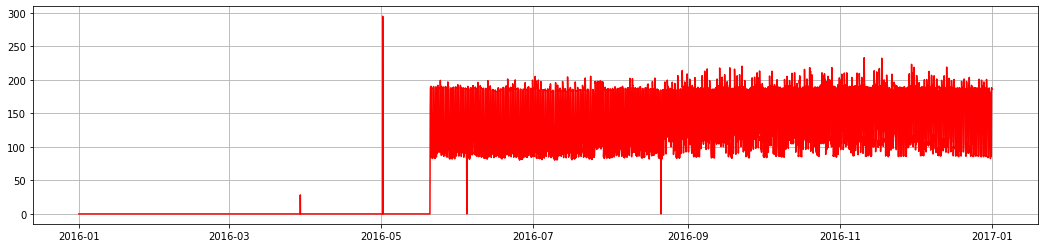

--------------------------------building_id: 68 - meter: 1--------------------------------


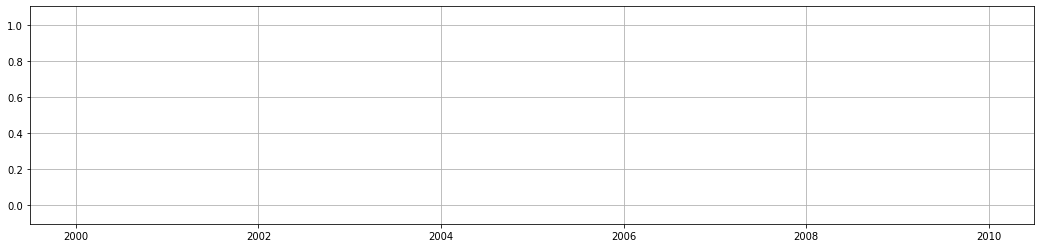

--------------------------------building_id: 69 - meter: 0--------------------------------


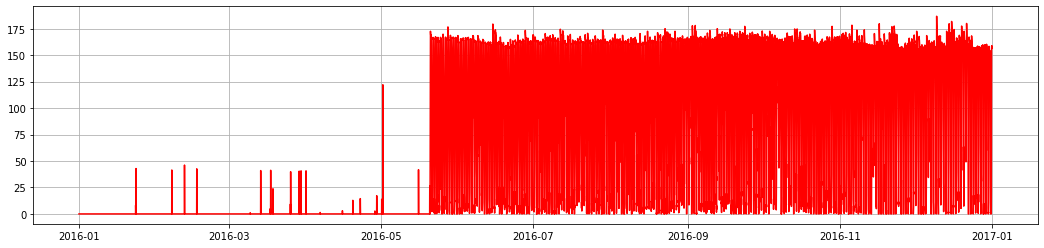

--------------------------------building_id: 69 - meter: 1--------------------------------


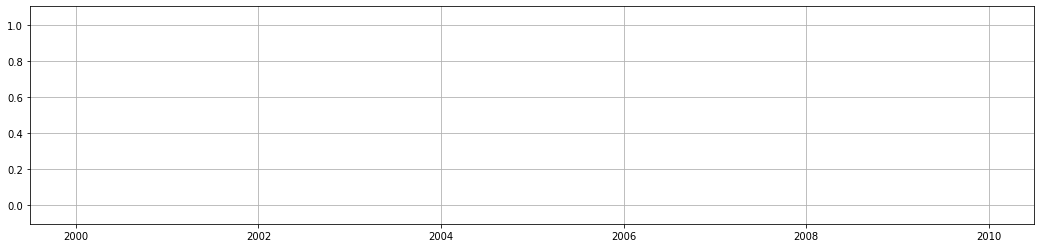

--------------------------------building_id: 70 - meter: 0--------------------------------


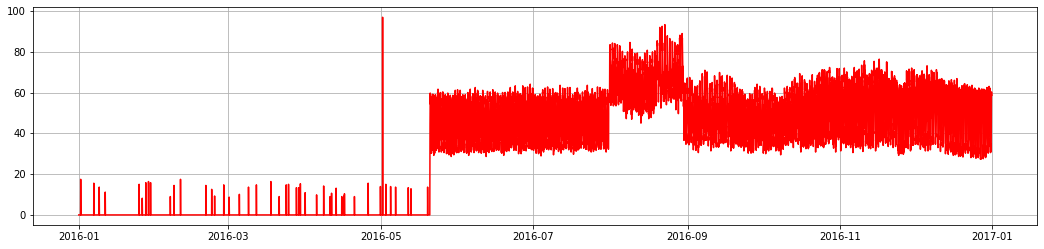

--------------------------------building_id: 70 - meter: 1--------------------------------


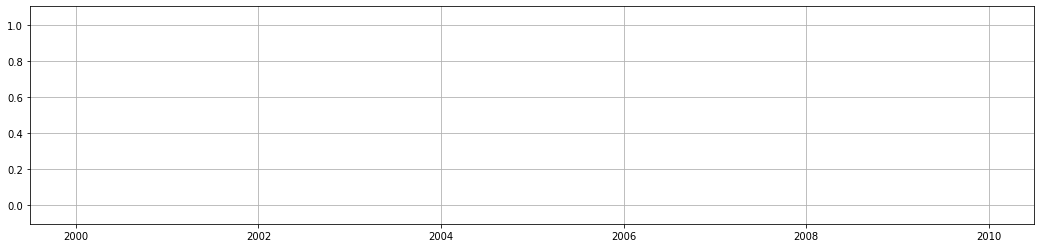

--------------------------------building_id: 71 - meter: 0--------------------------------


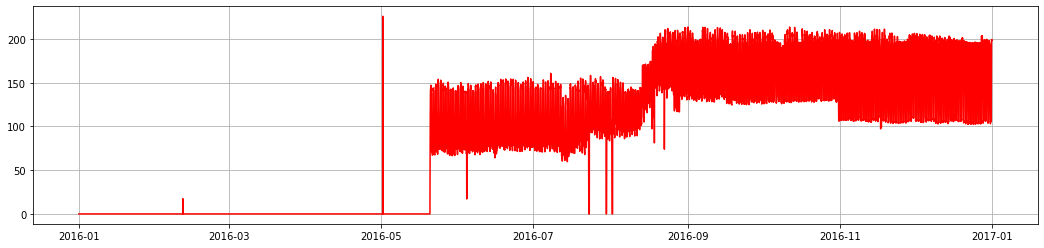

--------------------------------building_id: 71 - meter: 1--------------------------------


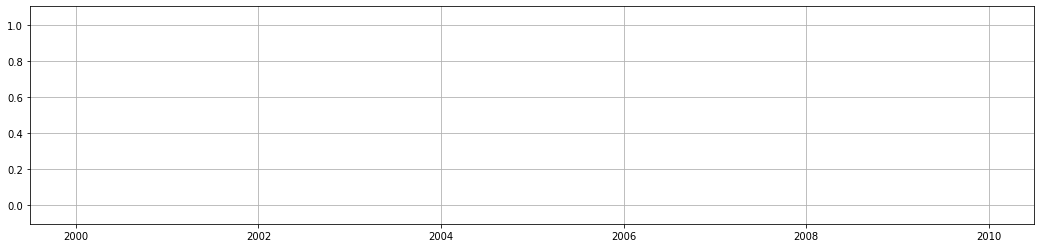

--------------------------------building_id: 72 - meter: 0--------------------------------


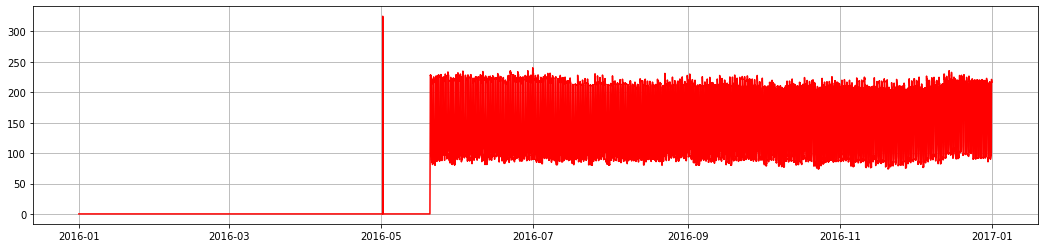

--------------------------------building_id: 72 - meter: 1--------------------------------


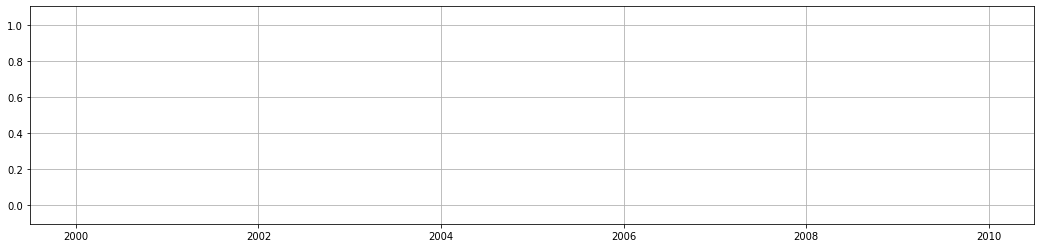

--------------------------------building_id: 73 - meter: 0--------------------------------


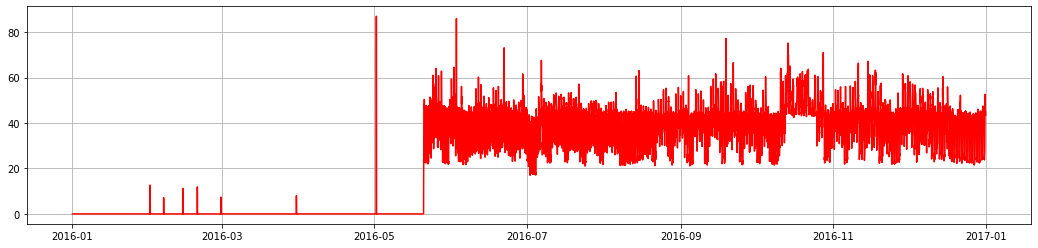

--------------------------------building_id: 73 - meter: 1--------------------------------


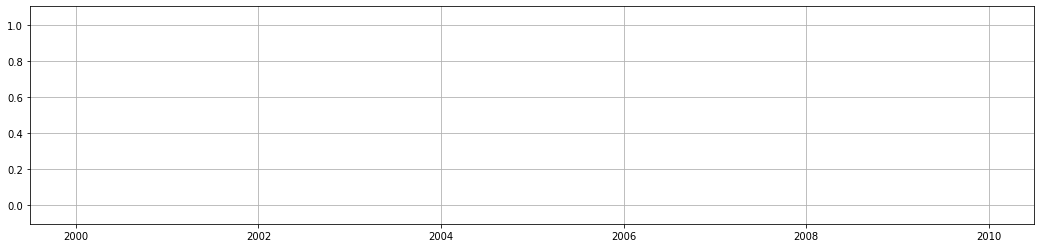

--------------------------------building_id: 74 - meter: 0--------------------------------


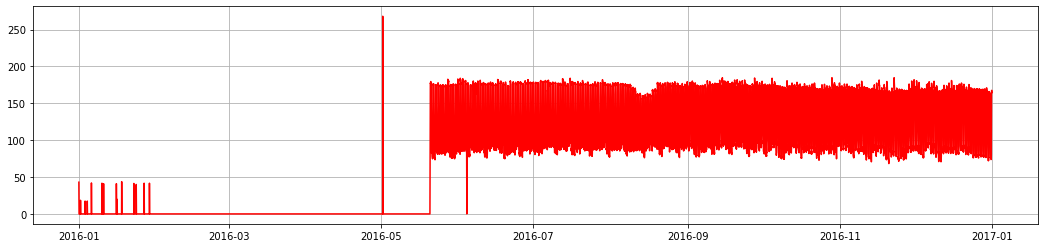

--------------------------------building_id: 74 - meter: 1--------------------------------


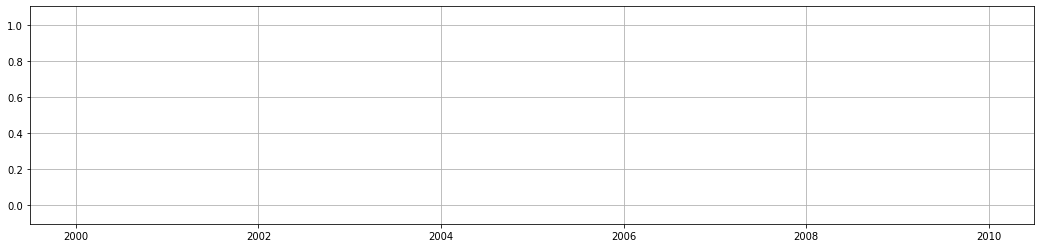

--------------------------------building_id: 75 - meter: 0--------------------------------


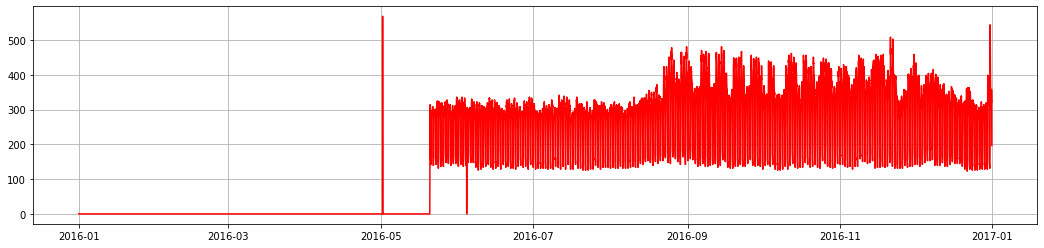

--------------------------------building_id: 75 - meter: 1--------------------------------


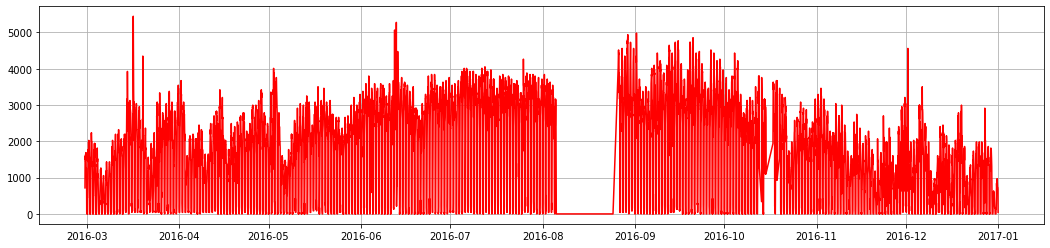

--------------------------------building_id: 76 - meter: 0--------------------------------


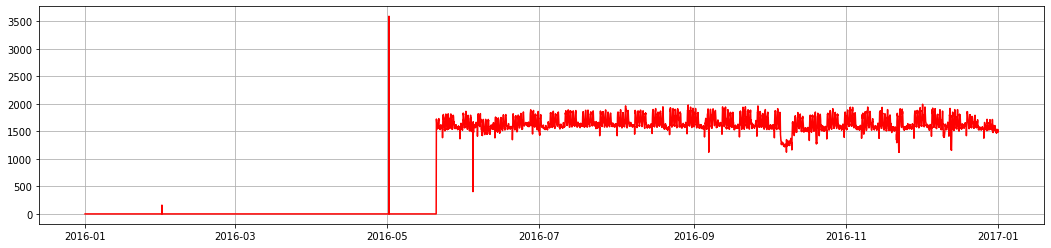

--------------------------------building_id: 76 - meter: 1--------------------------------


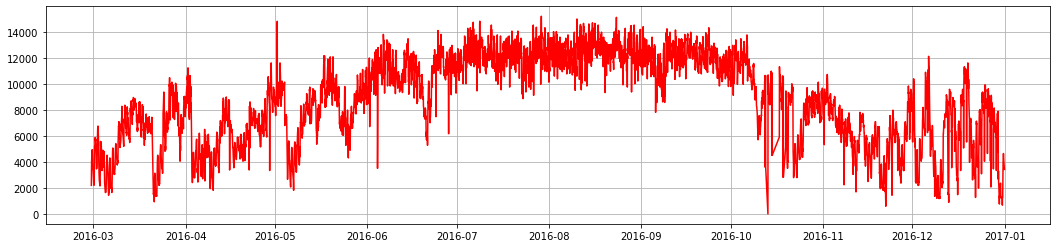

--------------------------------building_id: 77 - meter: 0--------------------------------


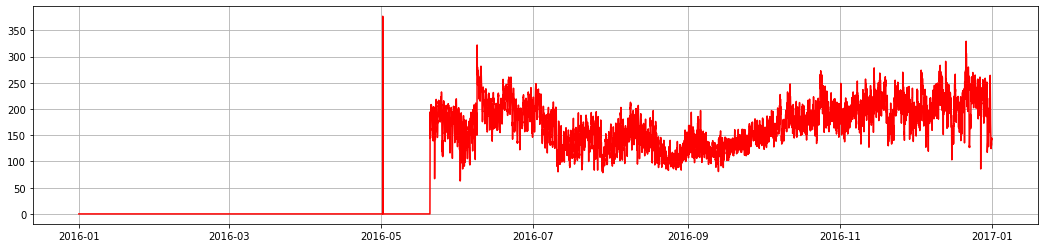

--------------------------------building_id: 77 - meter: 1--------------------------------


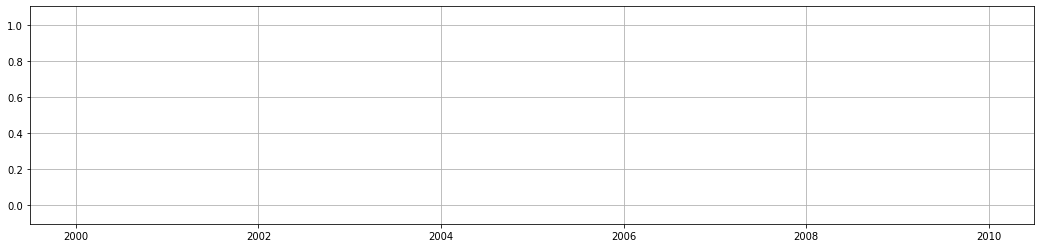

--------------------------------building_id: 78 - meter: 0--------------------------------


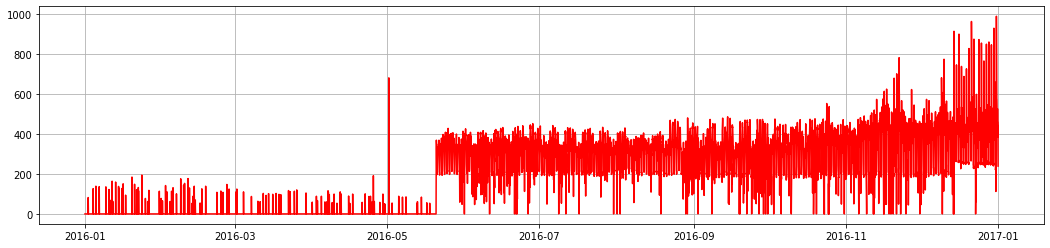

--------------------------------building_id: 78 - meter: 1--------------------------------


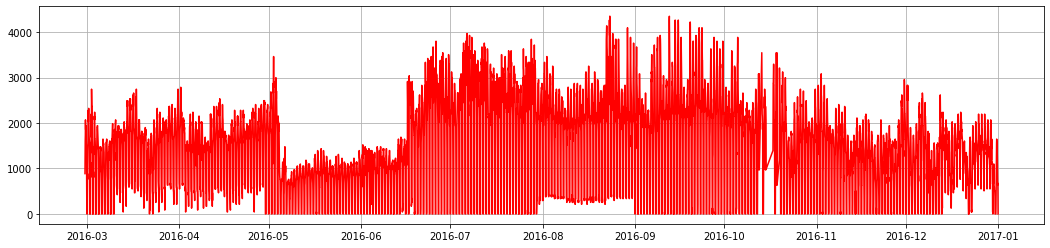

--------------------------------building_id: 79 - meter: 0--------------------------------


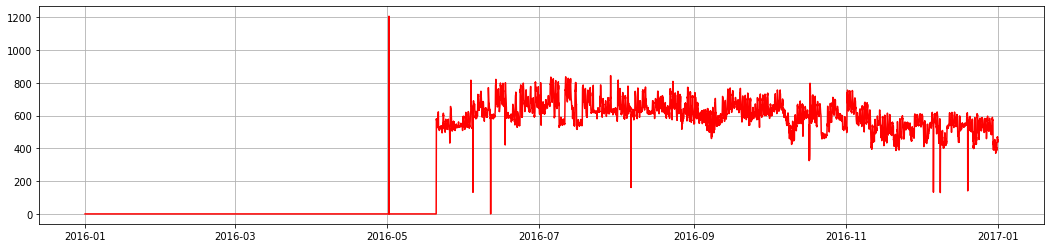

--------------------------------building_id: 79 - meter: 1--------------------------------


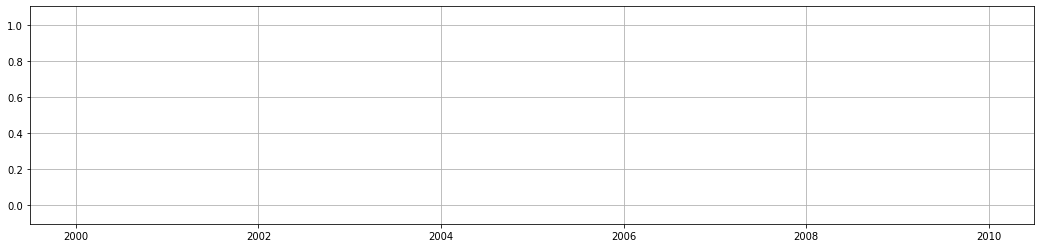

--------------------------------building_id: 80 - meter: 0--------------------------------


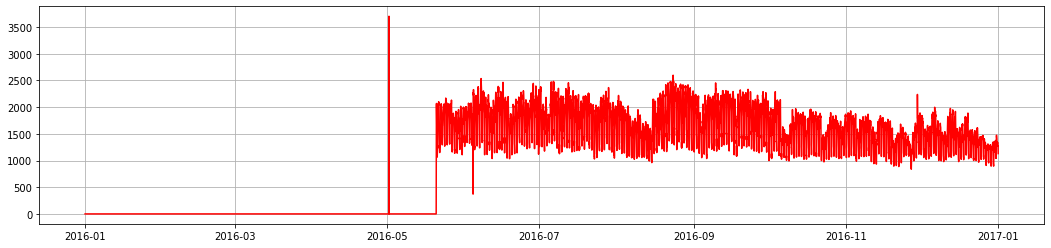

--------------------------------building_id: 80 - meter: 1--------------------------------


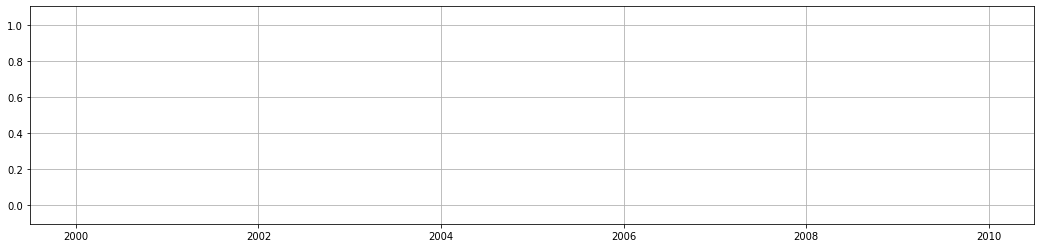

--------------------------------building_id: 81 - meter: 0--------------------------------


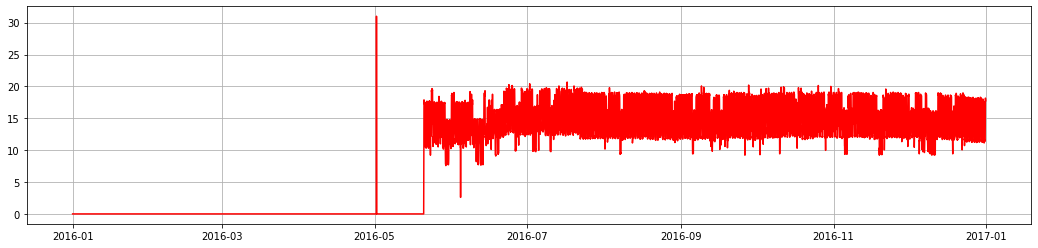

--------------------------------building_id: 81 - meter: 1--------------------------------


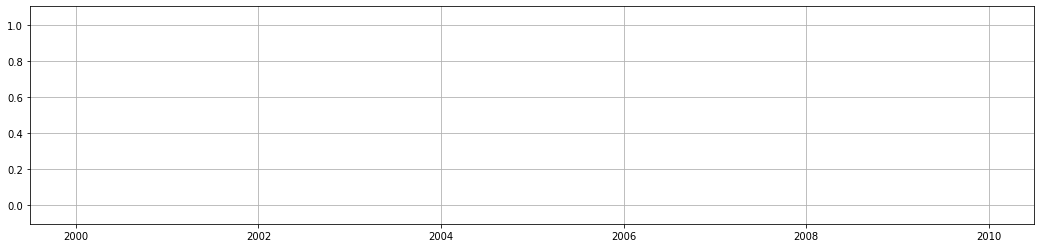

--------------------------------building_id: 82 - meter: 0--------------------------------


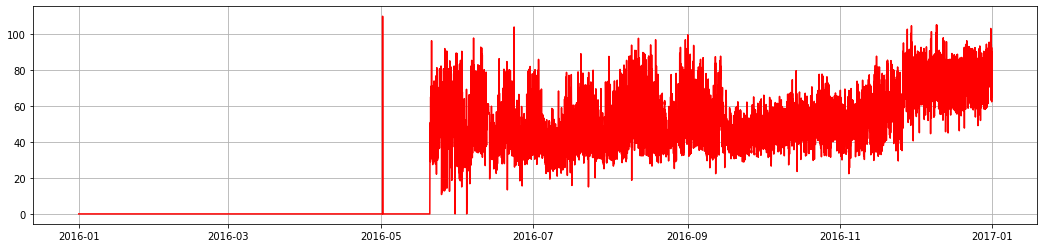

--------------------------------building_id: 82 - meter: 1--------------------------------


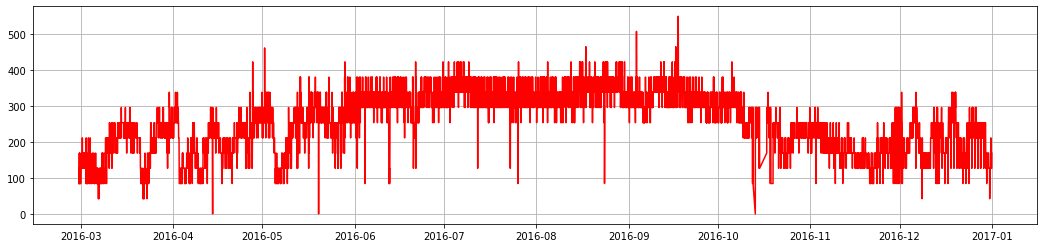

--------------------------------building_id: 83 - meter: 0--------------------------------


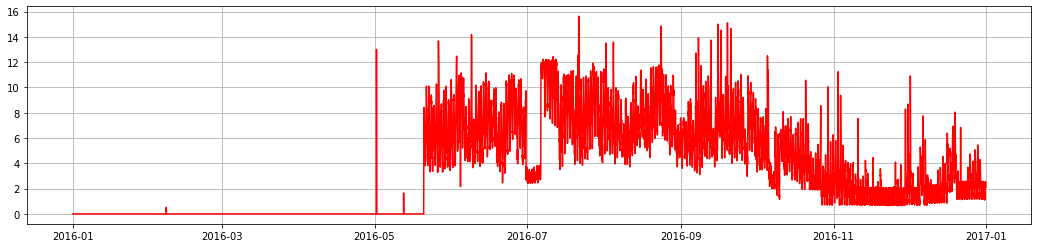

--------------------------------building_id: 83 - meter: 1--------------------------------


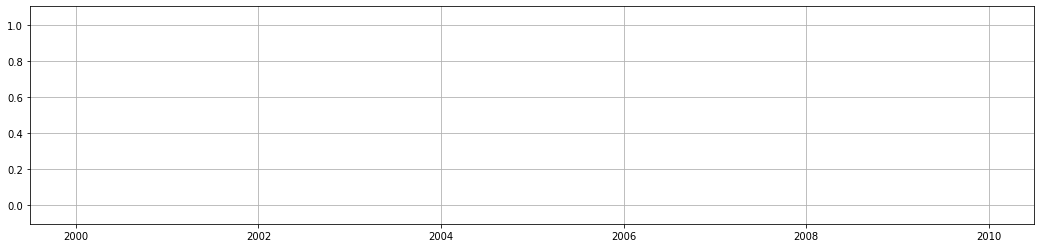

--------------------------------building_id: 84 - meter: 0--------------------------------


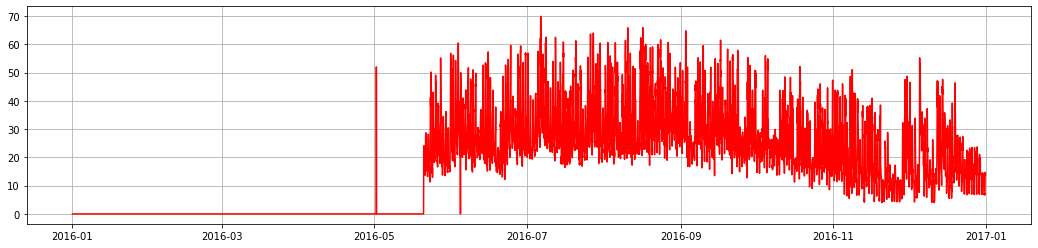

--------------------------------building_id: 84 - meter: 1--------------------------------


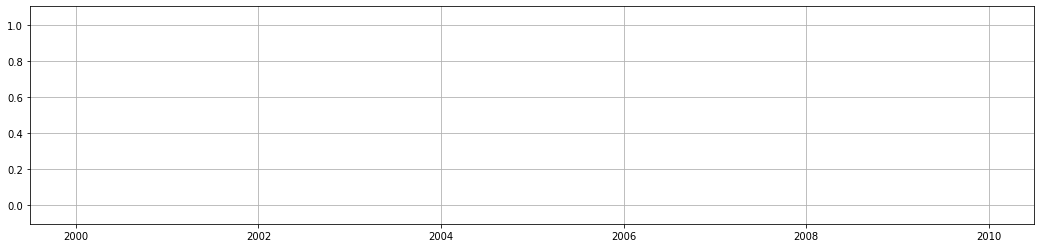

--------------------------------building_id: 85 - meter: 0--------------------------------


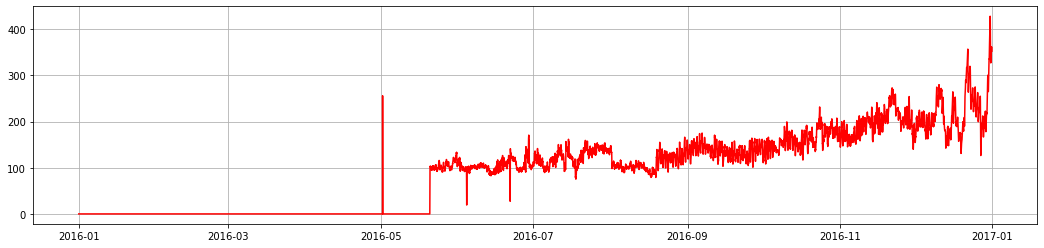

--------------------------------building_id: 85 - meter: 1--------------------------------


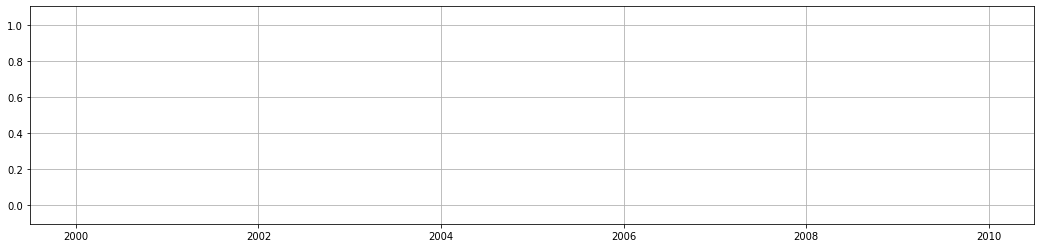

--------------------------------building_id: 86 - meter: 0--------------------------------


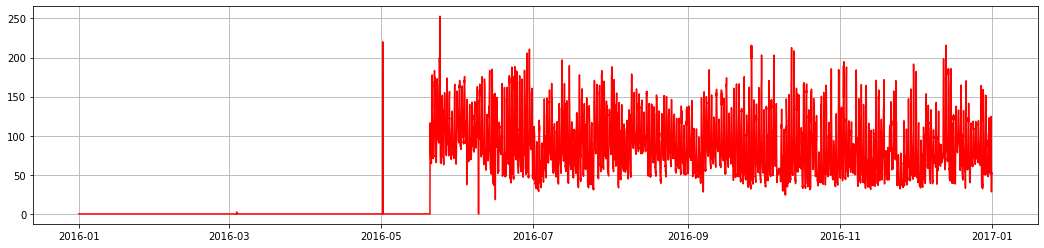

--------------------------------building_id: 86 - meter: 1--------------------------------


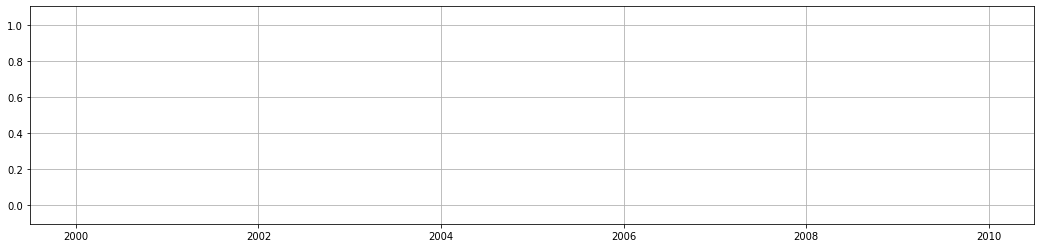

--------------------------------building_id: 87 - meter: 0--------------------------------


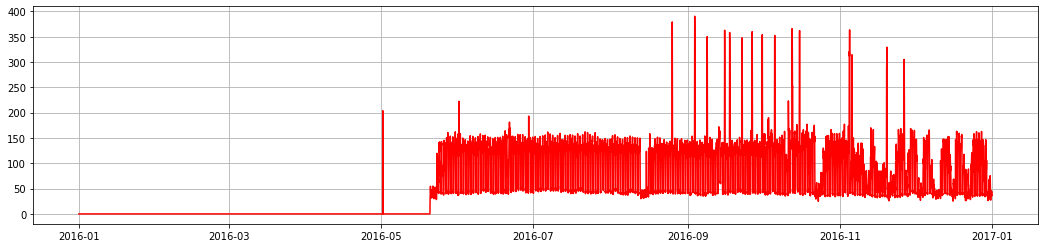

--------------------------------building_id: 87 - meter: 1--------------------------------


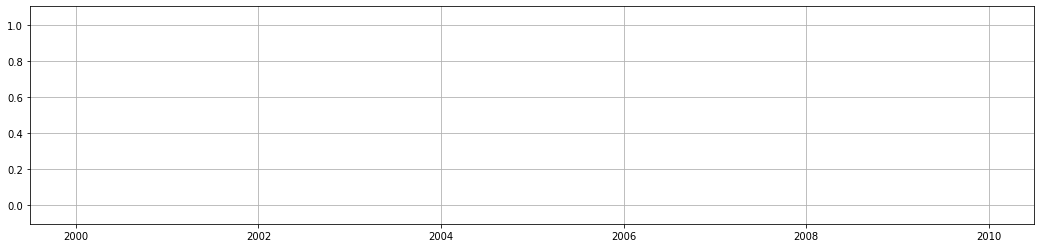

--------------------------------building_id: 88 - meter: 0--------------------------------


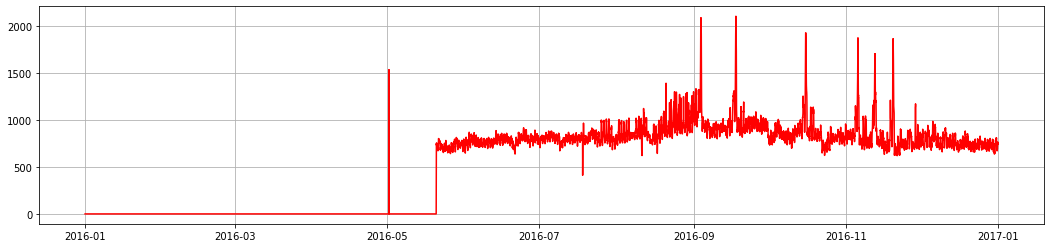

--------------------------------building_id: 88 - meter: 1--------------------------------


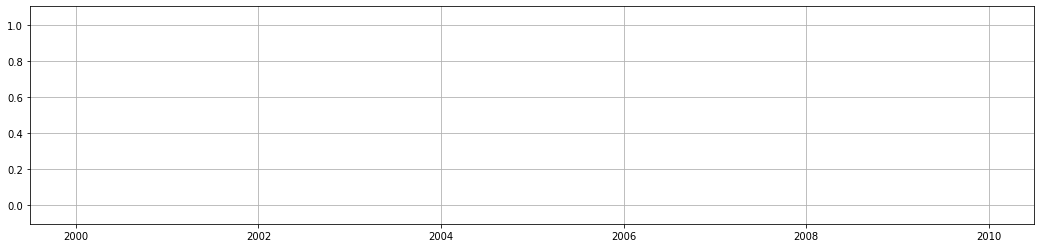

--------------------------------building_id: 89 - meter: 0--------------------------------


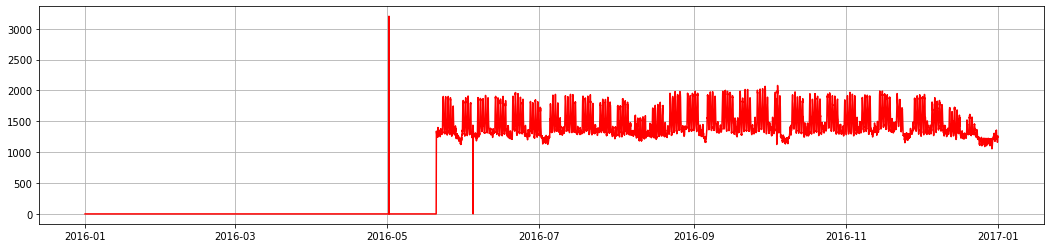

--------------------------------building_id: 89 - meter: 1--------------------------------


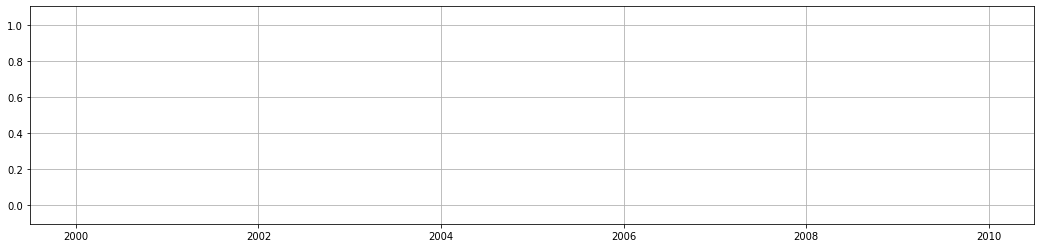

--------------------------------building_id: 90 - meter: 0--------------------------------


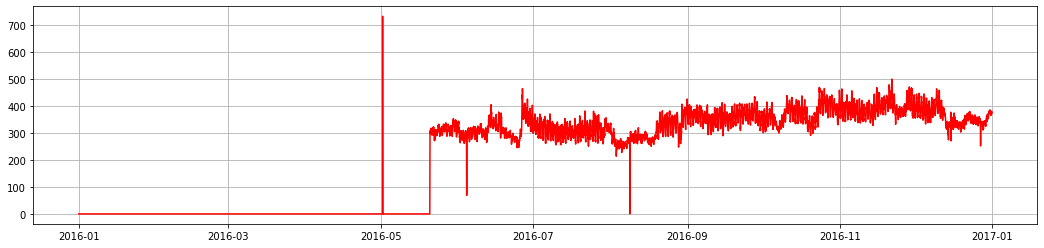

--------------------------------building_id: 90 - meter: 1--------------------------------


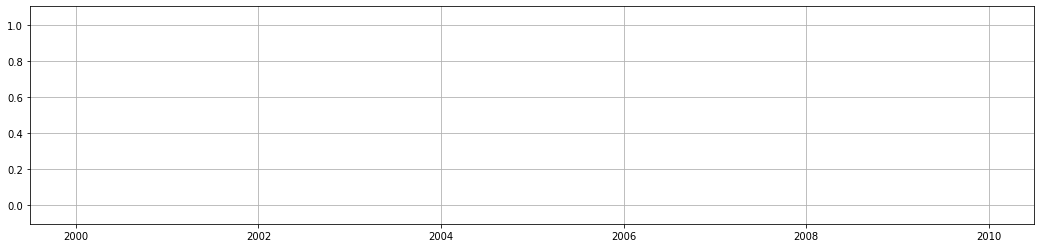

--------------------------------building_id: 91 - meter: 0--------------------------------


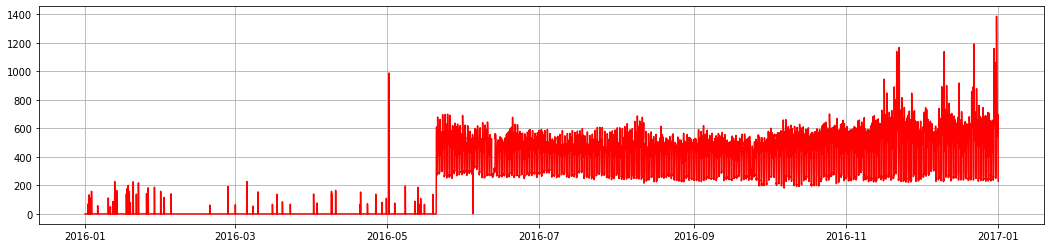

--------------------------------building_id: 91 - meter: 1--------------------------------


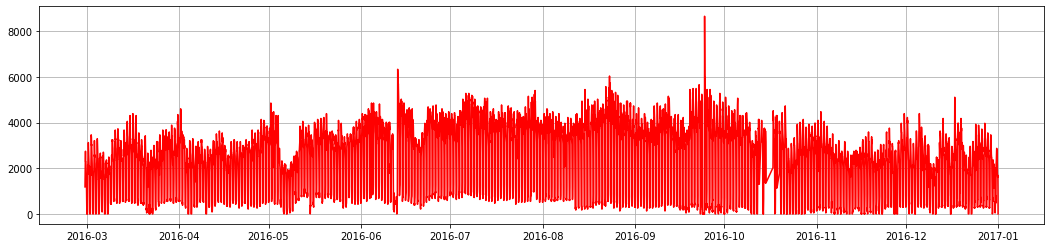

--------------------------------building_id: 92 - meter: 0--------------------------------


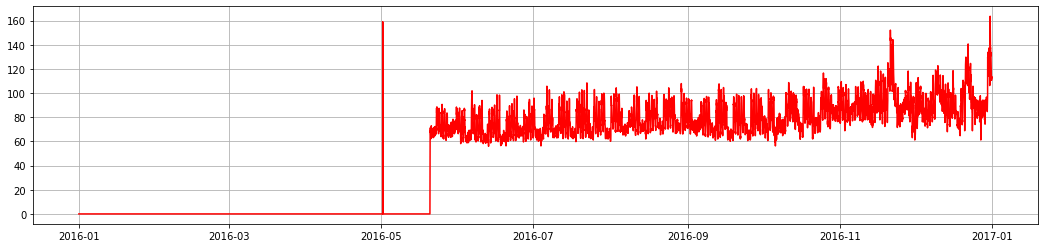

--------------------------------building_id: 92 - meter: 1--------------------------------


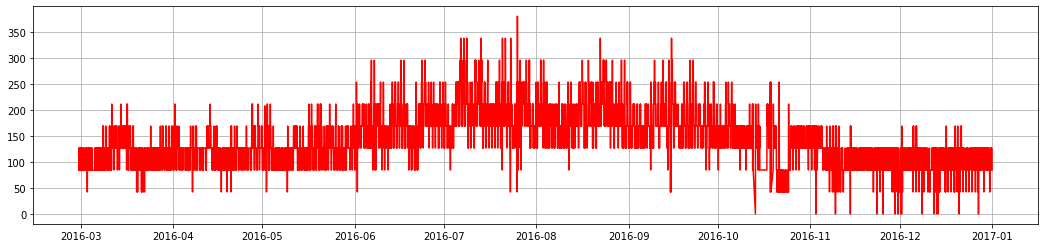

--------------------------------building_id: 93 - meter: 0--------------------------------


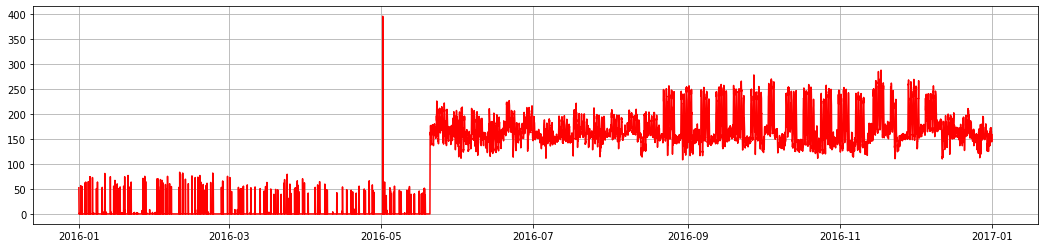

--------------------------------building_id: 93 - meter: 1--------------------------------


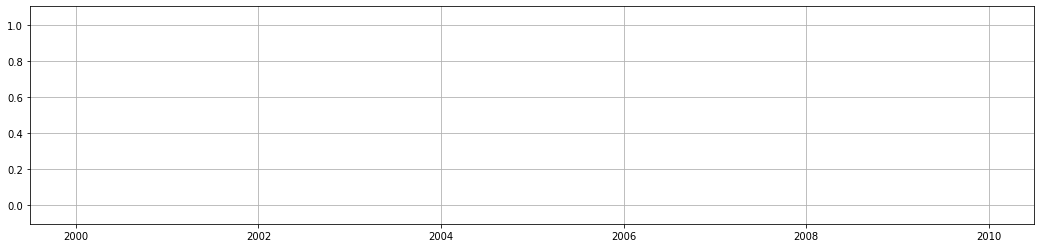

--------------------------------building_id: 94 - meter: 0--------------------------------


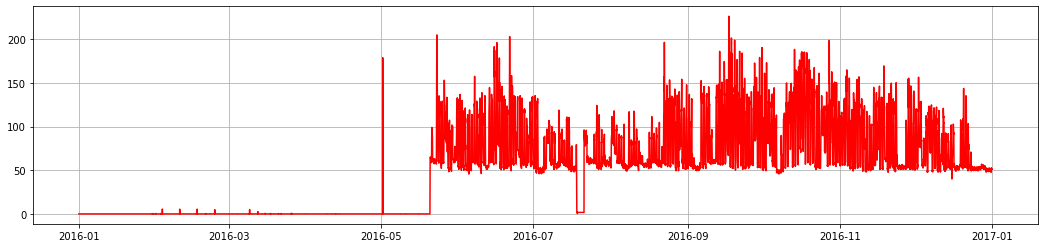

--------------------------------building_id: 94 - meter: 1--------------------------------


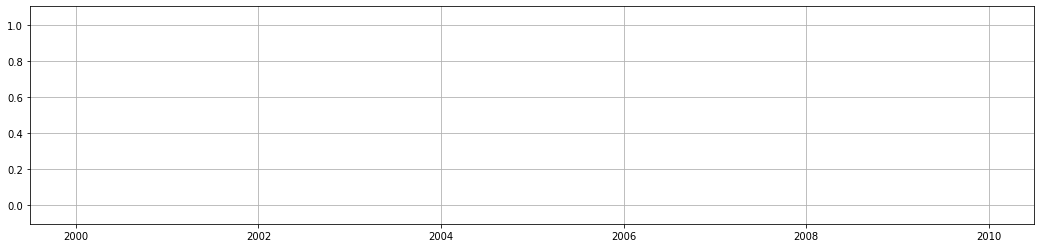

--------------------------------building_id: 95 - meter: 0--------------------------------


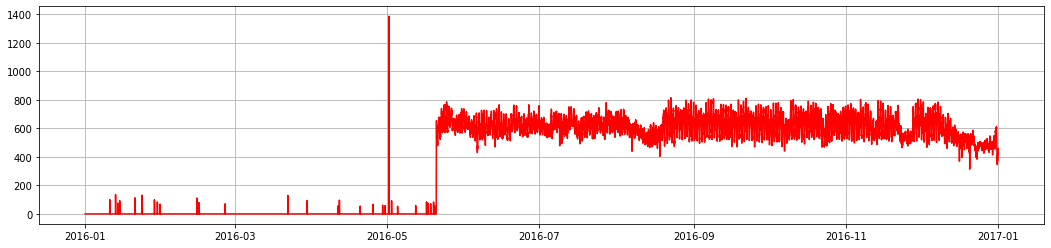

--------------------------------building_id: 95 - meter: 1--------------------------------


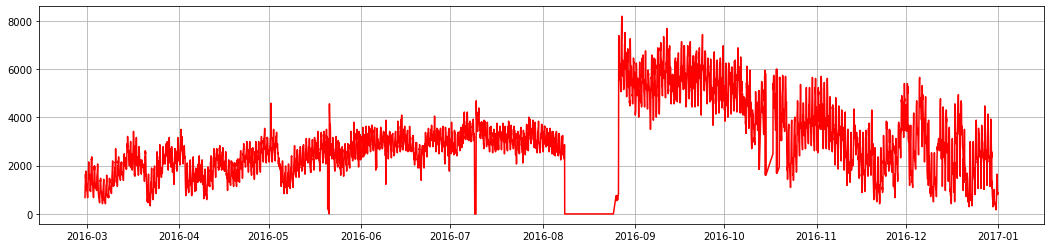

--------------------------------building_id: 96 - meter: 0--------------------------------


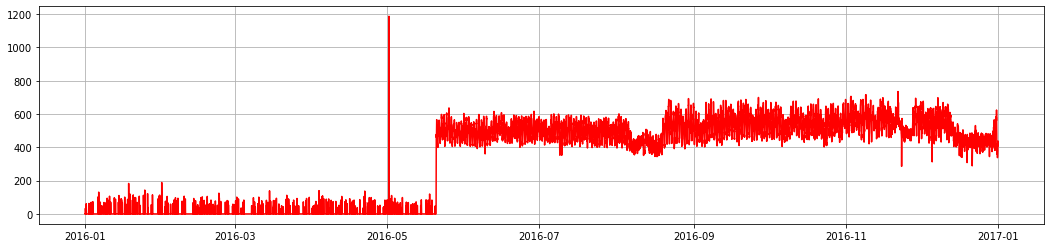

--------------------------------building_id: 96 - meter: 1--------------------------------


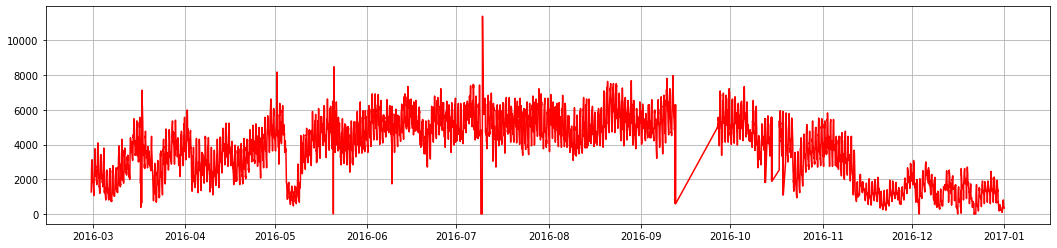

--------------------------------building_id: 97 - meter: 0--------------------------------


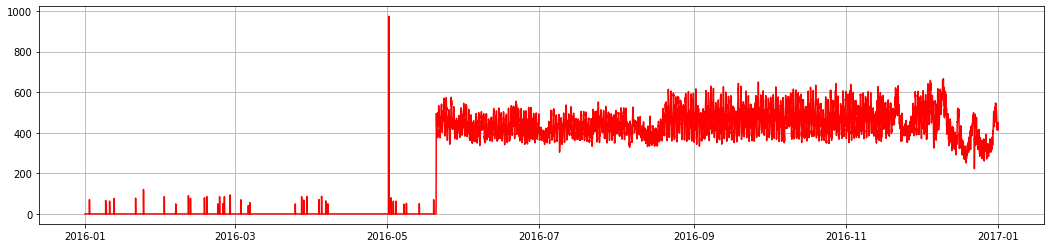

--------------------------------building_id: 97 - meter: 1--------------------------------


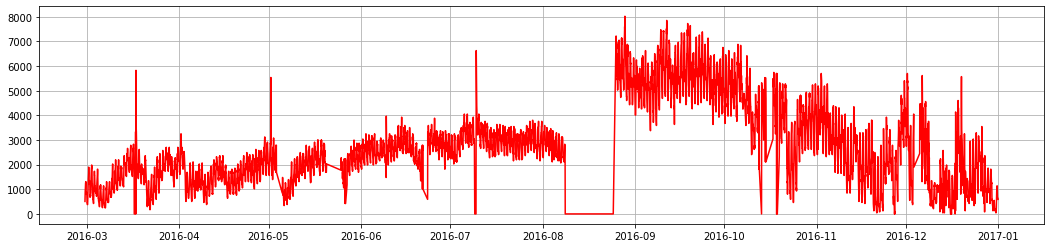

--------------------------------building_id: 98 - meter: 0--------------------------------


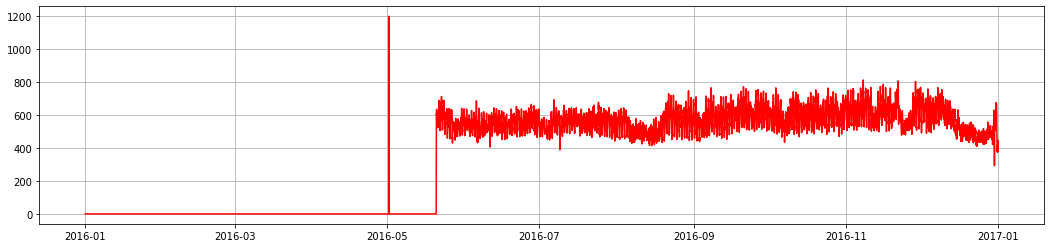

--------------------------------building_id: 98 - meter: 1--------------------------------


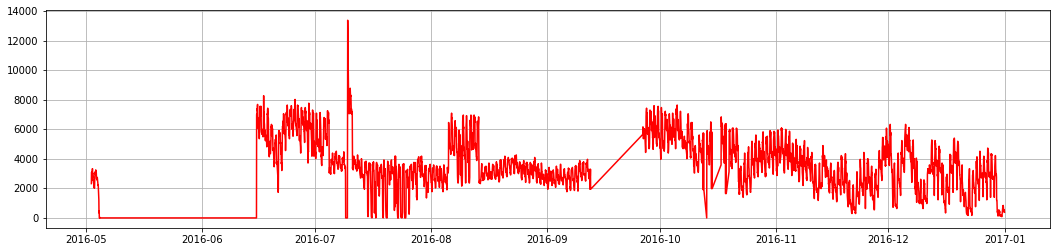

--------------------------------building_id: 99 - meter: 0--------------------------------


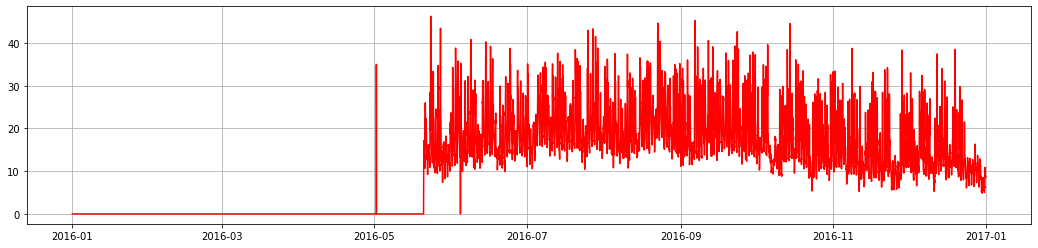

--------------------------------building_id: 99 - meter: 1--------------------------------


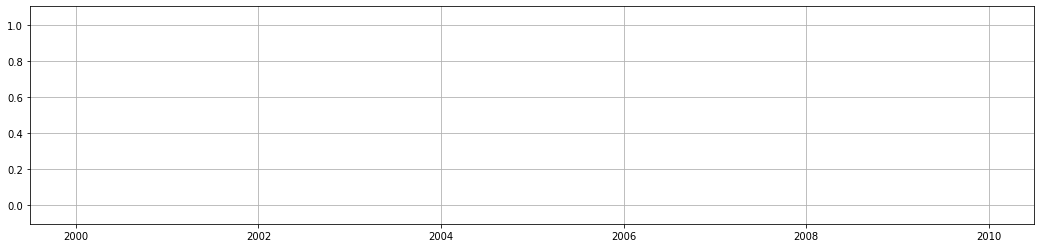

-------------------------------building_id: 100 - meter: 0--------------------------------


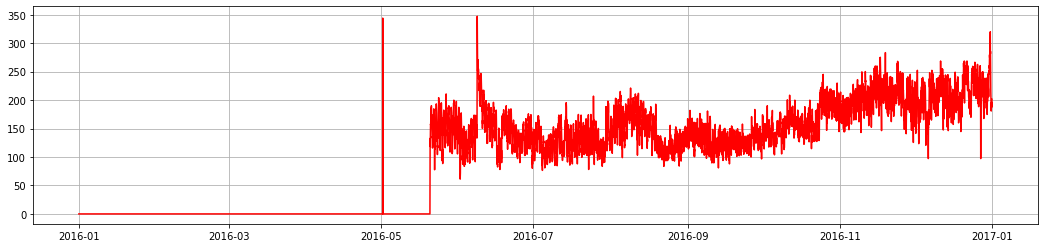

-------------------------------building_id: 100 - meter: 1--------------------------------


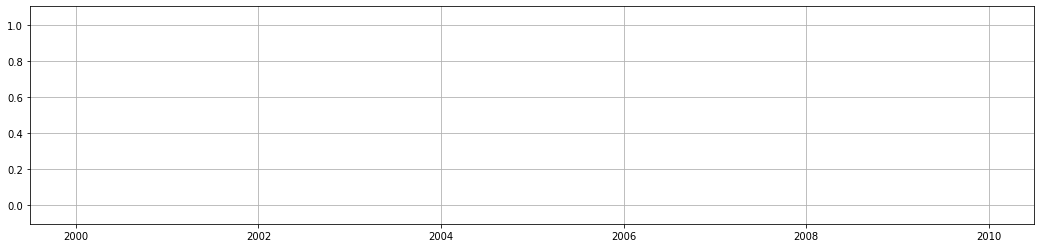

-------------------------------building_id: 101 - meter: 0--------------------------------


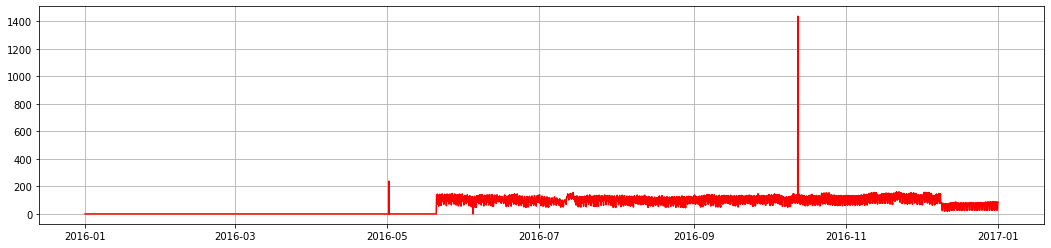

-------------------------------building_id: 101 - meter: 1--------------------------------


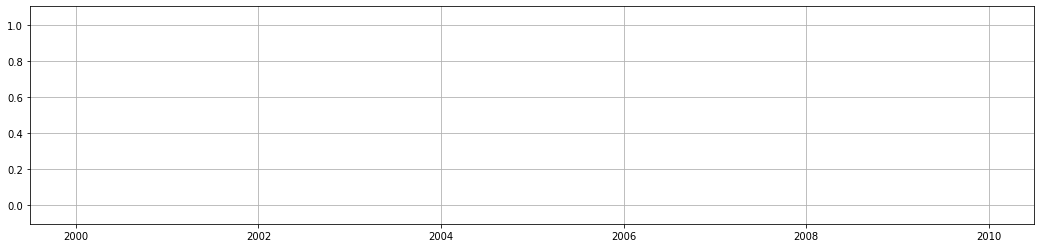

-------------------------------building_id: 102 - meter: 0--------------------------------


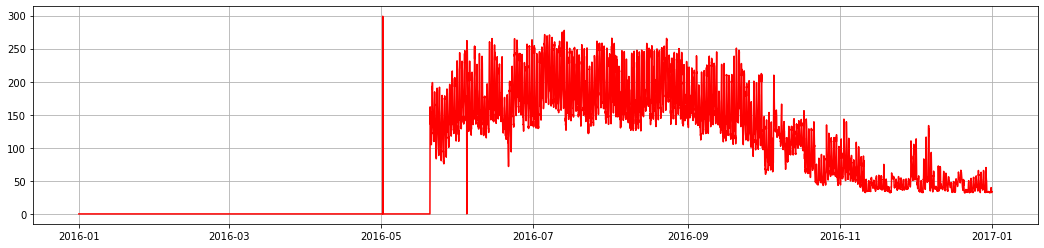

-------------------------------building_id: 102 - meter: 1--------------------------------


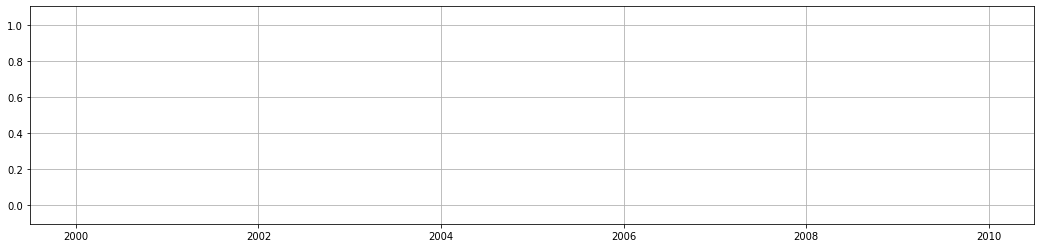

-------------------------------building_id: 103 - meter: 0--------------------------------


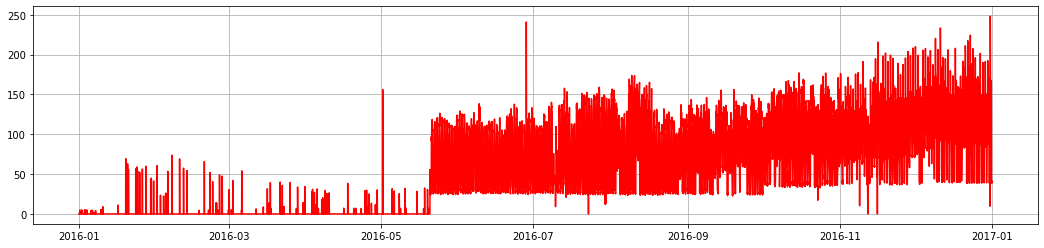

-------------------------------building_id: 103 - meter: 1--------------------------------


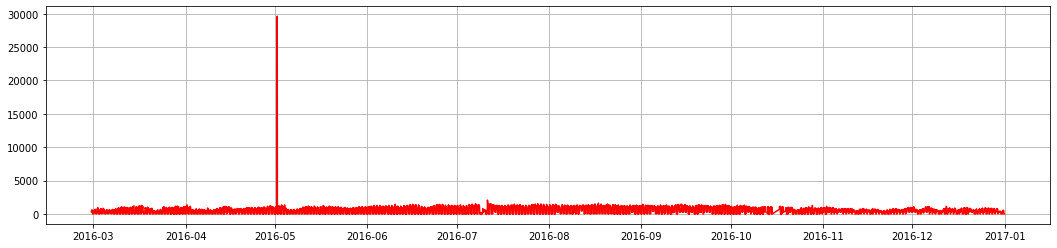

-------------------------------building_id: 104 - meter: 0--------------------------------


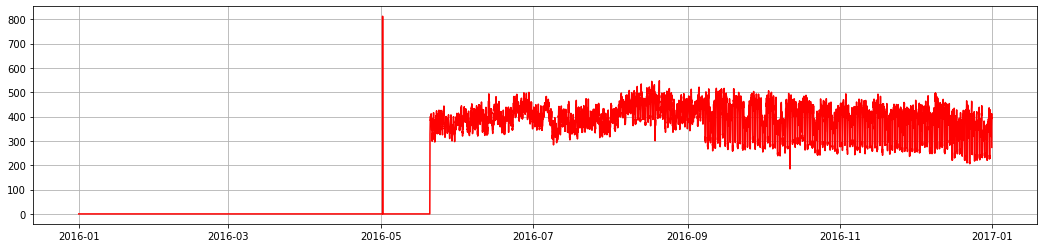

-------------------------------building_id: 104 - meter: 1--------------------------------


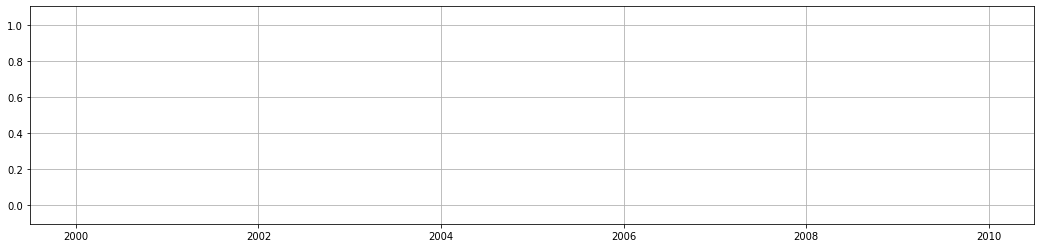

--------------------------------building_id: 29 - meter: 0--------------------------------


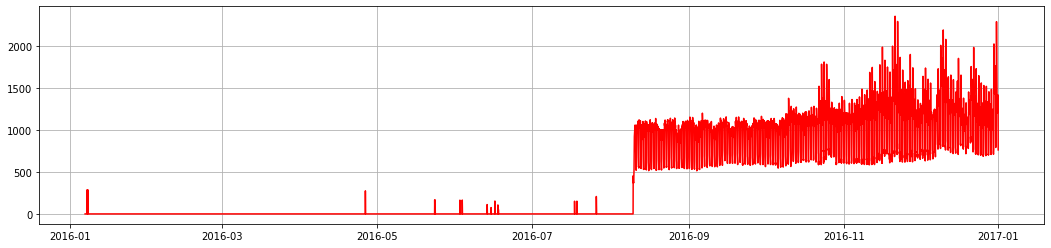

--------------------------------building_id: 29 - meter: 1--------------------------------


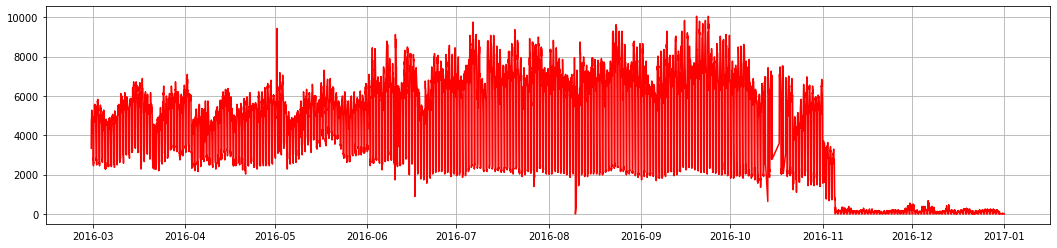

--------------------------------building_id: 48 - meter: 0--------------------------------


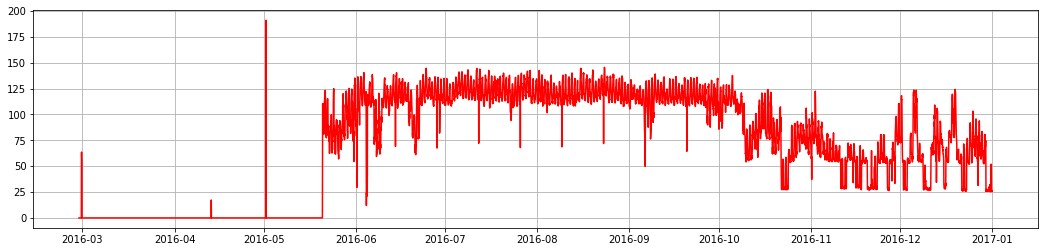

--------------------------------building_id: 48 - meter: 1--------------------------------


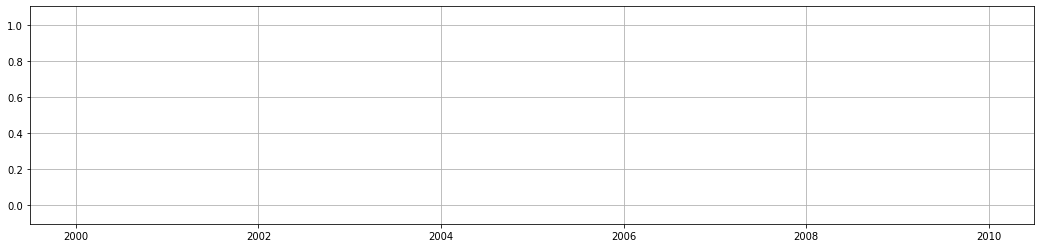

In [46]:
plot_ts_by_site(0)

***
### data cleaning for `site_id=0`

In [119]:
train_data_cut = train_data.query("site_id == 0")
ts_uid_values = train_data_cut.loc[:, ["building_id", "meter"]].drop_duplicates()
delete_idx = pd.Index(np.array([], dtype=int))
for i,row in ts_uid_values.iterrows():
    ts = train_data_cut.query("building_id == @row.building_id & meter == @row.meter")
    if ts.query("timestamp < '2016-05-20 18:00:00'").meter_reading.quantile(0.75) == 0:
        delete_idx = delete_idx.union(ts.query("timestamp < '2016-05-20 18:00:00'").index)

In [123]:
train_data.drop(delete_idx, axis=0, inplace=True)

In [124]:
len(train_data)

19871167

***
### hourly patter for air temperature by `site_id`

In [5]:
weather_train = pd.read_csv("data/weather_train.csv", parse_dates=["timestamp"])
weather_train["hour"] = weather_train.timestamp.dt.hour
hourly_temp = weather_train.groupby(["site_id","hour"])["air_temperature"].mean().reset_index()

hourly temperature for site: 0


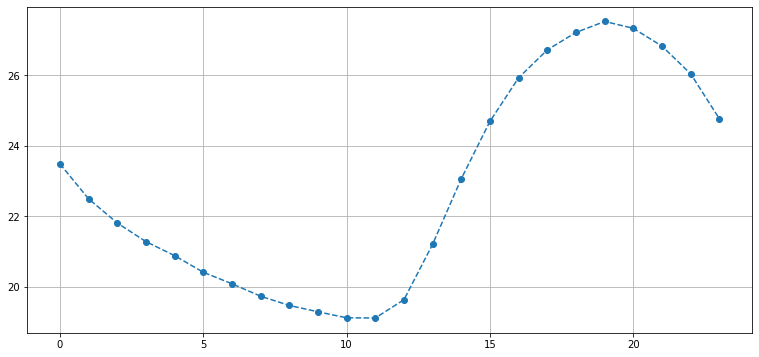

hourly temperature for site: 1


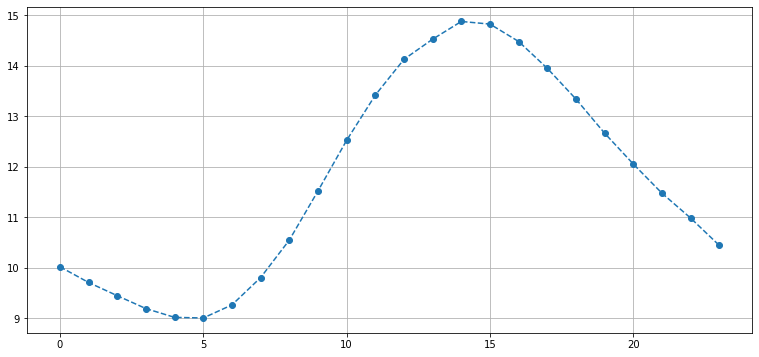

hourly temperature for site: 2


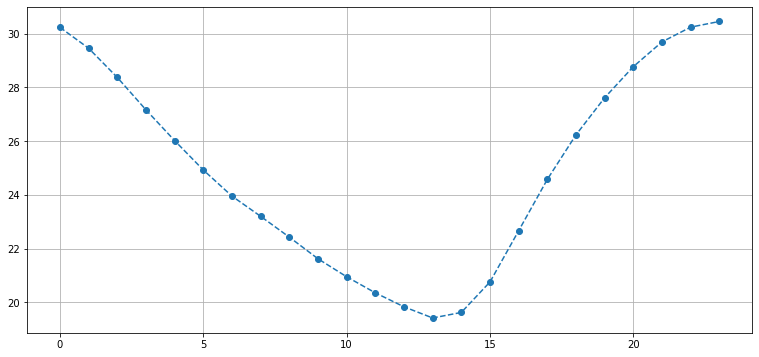

hourly temperature for site: 3


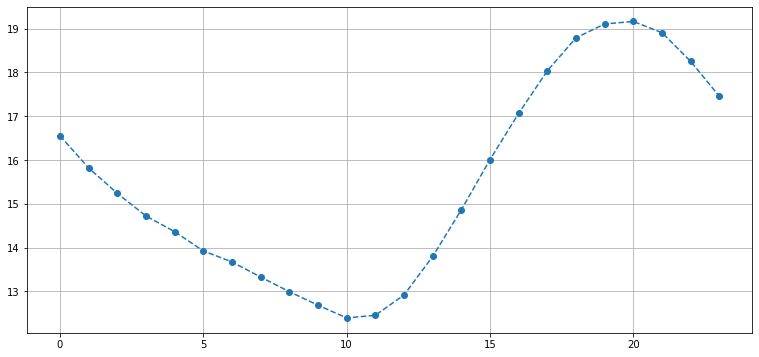

hourly temperature for site: 4


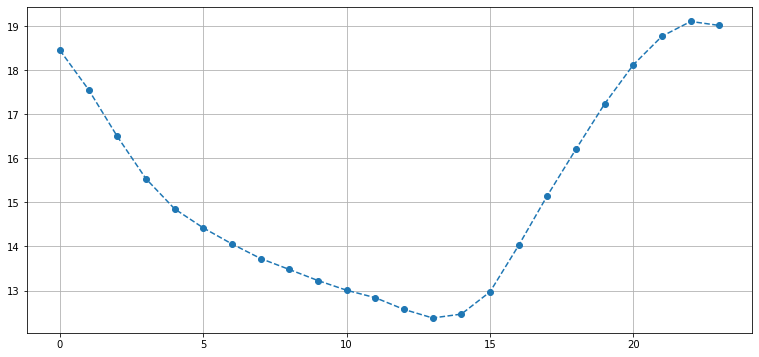

hourly temperature for site: 5


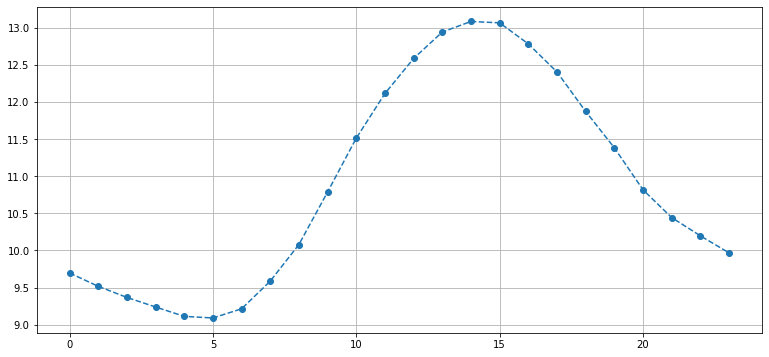

hourly temperature for site: 6


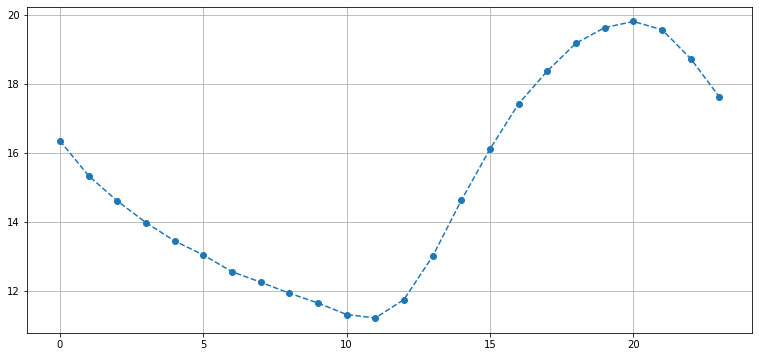

hourly temperature for site: 7


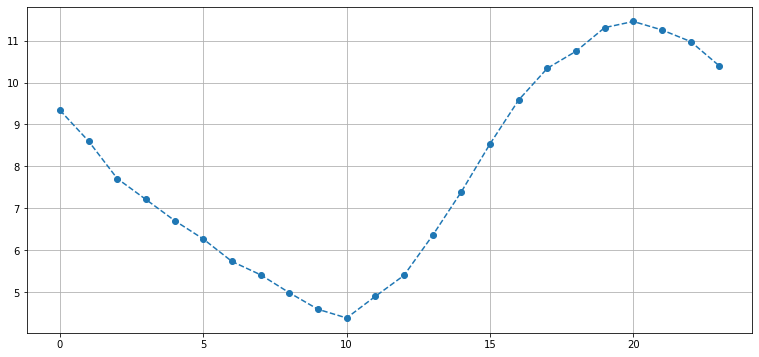

hourly temperature for site: 8


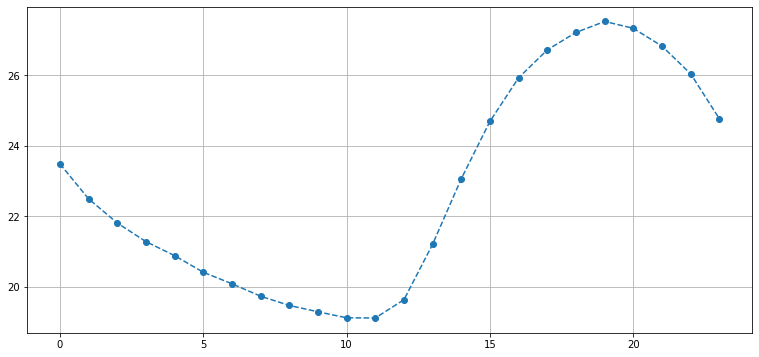

hourly temperature for site: 9


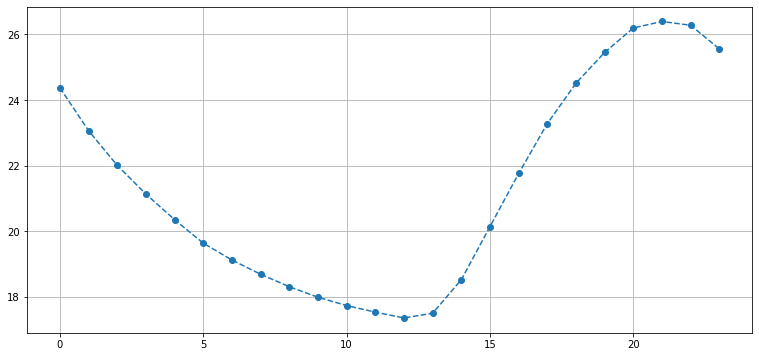

hourly temperature for site: 10


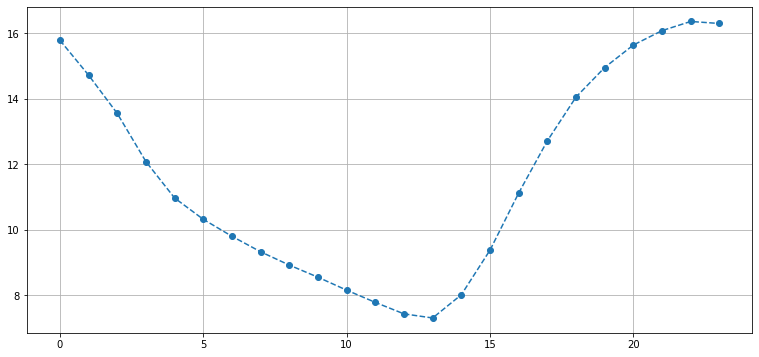

hourly temperature for site: 11


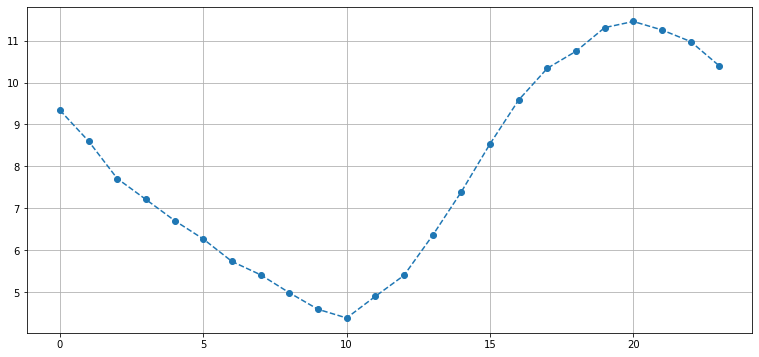

hourly temperature for site: 12


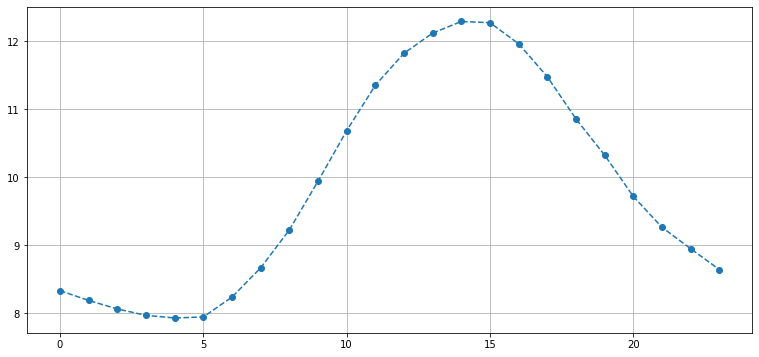

hourly temperature for site: 13


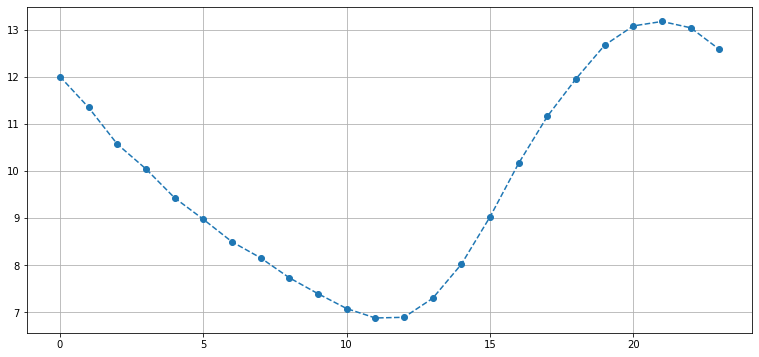

hourly temperature for site: 14


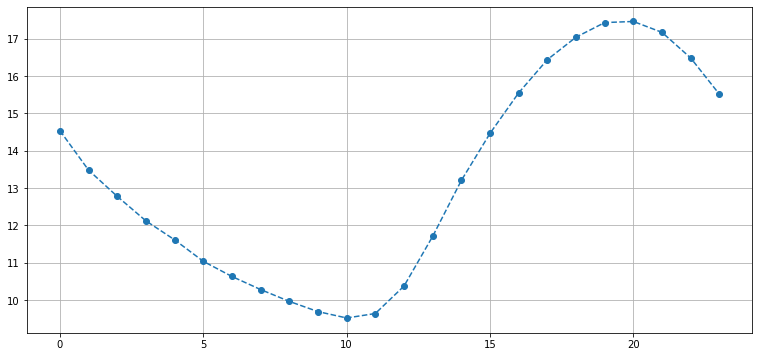

hourly temperature for site: 15


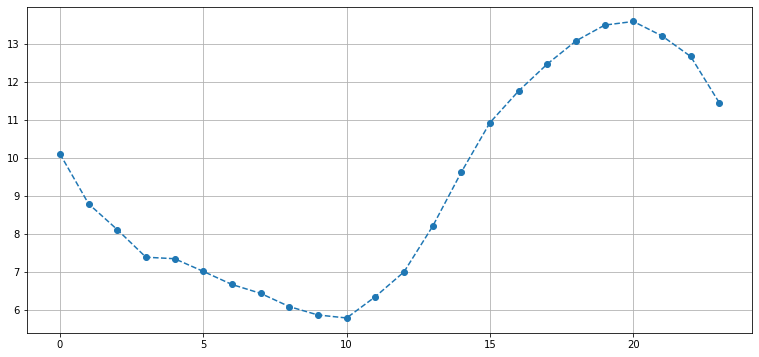

In [28]:
for site_id in hourly_temp.site_id.unique():
    print(f"hourly temperature for site: {site_id}")
    ts = hourly_temp.query("site_id == @site_id")
    plt.figure(figsize=(13,6))
    plt.plot(ts.hour.values, ts.air_temperature.values, "o--")
    plt.grid()
    plt.show()

### fix to set weather data to its local time

In [47]:
sites_time_corrections = {0:4, 1:0, 2:7, 3:4, 4:7, 5:0, 6:4, 7:4, 8:4,
                          9:5, 10:7, 11:4, 12:0, 13:5, 14:4, 15:4}

def set_localtime(data):
    data = data.copy(deep=True)
    min_timestamp = data.timestamp.min()
    for site_id, hdiff in sites_time_corrections.items():
        idx = data.query("site_id == @site_id").index 
        data.loc[idx, "timestamp"] = data.loc[idx, "timestamp"] - pd.offsets.Hour(hdiff)
    return data.query("timestamp >= @min_timestamp")

In [42]:
hourly_temp = _weather_train.groupby(["site_id","hour"])["air_temperature"].mean().reset_index()

hourly temperature for site: 0


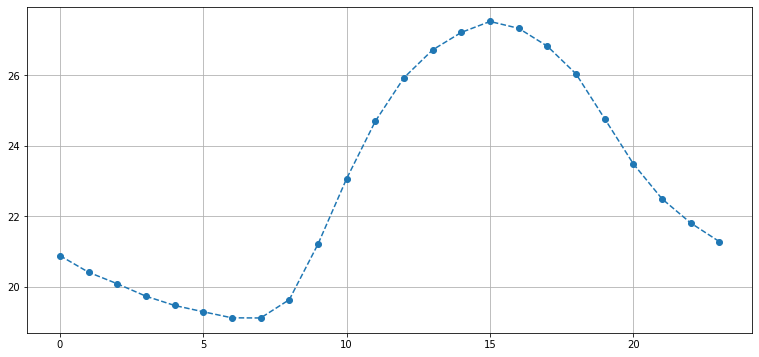

hourly temperature for site: 1


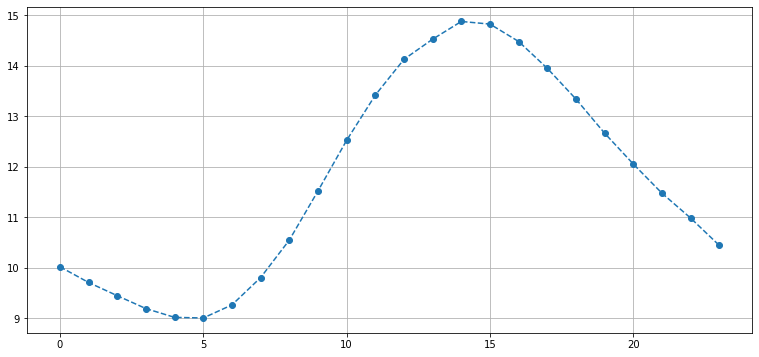

hourly temperature for site: 2


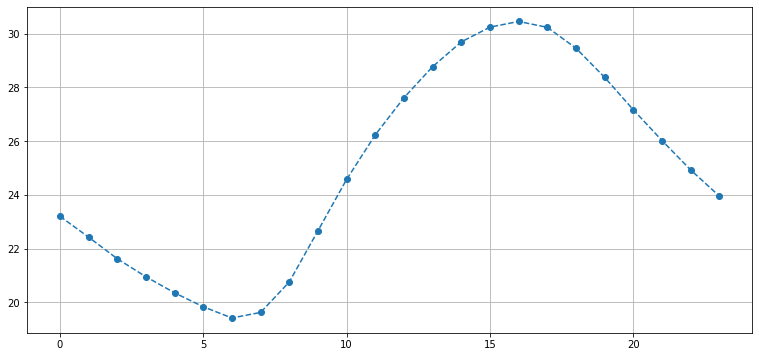

hourly temperature for site: 3


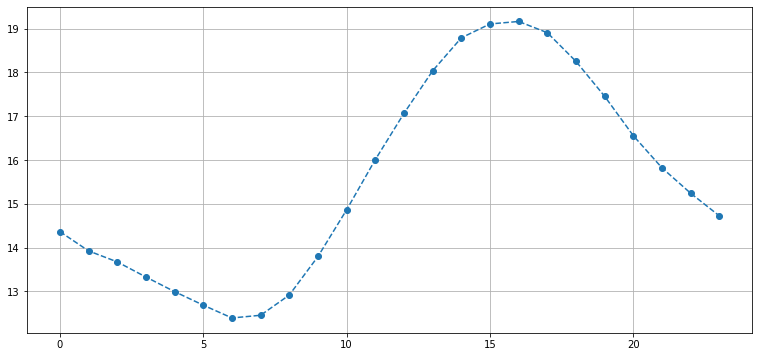

hourly temperature for site: 4


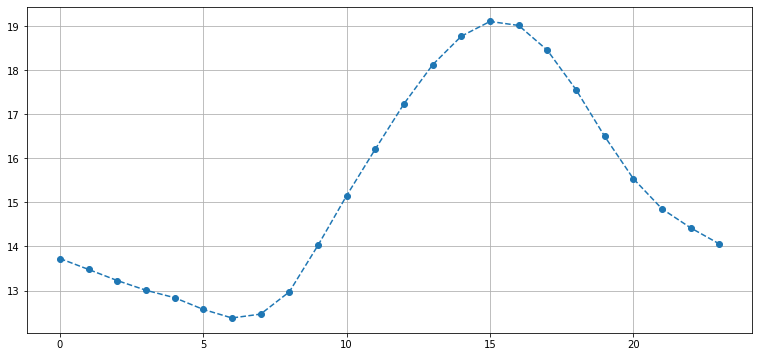

hourly temperature for site: 5


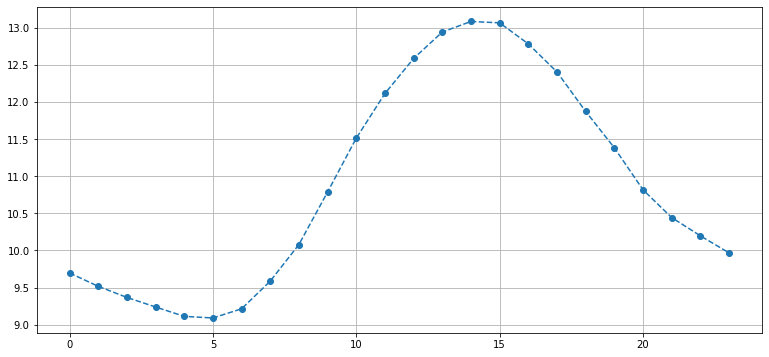

hourly temperature for site: 6


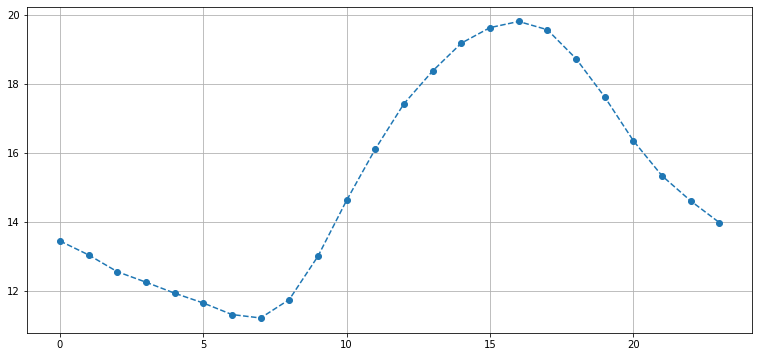

hourly temperature for site: 7


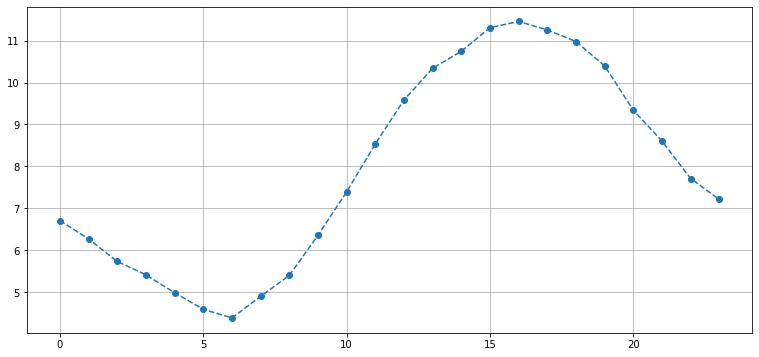

hourly temperature for site: 8


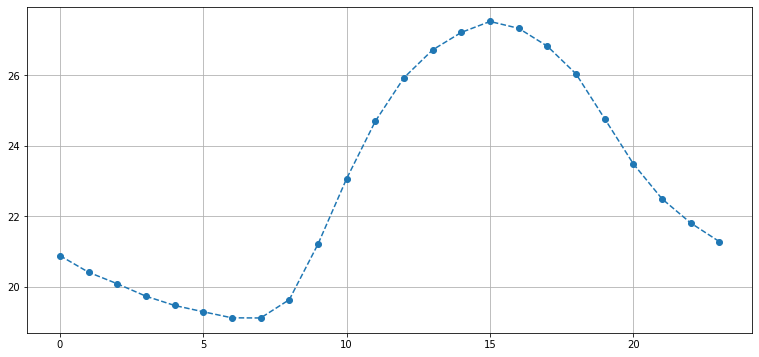

hourly temperature for site: 9


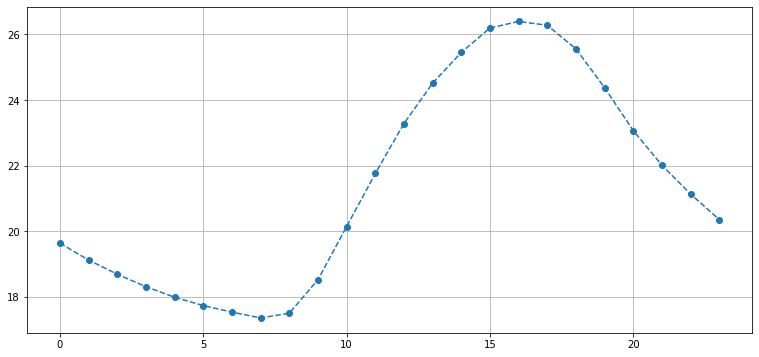

hourly temperature for site: 10


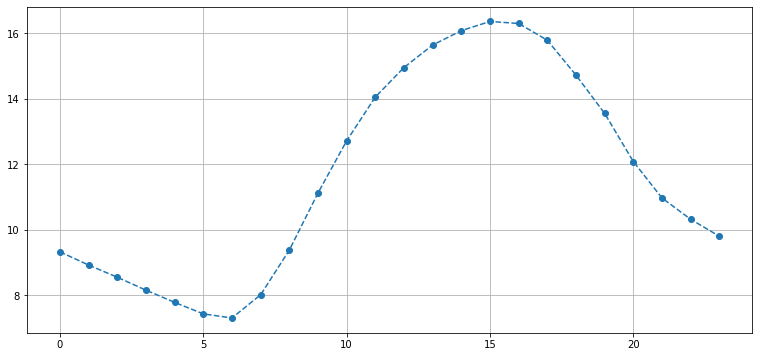

hourly temperature for site: 11


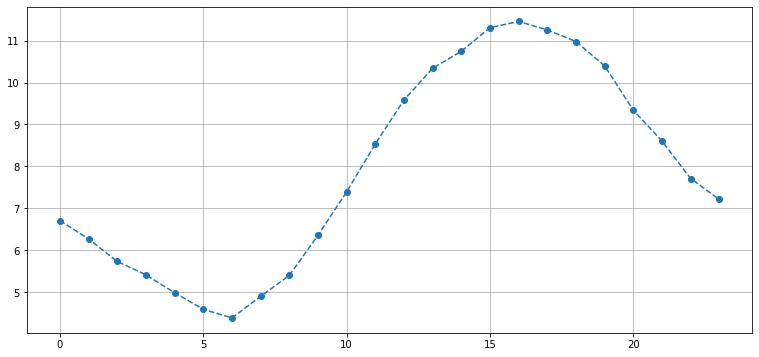

hourly temperature for site: 12


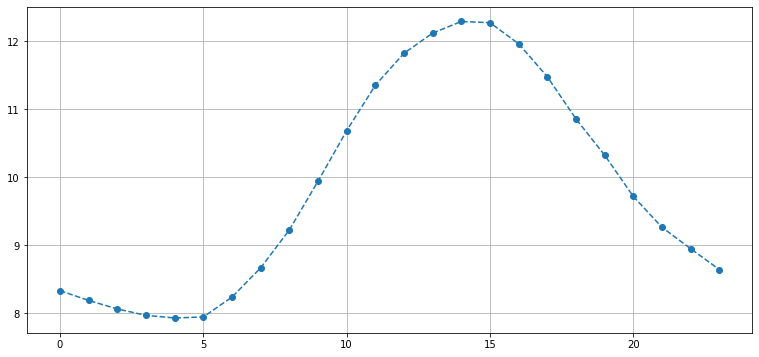

hourly temperature for site: 13


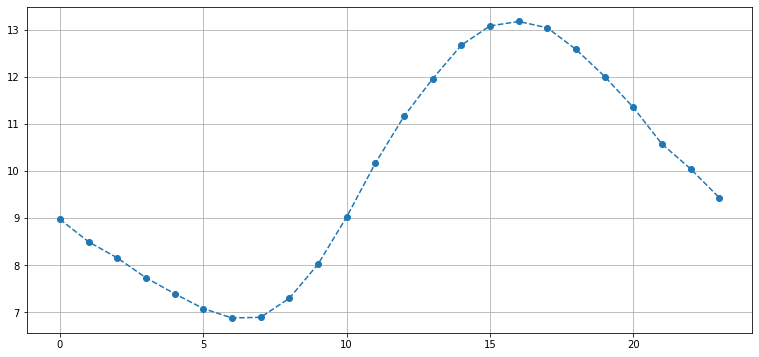

hourly temperature for site: 14


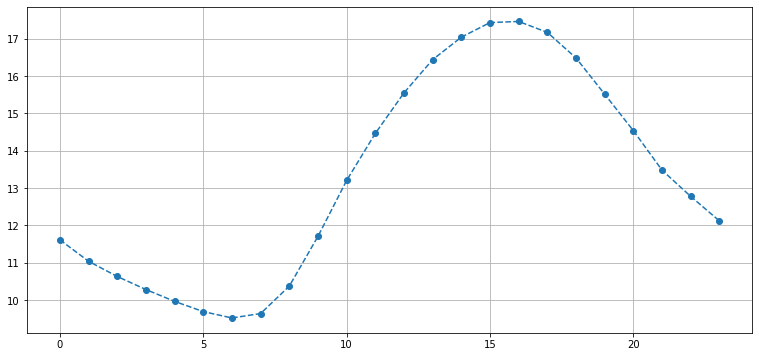

hourly temperature for site: 15


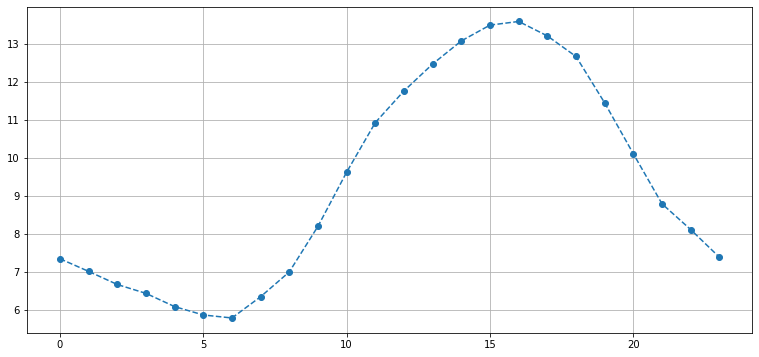

In [43]:
for site_id in hourly_temp.site_id.unique():
    print(f"hourly temperature for site: {site_id}")
    ts = hourly_temp.query("site_id == @site_id")
    plt.figure(figsize=(13,6))
    plt.plot(ts.hour.values, ts.air_temperature.values, "o--")
    plt.grid()
    plt.show()

### imputation of missing values in weather data

In [6]:
weather_train.describe()

site_id  air_temperature  cloud_coverage  dew_temperature  \
count  139773.000000    139718.000000    70600.000000    139660.000000   
mean        7.478977        14.418106        2.149306         7.350158   
std         4.604744        10.626595        2.599150         9.790235   
min         0.000000       -28.900000        0.000000       -35.000000   
25%         3.000000         7.200000        0.000000         0.600000   
50%         7.000000        15.000000        2.000000         8.300000   
75%        11.000000        22.200000        4.000000        14.400000   
max        15.000000        47.200000        9.000000        26.100000   

       precip_depth_1_hr  sea_level_pressure  wind_direction     wind_speed  \
count       89484.000000       129155.000000   133505.000000  139469.000000   
mean            0.983047         1016.158038      180.526632       3.560527   
std             8.463678            7.629684      111.523629       2.335874   
min            -1.000000          968.200000        0.000000       0.000000   
25%             0.000000         1011.800000       80.000000       2.100000   
50%             0.000000         1016.400000      190.000000       3.100000   
75%             0.000000         1020.800000      280.000000       5.000000   
max           343.000000         1045.500000      360.000000      19.000000   

                hour  
count  139773.000000  
mean       11.504017  
std         6.923170  
min         0.000000  
25%         6.000000  
50%        12.000000  
75%        18.000000  
max        23.000000

In [7]:
print(weather_train.precip_depth_1_hr.quantile(0.93))
print(weather_train.precip_depth_1_hr.quantile(0.94))

0.0
2.0


#### number of nans

In [8]:
weather_train.isna().sum()

site_id                   0
timestamp                 0
air_temperature          55
cloud_coverage        69173
dew_temperature         113
precip_depth_1_hr     50289
sea_level_pressure    10618
wind_direction         6268
wind_speed              304
hour                      0
dtype: int64

In [13]:
100*weather_train.isna().sum()/weather_train.shape[0]

site_id                0.000000
timestamp              0.000000
air_temperature        0.039350
cloud_coverage        49.489529
dew_temperature        0.080845
precip_depth_1_hr     35.979052
sea_level_pressure     7.596603
wind_direction         4.484414
wind_speed             0.217496
hour                   0.000000
dtype: float64

In [10]:
weather_train.groupby('site_id').apply(lambda group: group.isna().sum())

site_id  timestamp  air_temperature  cloud_coverage  dew_temperature  \
site_id                                                                         
0              0          0                3            3830                3   
1              0          0                1            7062                1   
2              0          0                1            2354                1   
3              0          0                4            3642                6   
4              0          0                0            4230                2   
5              0          0                2            6030                2   
6              0          0               10            2992               10   
7              0          0                0            8614               23   
8              0          0                3            3830                3   
9              0          0                5            3458                7   
10             0          0               24            2450               27   
11             0          0                0            8614               23   
12             0          0                0              59                0   
13             0          0                1            4298                1   
14             0          0                1            3311                1   
15             0          0                0            4399                3   

         precip_depth_1_hr  sea_level_pressure  wind_direction  wind_speed  \
site_id                                                                      
0                        1                  85             250           0   
1                     8763                  52               3           0   
2                       66                  44             591           5   
3                       37                 158             153           4   
4                     1317                  73             105           0   
5                     8755                8755             295           3   
6                        0                 175             779          39   
7                     7883                   8               0           0   
8                        1                  85             250           0   
9                        7                 239            2558          97   
10                      27                 141             534         104   
11                    7883                   8               0           0   
12                    8755                  56               1           0   
13                      12                 120             217           1   
14                      31                 110             290          23   
15                    6751                 509             242          28   

         hour  
site_id        
0           0  
1           0  
2           0  
3           0  
4           0  
5           0  
6           0  
7           0  
8           0  
9           0  
10          0  
11          0  
12          0  
13          0  
14          0  
15          0

In [11]:
df = (weather_train
      .set_index("timestamp")
      .groupby('site_id')
      .apply(lambda group: group.interpolate(method="time", limit_direction='both'))
      .reset_index())

In [12]:
df.groupby('site_id').apply(lambda group: group.isna().sum())

timestamp  site_id  air_temperature  cloud_coverage  dew_temperature  \
site_id                                                                         
0                0        0                0               0                0   
1                0        0                0               0                0   
2                0        0                0               0                0   
3                0        0                0               0                0   
4                0        0                0               0                0   
5                0        0                0               0                0   
6                0        0                0               0                0   
7                0        0                0            8614                0   
8                0        0                0               0                0   
9                0        0                0               0                0   
10               0        0                0               0                0   
11               0        0                0            8614                0   
12               0        0                0               0                0   
13               0        0                0               0                0   
14               0        0                0               0                0   
15               0        0                0               0                0   

         precip_depth_1_hr  sea_level_pressure  wind_direction  wind_speed  \
site_id                                                                      
0                        0                   0               0           0   
1                     8763                   0               0           0   
2                        0                   0               0           0   
3                        0                   0               0           0   
4                        0                   0               0           0   
5                     8755                8755               0           0   
6                        0                   0               0           0   
7                        0                   0               0           0   
8                        0                   0               0           0   
9                        0                   0               0           0   
10                       0                   0               0           0   
11                       0                   0               0           0   
12                    8755                   0               0           0   
13                       0                   0               0           0   
14                       0                   0               0           0   
15                       0                   0               0           0   

         hour  
site_id        
0           0  
1           0  
2           0  
3           0  
4           0  
5           0  
6           0  
7           0  
8           0  
9           0  
10          0  
11          0  
12          0  
13          0  
14          0  
15          0

***
### hourly patter for meter_reading per `site_id` and for `meter==0`

In [38]:
train_data["hour"] = train_data.timestamp.dt.hour
train_data_cut = train_data.query("meter == 0")

In [41]:
hourly_reading = train_data_cut.groupby(["site_id","hour"])["meter_reading"].sum().reset_index()

hourly meter_reading (meter==0) for site: 0


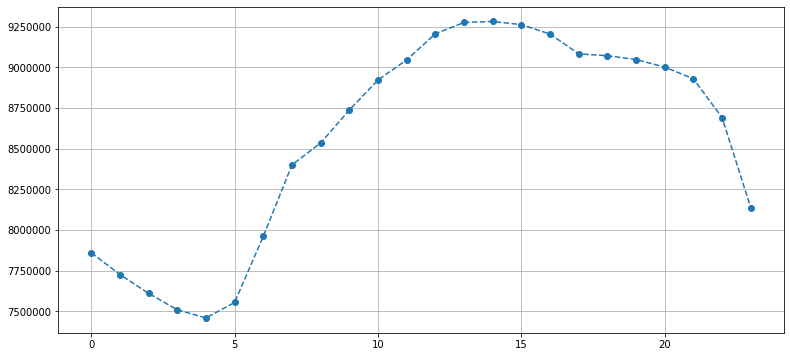

hourly meter_reading (meter==0) for site: 1


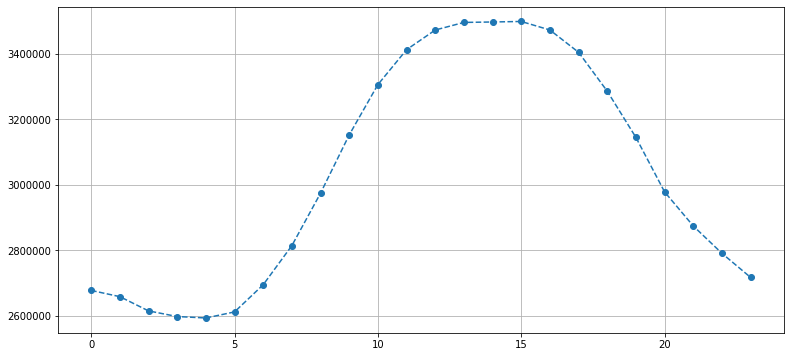

hourly meter_reading (meter==0) for site: 2


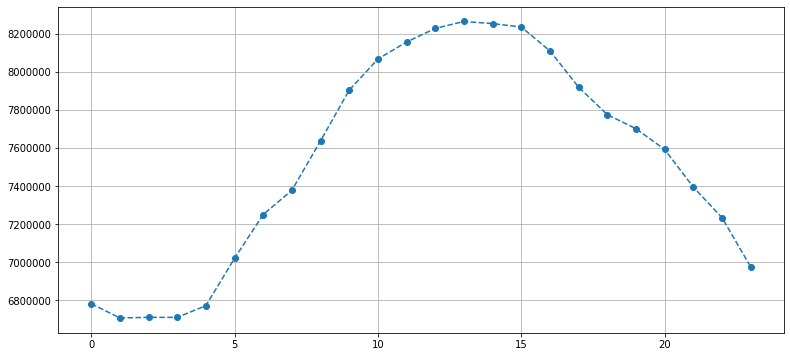

hourly meter_reading (meter==0) for site: 3


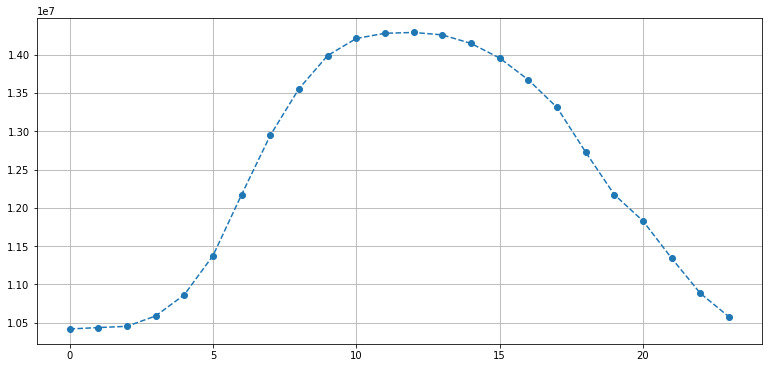

hourly meter_reading (meter==0) for site: 4


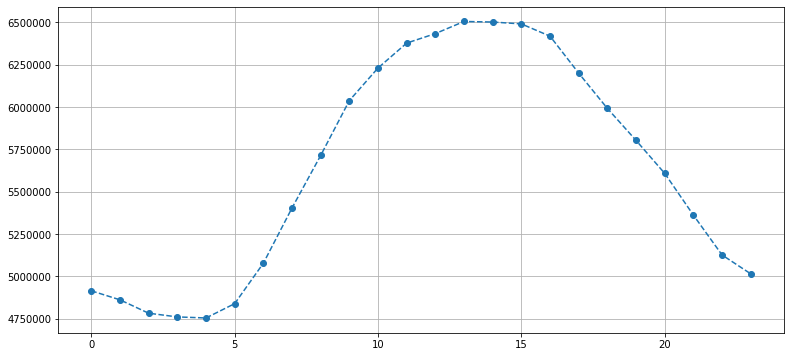

hourly meter_reading (meter==0) for site: 5


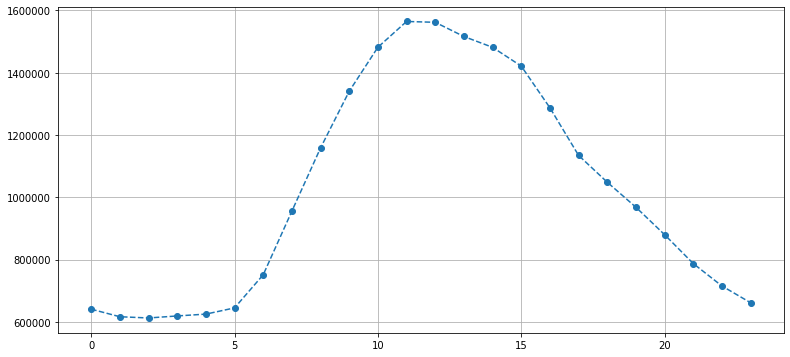

hourly meter_reading (meter==0) for site: 6


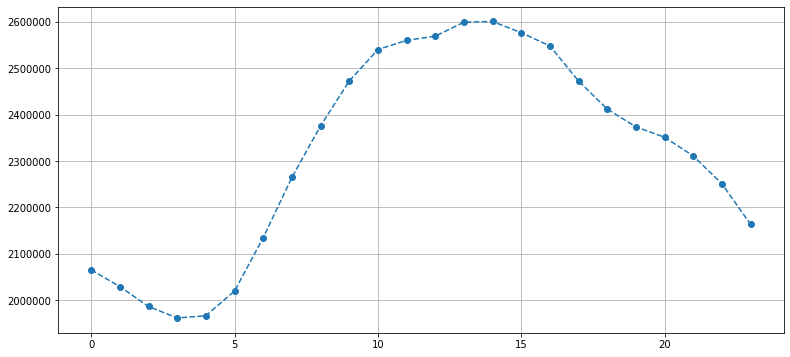

hourly meter_reading (meter==0) for site: 7


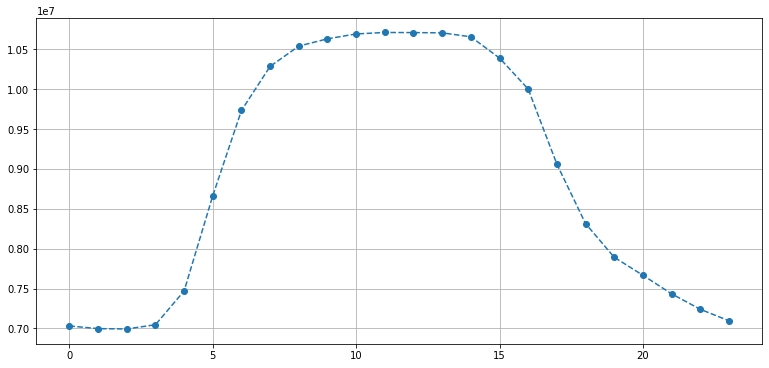

hourly meter_reading (meter==0) for site: 8


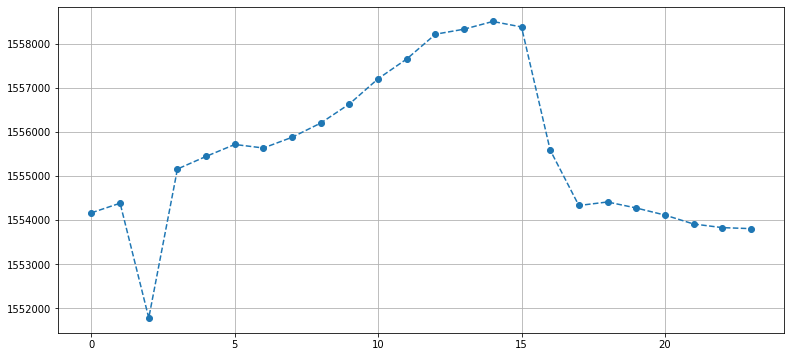

hourly meter_reading (meter==0) for site: 9


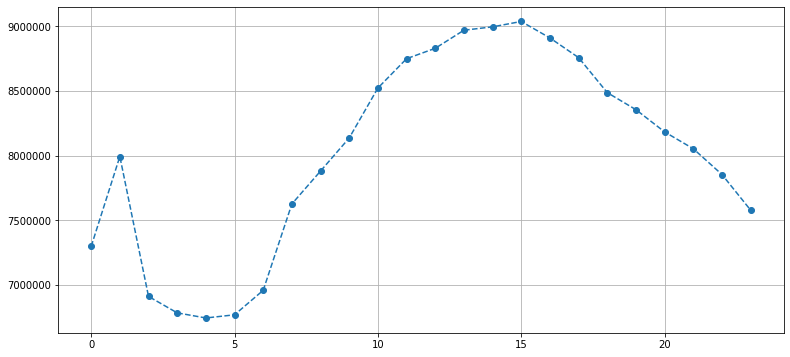

hourly meter_reading (meter==0) for site: 10


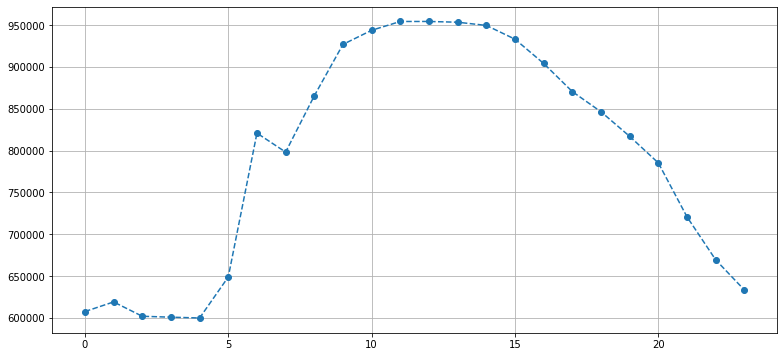

hourly meter_reading (meter==0) for site: 11


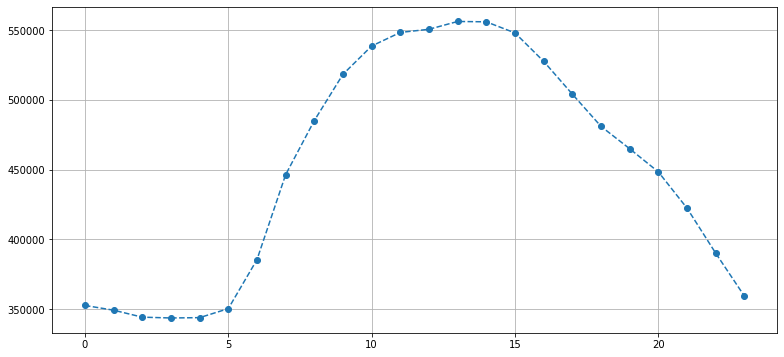

hourly meter_reading (meter==0) for site: 12


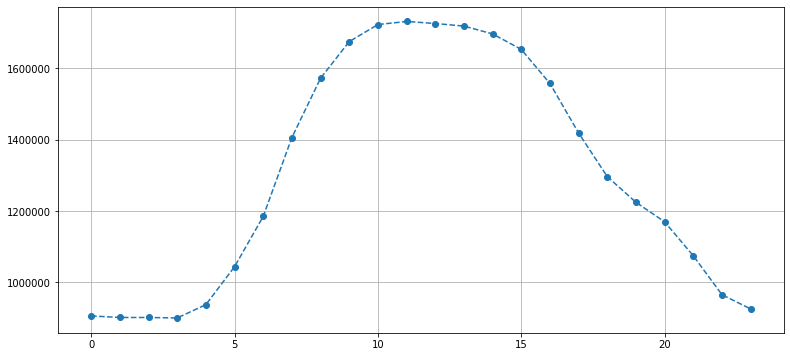

hourly meter_reading (meter==0) for site: 13


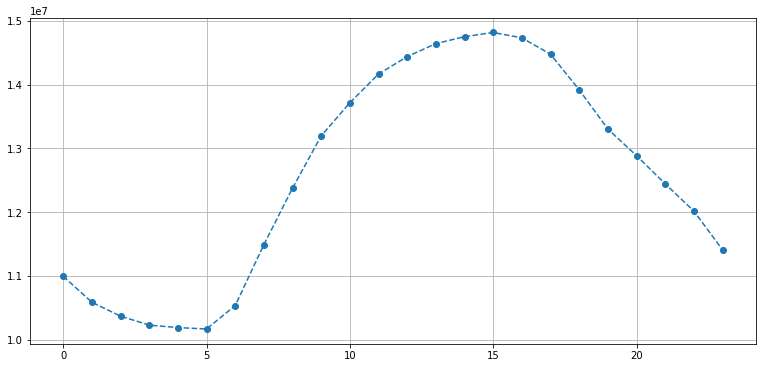

hourly meter_reading (meter==0) for site: 14


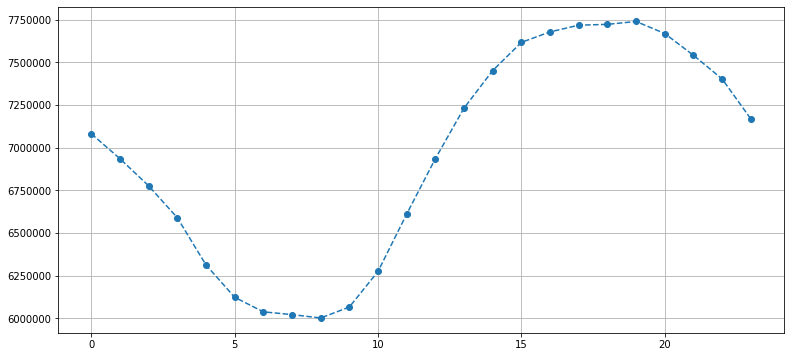

hourly meter_reading (meter==0) for site: 15


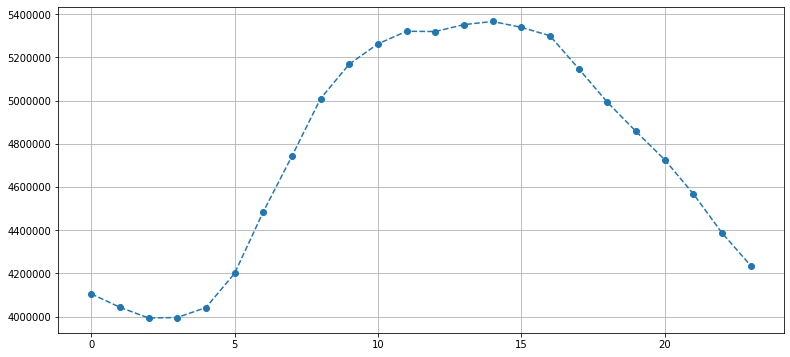

In [43]:
for site_id in hourly_reading.site_id.unique():
    print(f"hourly meter_reading (meter==0) for site: {site_id}")
    ts = hourly_reading.query("site_id == @site_id")
    plt.figure(figsize=(13,6))
    plt.plot(ts.hour.values, ts.meter_reading.values, "o--")
    plt.grid()
    plt.show()

***
### `building_id = 363`

In [8]:
ts = train_data.query("building_id == 363 & meter == 0")

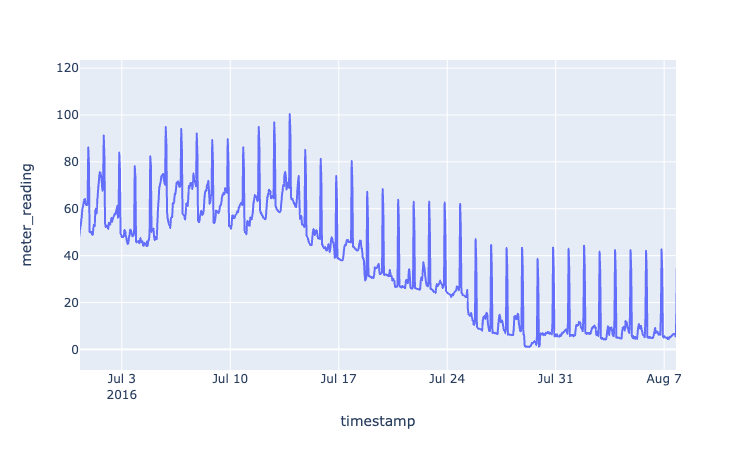

In [10]:
fig = px.line(ts, x='timestamp', y='meter_reading')
fig.show()

25jul start normal behavior for `building_id = 363` and `meter = 0`

In [12]:
idx = train_data.query("building_id == 363 & meter == 0 & timestamp <= '2016-07-24 23:00:00'").index
train_data.drop(idx, axis=0).reset_index(drop=True)

building_id  meter           timestamp  meter_reading  site_id  \
421               363      0 2016-01-01 00:00:00      32.049999        3   
2618              363      0 2016-01-01 01:00:00      32.570000        3   
4811              363      0 2016-01-01 02:00:00      32.799999        3   
7007              363      0 2016-01-01 03:00:00      33.919998        3   
9200              363      0 2016-01-01 04:00:00      35.580002        3   
...               ...    ...                 ...            ...      ...   
10891828          363      0 2016-07-24 19:00:00      27.270000        3   
10894150          363      0 2016-07-24 20:00:00      62.029999        3   
10896469          363      0 2016-07-24 21:00:00      52.029999        3   
10898788          363      0 2016-07-24 22:00:00      24.020000        3   
10901107          363      0 2016-07-24 23:00:00      23.980000        3   

         primary_use  square_feet  air_temperature  dew_temperature  \
421        Education        69300        10.000000         2.199219   
2618       Education        69300         9.398438         2.800781   
4811       Education        69300         8.898438         2.199219   
7007       Education        69300         7.800781         1.099609   
9200       Education        69300         7.800781         0.600098   
...              ...          ...              ...              ...   
10891828   Education        69300        35.000000        19.406250   
10894150   Education        69300        35.593750        19.406250   
10896469   Education        69300        35.593750        20.593750   
10898788   Education        69300        35.000000        21.093750   
10901107   Education        69300        33.906250        22.203125   

          precip_depth_1_hr  sea_level_pressure  wind_direction  wind_speed  
421                     NaN              1021.0           350.0    4.101562  
2618                    0.0              1021.5           350.0    6.199219  
4811                    0.0              1021.5            10.0    4.601562  
7007                    0.0              1021.5           350.0    7.699219  
9200                    0.0              1022.0           340.0    4.101562  
...                     ...                 ...             ...         ...  
10891828                0.0              1015.0           150.0    2.099609  
10894150                0.0              1014.5           130.0    2.099609  
10896469                0.0              1014.0           170.0    3.099609  
10898788                0.0              1014.0           170.0    4.601562  
10901107                0.0              1014.0           170.0    5.101562  

[4943 rows x 13 columns]

In [11]:
train_data.timestamp

0          2016-01-01 00:00:00
1          2016-01-01 00:00:00
2          2016-01-01 00:00:00
3          2016-01-01 00:00:00
4          2016-01-01 00:00:00
                   ...        
19871162   2016-12-31 23:00:00
19871163   2016-12-31 23:00:00
19871164   2016-12-31 23:00:00
19871165   2016-12-31 23:00:00
19871166   2016-12-31 23:00:00
Name: timestamp, Length: 19871167, dtype: datetime64[ns]

***